# DSA5102 Final Project: Heart Diseases Data

This notebook aims to fulfil the requirements of the Final Project for DSA5102 Course (Foundations of Machine Learning). In the final project we have the following reqiurements: 

1. An introduction of your dataset, with visualizations
2. A clear outline of two problems of analysis you post on your dataset:
    * a supervised learning task (e.g. regression, classification, segmentation, etc)
    * an unsupervised learning task (e.g. dimensional reduction, generative models, etc)
3. For the supervised learning task, employ at least 3 different methods (linearmodels, decisiontrees, ensembles of decision trees, kernel methods, neural networks, etc) and compare their performance
4. For the unsupervised learning task, employ at least 2 different methods (autoencoders, PCA, kernel PCA, etc.) andcompare their performance
5. Cross validation should be used for model selection

In addition, it should respect the following rules: 
1. Completion of the aforementioned tasks
2. Scientific correctness of your methodologies 
3. Correct use of libraries
4. Clear documentation of code and findings 
5. Creativity and style!

<hr>

## Introducing the Dataset

This data is acquired from **UCI**[1] and was one of the suggested datasets for the project. The data in dataset were collected to include more attributes (54 different attributes). However, what is used in the domain and leterature as referenced in UCI as well as **Kaggle**[2] is only 1 dataset from the datasets at hand which is _Cleveland Database_ and it includes 14 attributes only. 

The file available at UCI includes the data only without the headers (columns names) and has the extension data. However, it can be open and edited with a text editor which is what I did and I added the required headers as per the order available at the website and using the provided abbreviations, too. After adding the headers, I saved it as CSV file to be able to read it into the notebook using pandas library. 

The 14 **attributes** are as follows: 

1. **age**
2. **sex** 
    * Value 0: female
    * Value 1: male
    
    
3. **cp** chest pain type (4 values)
    * Value 1: _typical angina_. 
    Typical Angina is a chest pain of discomfort resulting from lack of oxygen-rich blood in the heart muscles. The typical angina is caused by blockage or plaque buildup in the coronary arteries. It is more common for men to have this type of angina [3][4].
    * Value 2: _atypical angina_.
    This type of angina feels like indigestion and can mimic a problem related to peptic ulcer or gallbladder disease. This type is more common among women[4].
    * Value 3: _non-anginal pain_. 
    A chest pain is very likely nonanginal if its duration is over 30 minutes or less than 5 seconds, it increases with inspiration, can be brought on with one movement of the trunk or arm, can be brought on by local fingers pressure, or bending forward, or it can be relieved immediately on lying down[5].
    * Value 4: _asymptomatic_. 
    Asympatomic means neither causing nor exhibiting symptoms of disease[6].
    
    
4. **trestbps** resting blood pressure (in mm Hg on admission to the hospital). Optimal blood pressure typically is defined as: 
    * 120 mm Hg systolic — which is the pressure as your heart beats
    * Over 80 mm Hg diastolic — which is the pressure as your heart relaxes 
    * For your resting heart rate, the target is between 60 and 100 beats per minute (BPM)[7].


5. **chol** serum cholestoral in mg/dl. A serum cholesterol level is a measurement of certain elements in the blood, including the amount of high - and low - density lipoprotein cholesterol (HDL and LDL) in a person's blood. Serum cholesterol levels also show the amount of triglycerides present. Triglycerides are another lipid that can be measured in the blood. Here the chol refers to the total serum cholesterol which is containing all HDL, LDL, and triglycerides. The normal ranges are as follows[8]: 
    * All sex aged 19 and younger: at most 170 mg/dl
    * Females aged 20 and older: 125-200 mg/dl
    * Males aged 20 and older: 125-200 mg/dl


6. **fbs** fasting blood sugar (> 120 mg/dl). This is a test to determine how much glucose (sugar) is in a blood sample after an overnight fast. The fasting blood glucose test is commonly used to detect diabetes mellitus. The normal range is 70 to 100 mg/dl. levels between 100 and 126 mg/dl are addressed as pre-diabetes while above 126 is diagnosed as diabetic[9]. The values of this are: 
    * Value 1: true (> 120 mg/dl)
    * Value 0: false (<= 120 mg/dl)


7. **restecg** resting electrocardiographic results. This is a test that measures the electrical activity of the heart. The heart (which is a muscle) pumps blood through rhythmic contractions induced by electric impulses generated by the sinus node, the heart's natural pacemaker. The resting ECG is a simple, quick and painless test. The resting ECG can detect certain heart conditions such as hypertrophy of heart, ischemia, myocardial infarction, sequelae of myocardial infarction, cardiac arrhythmias, etc. The test takes about 5 minutes and no preparation is necessary [10]. The test will produce a wave of the heart pulses which is then interpreted/categorized into one of the following values: 

    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria


8. **thalach** maximum heart rate achieved


9. **exang** exercise induced angina. This has the following values: 
    * Value 0: no (exercise did NOT induce angina)
    * Value 1: yes (exercise did induce angina)


10. **oldpeak** oldpeak = ST depression induced by exercise relative to rest. The ST segment is an interval between ventricular depolarization and ventricular repolarization. It is identified as the end of the QRS complex to the beginning of the T wave [11]. This is identified by observing the wave graph produce by the heart beat. 


11. **slope** the slope of the peak exercise ST segment. This is again is an observation from the wave graph. It has the following values: 
    * Value 1: upsloping
    * Value 2: flat
    * Value 3: downsloping

12. **ca** number of major vessels (0-3) colored by flourosopy that appeared to contain _calcium_. Fluoroscopy is a study of moving body structures--similar to an X-ray "movie." A continuous X-ray beam is passed through the body part being examined. The beam is transmitted to a TV-like monitor so that the body part and its motion can be seen in detail. Fluoroscopy, as an imaging tool, enables physicians to look at many body systems, including the skeletal, digestive, urinary, respiratory, and reproductive systems. Fluoroscopy may be performed to evaluate specific areas of the body, including the bones, muscles, and joints, as well as solid organs, such as the heart, lung, or kidneys [12]. 


13. **thal** using thallium-201 (201TI) which is a radioactive material to perform _exercise scintigraphic defects_ test in a noninvasive way. This test is the most frequently used form of stress test in cardiac function. During exercise, myocardial blood flow normally increases by up to 3-4 fold to supply the increase in oxygen demand. 201Tl scanning measures this flow reserve. If coronary flow is limited by a stenosis, there will be less 201Tl extracted from the blood by the myocardium in the territory of that artery compared with the normal, surrounding myocardium. This will cause a perfusion defect. Over 2-4 hours, this perfusion defect will redistribute, or 'fill in', as 201Tl washes out of the normally perfused cells and some more 201Tl is extracted by the hypoperfused myocardial cells. Hence, in ischaemia, the 201Tl perfusion defect disappears with time and is called a reversible defect. By contrast, areas of scar tissue or infarction do not change with time and appear as fixed defects [13]. It has the following values: 
    * Value 3 = normal
    * Value 6 = fixed defect
    * Value 7 = reversable defect


14. **target** (predicted attribute) which is the number refering to the heart desiese. The heart disease to be predicted is anglographic coronary disease. below we refer to target as target and class. It has the following Values: 
    * 0: absence of disease
    * 1-4: presence of disease
    

It is worth mentioning that, the original paper does the prediction over the presence or absence of a >50% diameter narrowing such that it has 2 values: 

    0: < 50% diameter narrowing
    1: > 50% diameter narrowing

In addition, it is important to note the importance of this data in the prediction of the disease since the data is non intrusive in nature which means there is no need to perform surgerical operations in order to definetly decide that the pacient is indeed having a heart disease. 

[1] https://archive.ics.uci.edu/ml/datasets/Heart+Disease

[2] https://www.kaggle.com/ronitf/heart-disease-uci

[3] https://www.heart.org/en/health-topics/heart-attack/angina-chest-pain

[4] https://www.harringtonhospital.org/typical-and-atypical-angina-what-to-look-for/

[5] https://www.ncbi.nlm.nih.gov/pubmed/2255129

[6] http://www.ilpi.com/msds/ref/asymptomatic.html

[7] https://health.clevelandclinic.org/busting-6-myths-about-blood-pressure-and-heart-rate/

[8] https://www.medicalnewstoday.com/articles/321519.php

[9] https://www.medicinenet.com/script/main/art.asp?articlekey=3393

[10] https://www.physimed.com/accueil-patients/diagnostic-techniques/resting-ecg/?lang=en

[11] https://www.medscape.com/answers/1894014-178294/what-is-the-st-segment-on-electrocardiography-ecg

[12] https://www.hopkinsmedicine.org/health/treatment-tests-and-therapies/fluoroscopy-procedure

[13] https://www.nps.org.au/australian-prescriber/articles/thallium-scanning


<hr>

## Problem Statements

### Supervised Learning Task
The problem at hand is to identify the class of heart disease. There are 5 classes at hand labeled with values from 0 to 4. Value is means there is no heart disease while values 1-4 present different status of the heart disease existance. However, I have seen some people in Kaggle doing it for two classes 0 (Absent) and 1 (Exist). This can be done simply by converting all values above 0 to 1. Also, in the original paper it is predicting 0 (< 50% diameter narrowing) and 1 (> 50% diameter narrowing). 

Interestingly, this dataset has recieved quiet good reputation since it is referenced in many research papers and a lot of people used it to derive some conclusions and analysis and test different models. In order to have a good understanding of the origniallity of the data, the reader is advised to read the original paper avaialbe at: https://www.academia.edu/4827700/International_application_of_a_new_probability_algorithm_for_the_diagnosis_of_coronary_artery_disease


### Unsupervised Learning Task
The unsupervised learning task is to perform dimentional reduction over the data using different methods.
<hr>

## Data Visualization and Analysis

Now, lets import the required models. 

In [1]:
#import the required models and libraries. 
#pandas, numpy, pyplot and sns (for plotting), math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import math


#sklearn (for machine learning and data processing)
from sklearn.model_selection import train_test_split #to split the data into training and testing sets. 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


#keras for nerual networks
import keras 
from keras.utils import to_categorical #to convert to one-hot encoding
from keras.layers import Input, Dense, Flatten, Dropout
from keras.models import Model
from keras.losses import categorical_crossentropy, sparse_categorical_crossentropy
from keras.optimizers import SGD
from keras.models import Sequential

%matplotlib inline

Using TensorFlow backend.


In [2]:
#the below library is used to write the trained model into a file and restore it. Here I will
#save the grid search result with cross validation of random forest which took 20 minutes to 
#train using all available cores on I9 Processor.
import pickle

In [3]:
#define figure size for the plots
matplotlib.rcParams['figure.figsize'] = (16.0, 8.0)

In [4]:
#read the data from the CSV file
data = pd.read_csv('heart_with_targets.csv')

In [5]:
#display the first 5 rows of data 
data.head()

Age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0

In [6]:
#show information about the different columns of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
Age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          303 non-null object
thal        303 non-null object
target      303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [7]:
#show a describtion summary of the data to get some insights 
data.describe()

Age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope      target  
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.937294  
std      0.994971   22.875003    0.469794    1.161075    0.616226    1.228536  
min      0.000000   71.000000    0.000000    0.000000    1.000000    0.000000  
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000  
50%      1.000000  153.000000    0.000000    0.800000    2.000000    0.000000  
75%      2.000000  166.000000    1.000000    1.600000    2.000000    2.000000  
max      2.000000  202.000000    1.000000    6.200000    3.000000    4.000000

From the above we can see that, there are 303 entries in the dataset. Types of values are all neumerical except for thal and target which seems to be objects. We will investigate why this the case below since at the head of the dataset above they seem to be neumerical. Looking at the desciption of different columns we can see that the mean age of the population is 54 and the minimum is 29 which means these are old adults (All above 29). Also, the mean of sex is 0.68 which mgiht suggests there are more male than female in the dataset (since male is 1 and female is 0). In addition, there are some high means compared with the rest of the data such as trestbps (resting blood pressure, chol (serum cholestoral in mg/dl), and thalach (maximum heart rate achieved). Age is also higher than some other values. 

Since it was mentioned that (ca) and (thal) are both having type of object, lets investigate the reasons behind this.

(array([176.,   0.,  20.,   0.,   0.,  38.,   0.,  65.,   0.,   4.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

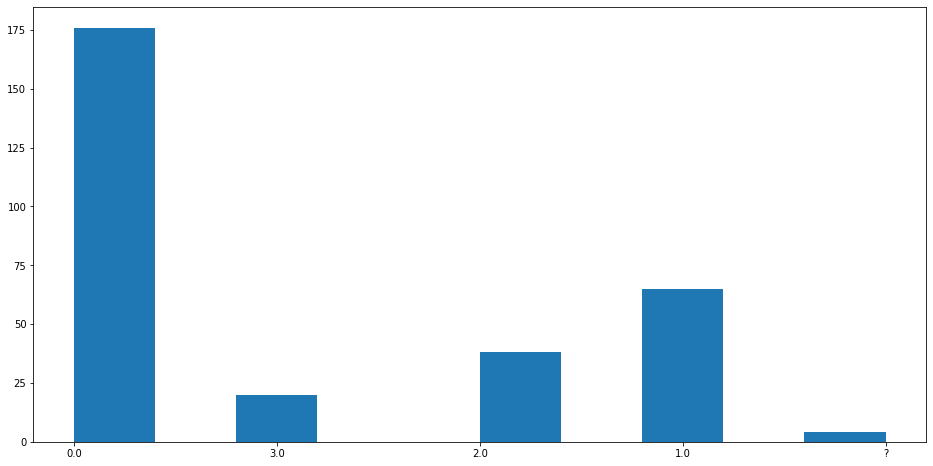

In [8]:
#lets start by ploting the histogram of ca
plt.hist(data['ca'])

As we see above there are some values that are question marks. We can change these values to the minimum value or the mean in this case I will replace it with the 1 since this value is the nearest to the mean as below

In [9]:
np.array(data[data['ca'] != '?']['ca']).astype(float).mean()

0.6722408026755853

As we can see the mean of (ca) is 0.67 which is near 1. Therefore, i will use 1. 

(array([ 18.,   0.,   0., 166.,   0.,   0., 117.,   0.,   0.,   2.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

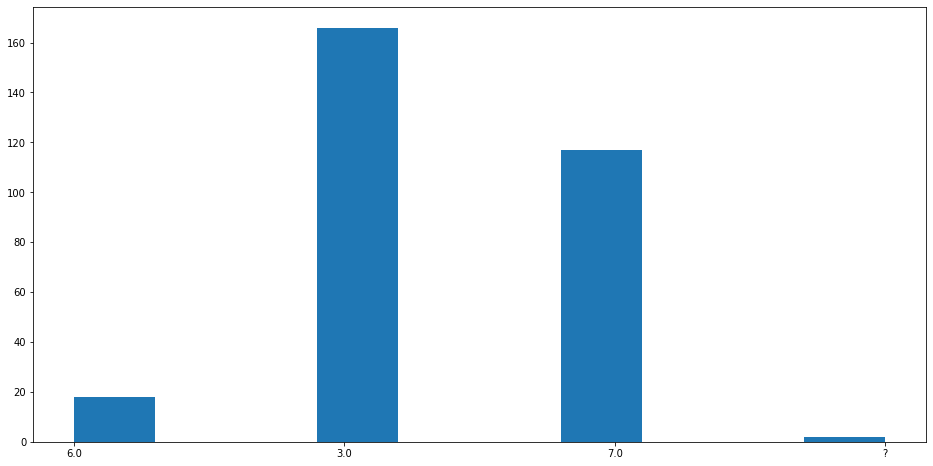

In [10]:
plt.hist(data['thal'])

Again, there are some values with question mark. Since the majority of values have the value 3 and this is a categorical variable (Each number refer to a category as described above), we will change the question mark values to value of 3 (category: normal)

In [11]:
#change all data to numerical (This will replace the ? with NaN)
data['ca'] = pd.to_numeric(data['ca'], errors='coerce')
data['thal'] = pd.to_numeric(data['thal'], errors='coerce')

In [12]:
#after that, change NaN values for (ca) and (thal) to mean and 3 respecgtiveluy
data['ca'] = data['ca'].fillna(1.0)
data['thal'] = data['thal'].fillna(3.0)

Now visualize the data to check for the replacement. 

(array([176.,   0.,   0.,  69.,   0.,   0.,  38.,   0.,   0.,  20.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

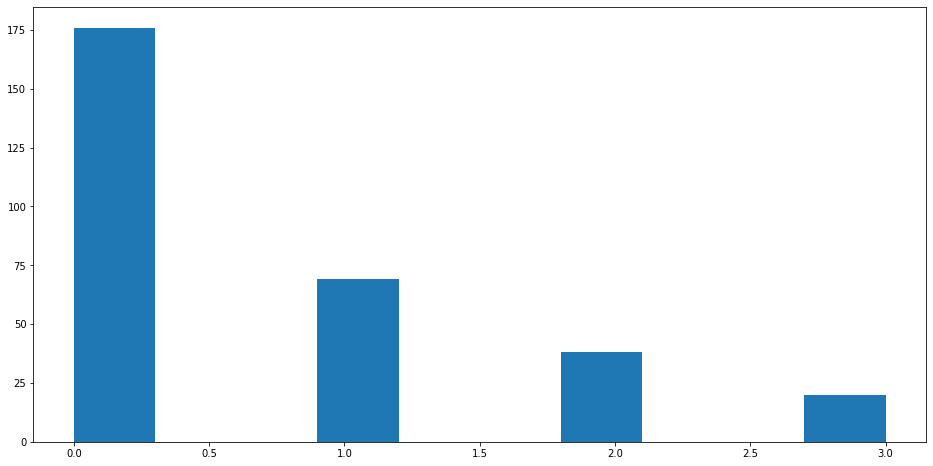

In [13]:
plt.hist(data['ca'])

(array([168.,   0.,   0.,   0.,   0.,   0.,   0.,  18.,   0., 117.]),
 array([3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8, 6.2, 6.6, 7. ]),
 <a list of 10 Patch objects>)

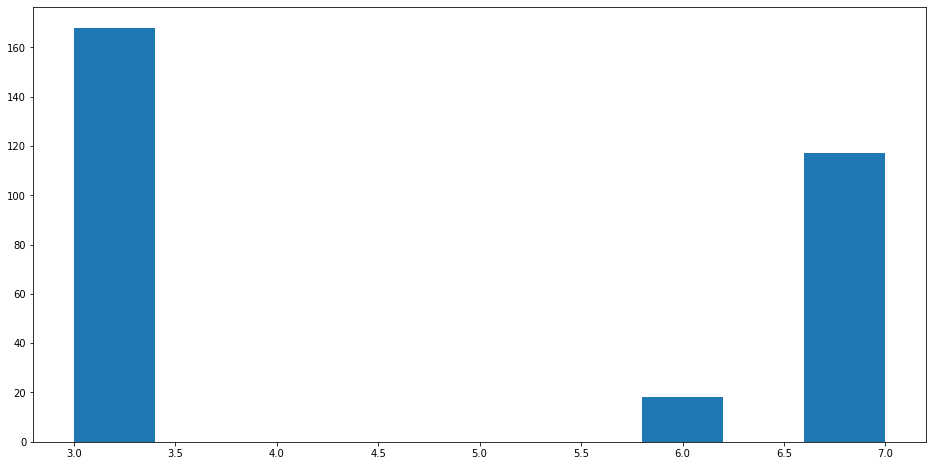

In [14]:
plt.hist(data['thal'])

As we can see above, the values of ? were replaced successfully. 

Now, lets look at the target variable and see the distribution of target classes

(array([164.,   0.,  55.,   0.,   0.,  36.,   0.,  35.,   0.,  13.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

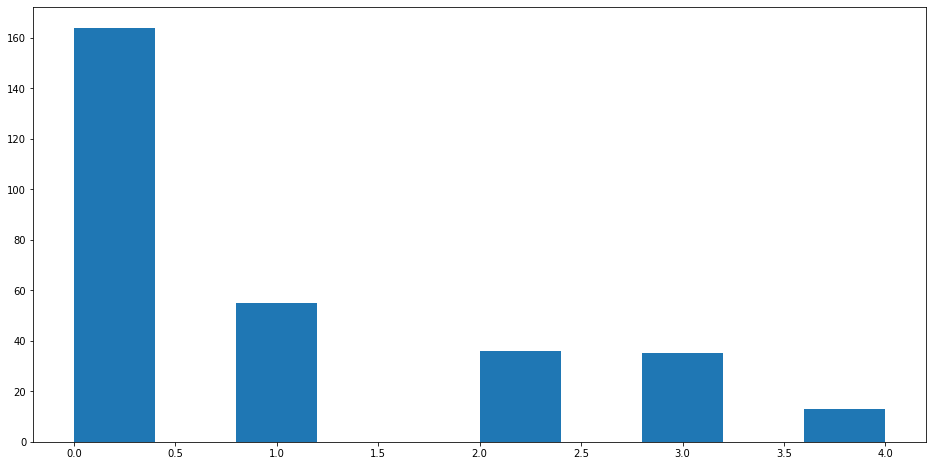

In [15]:
plt.hist(data['target'])

In [16]:
len(data[data['target'] > 0 ]), len(data[data['target'] == 0])

(139, 164)

As we can See from the above plot, the highest frequency for class 0 followed by class 1, 2, 3 then 4. Also, the count for class 0 is 164 instances and there are 139 instances of the other classes (they are positively diagnosed with heart diseases)

(array([ 23.,   0.,   0.,  50.,   0.,   0.,  86.,   0.,   0., 144.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

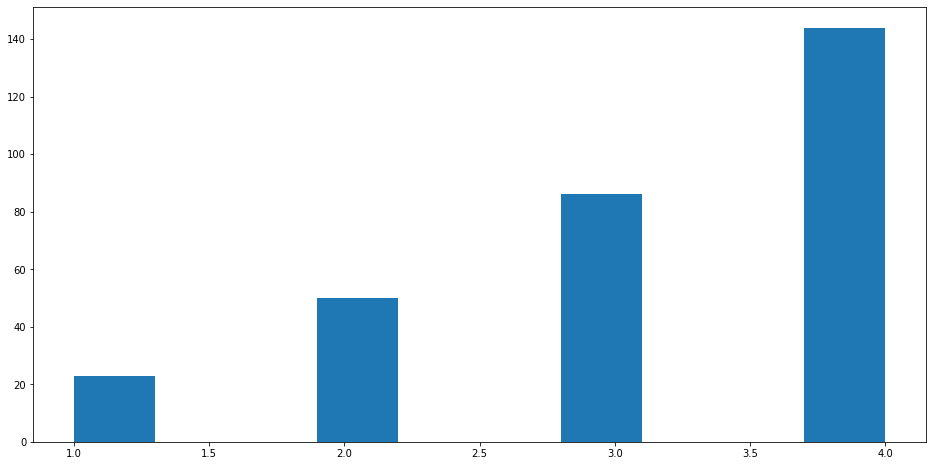

In [17]:
plt.hist(data['cp'])

The above visualization is for the other categorical variable (cp) which is chest pain type. We can see the highest type is number 4 which asymptomatic followed by 3 (non-anginal pain) followed by 2 (atypical anagina) followed by 1 (typical angina)

(array([258.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  45.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

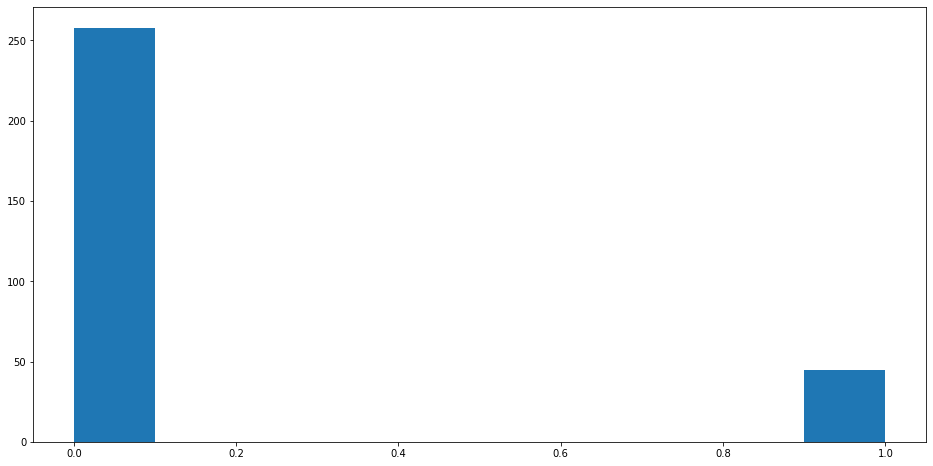

In [18]:
plt.hist(data['fbs'])

As we can see from the above (fasting blod sugar) the majority are not higher than 120 mg/dl since 0 refers to no and 1 referes to yes. 

/Users/abz/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/abz/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


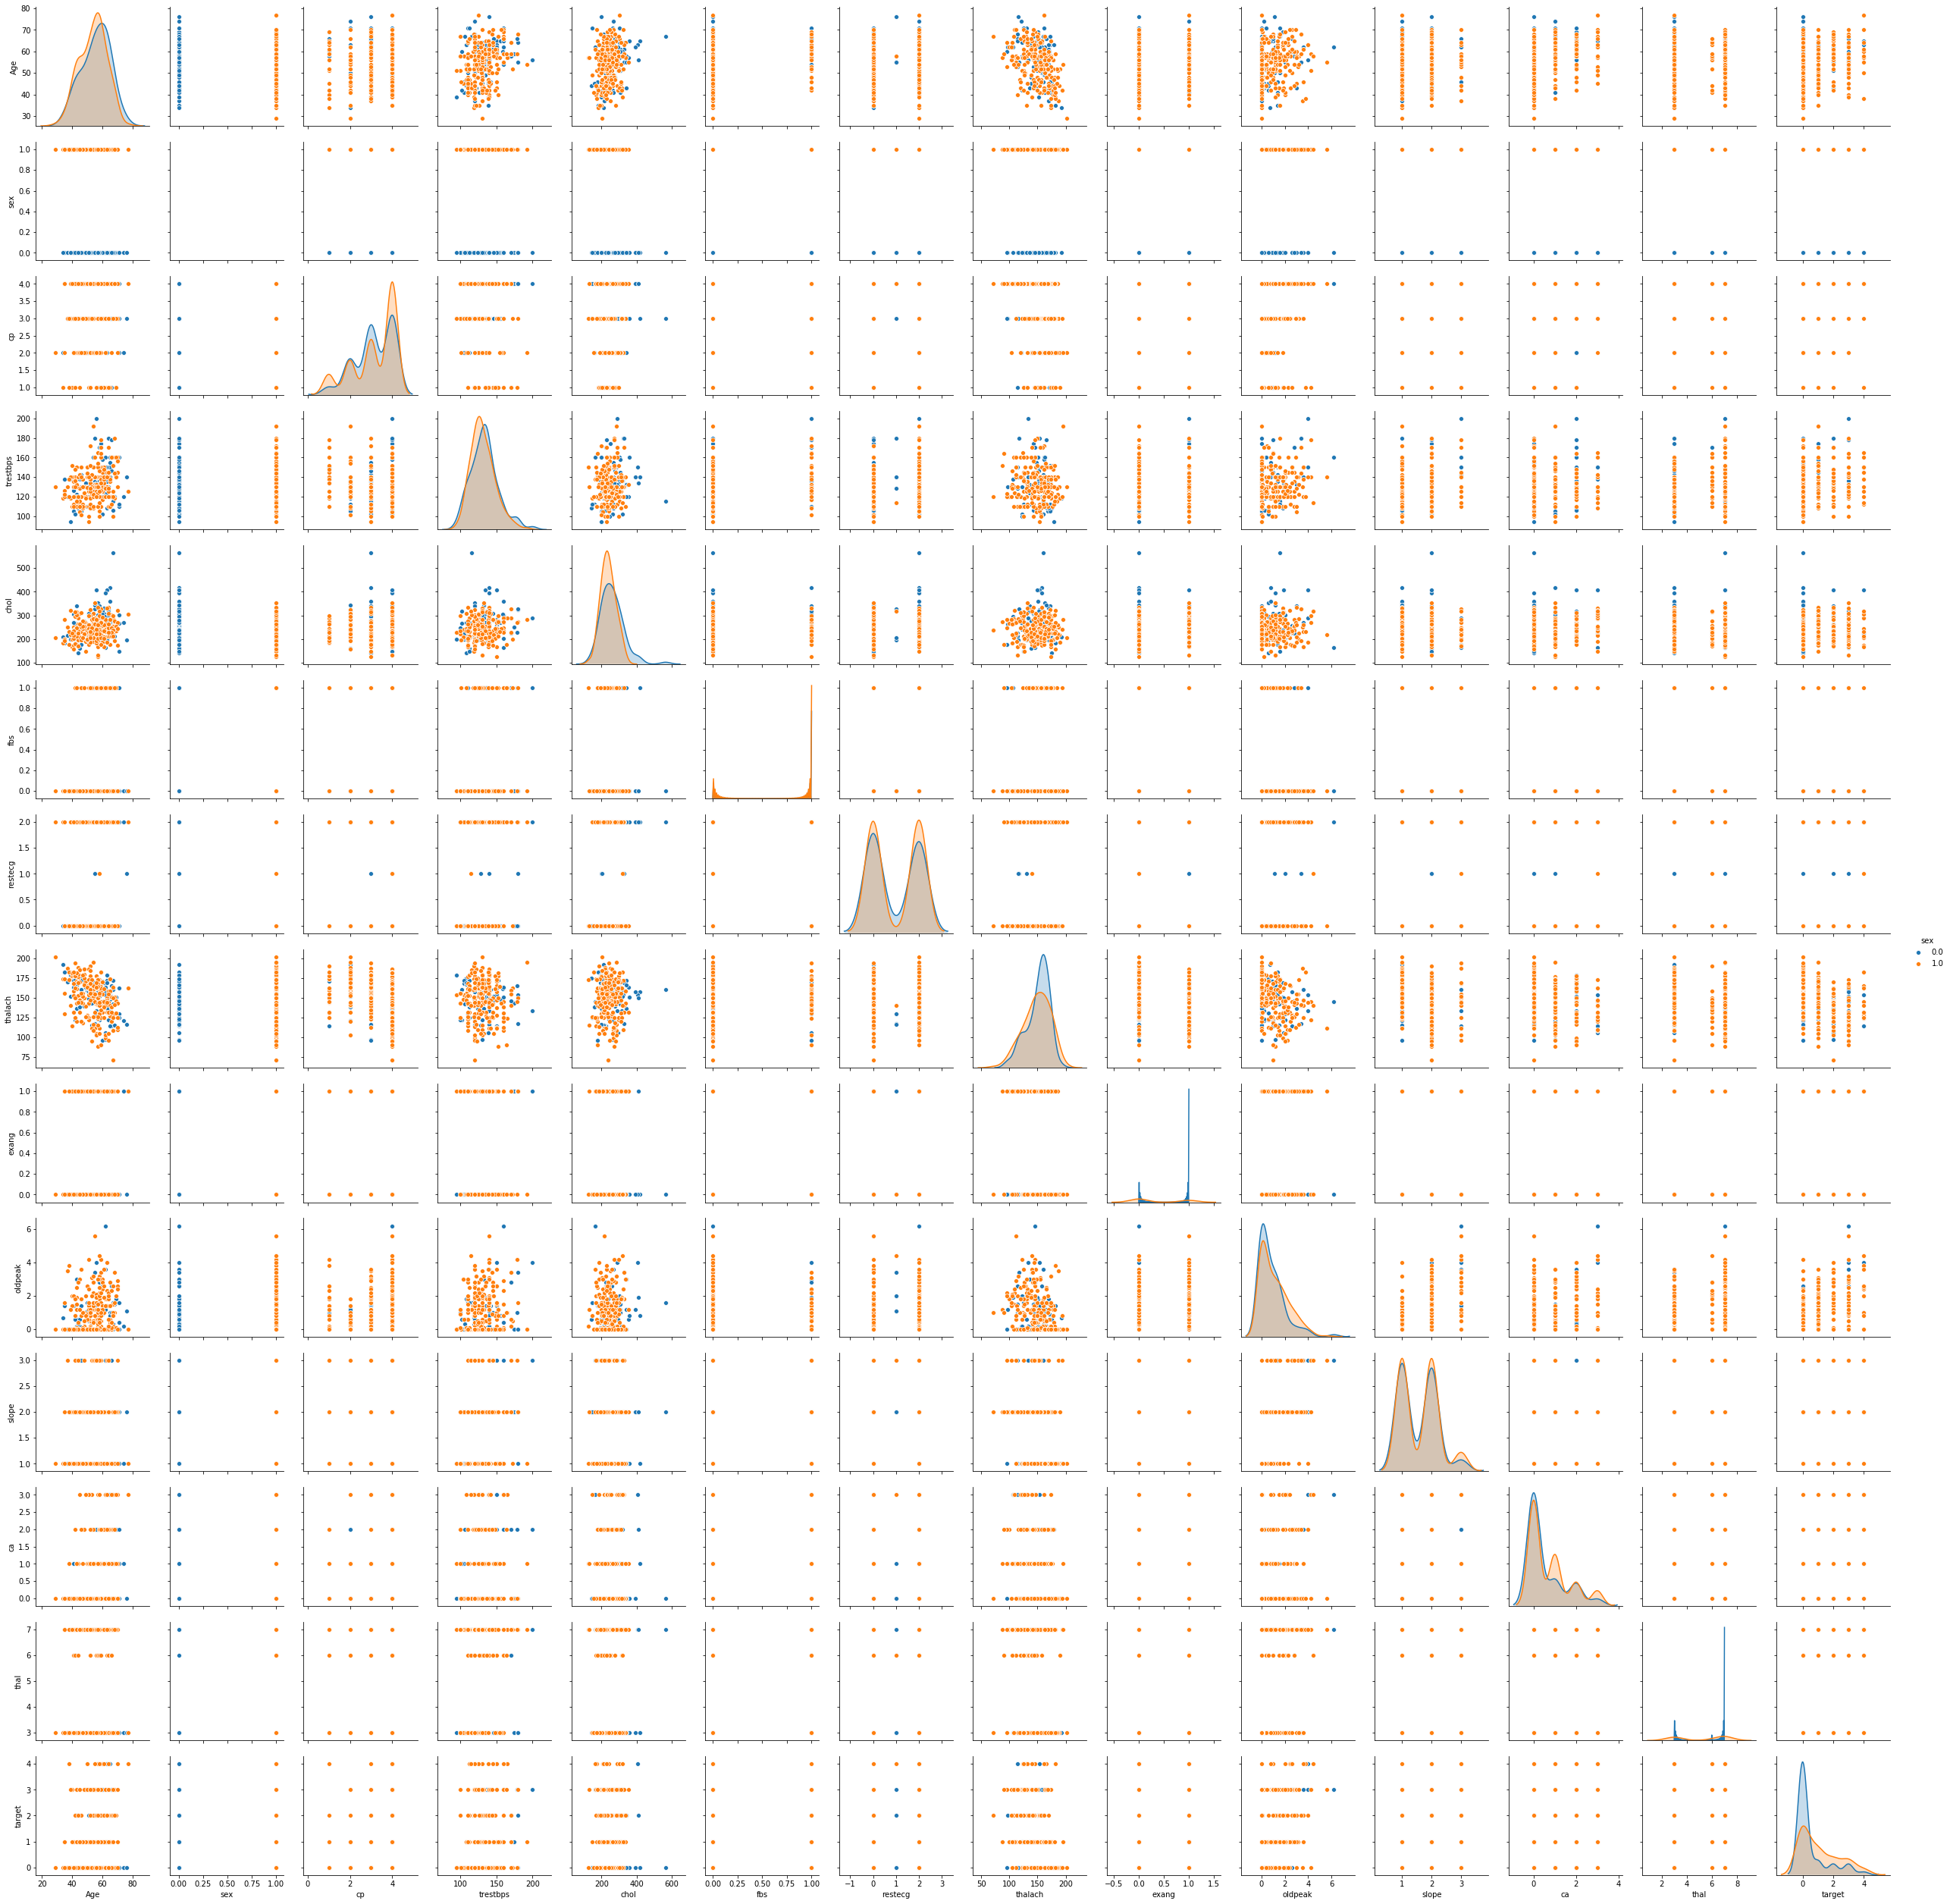

In [19]:
initial_pair_plot = sns.pairplot(data=data, hue='sex') #male is 1 and female is 0.

In [20]:
#save the figure as a png file
#initial_pair_plot.savefig('myfig')

The above pair plot gives some hints about the distribution of the data and the values. Orange is refering to male while blue is refering to female. 

For **age**: the highest frequency is between 50-60 which is near the mean and also we see males mean is lower than female mean since their values are showing higher peak but for the lower values of age. In other words, the mean of male age is lower than the mean of female age. However, there seems to be older female than male since the male curve is skewed to the left.  There seems to be some outliers at **chol** which is a female at age around 65 and with chol value around 600. Also, there are a male and a female outliers at oldpeak with ages between 50 and 60 and old peak value around 6. 

We can see there are more female of **cp** value 3 while more male of cp values 1 and 4. Both sex are of the same frequency at cp value 2. 

For **chol**, all the high values are old females with chol values around and above 400. However, there are more males of lower values of chol than female.

For **restecg**, there are more male of values 0 and 2 while more female of value 1. 

**Thalach** has more skewed distribution for female values between 150 and 200 than male whos distribution seems to follow a bell shape. 


For **exang** there are more 1 values than 0 values for female as can be seen from the high acute peacks. However, males distribution seems to be more balanced. This means that the exercise-induced angina is more common for female than male within the data at hand. 

For **oldpeak** the values of male and female seem to be skewed towards the lower values with more male of higher values than female. 


For **thal** we can see the value of 7 is the highest frequency for female followed by value 3. However, male values seem to be evenly distributed. This means reversible defects are more common for female than male. 

For **target**, there are more females having value 0 than males which means there are more healthy female in the dataset than male! However, there are more male than female for the disease existance classes (1-4) which means more male having disease. 

<h>

Now let's do some additional visualizations to look for more insights from the data. 

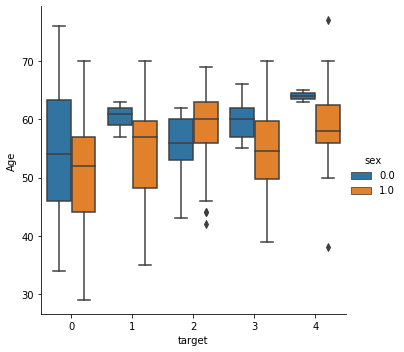

In [21]:
#this function will display a box plot with hue for sex. 
sns.catplot(x='target', y='Age', hue='sex', kind='box', data=data)

From the above we can see that there are older and more women than men of target 0 as seen before. Interesteningly, at all other targets, males are having higher share with target 1 as the highest and target 2 as the lowest. For female, the lowest frequency was for class 4. Furthermore, the female have higher values of age at all targets except target 2. For both male and female the lowest median was for target 0. 

In addition, there are 2 young outliers at target 2. Also, there are 2 other outlier at target 4 with one too young and one too old. Interestingly, all the outliers are male. 

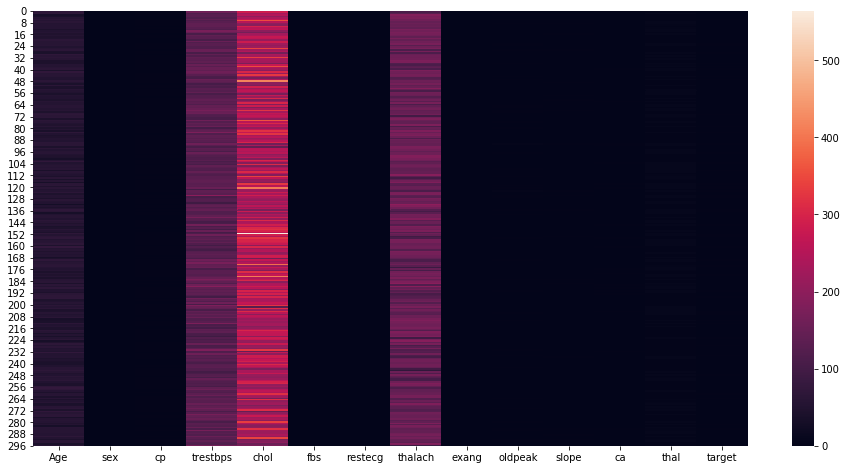

In [22]:
#this will show a heat map of the data and their values to see the distribution of the data
#this will also help to suggest if our data might need to be transformed.
sns.heatmap(data=data)

As concluded before the data has some features with higher values than the rest. These are:
* chol as the highest with mean of 246.7
* thalach with mean of 149
* trestbps with mean of 131
* age with mean of 54. 

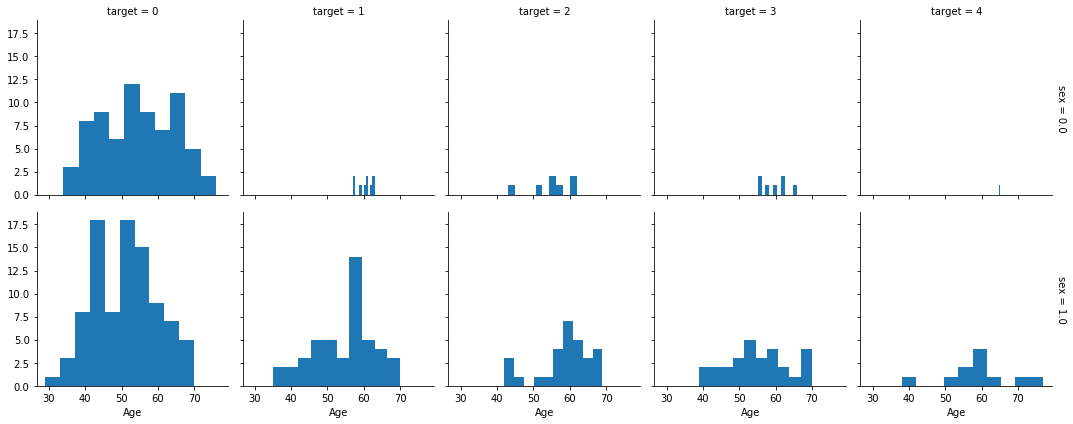

In [23]:
#draw histogram grid of ages with rows as gender and columns as the staging
grid = sns.FacetGrid(row="sex", col="target", margin_titles=True, data=data)
grid.map(plt.hist, "Age");

We can see the female are less in classes 1 to 4 with their highest existance at class 0. Also, it is interesting to note that male existance at class 0 is quite large with much younger population and there are older female at class 0 with some above 70 years old. Interestingly, the only males who are above 70 are of class 4 while women above 70 are only at class 0. Moreover, it seems the least represented category among all 8 categories are those whomen with class 4. 

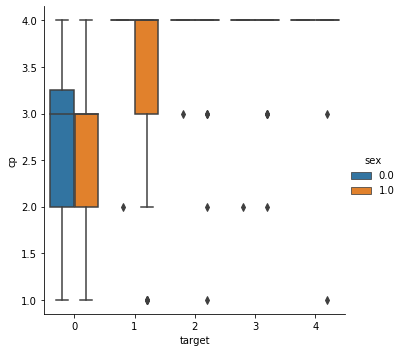

In [24]:
sns.catplot(x="target", y="cp", hue="sex", kind='box', data=data)

From the above, it is interesting to note that the majority of women are having cp of category 2 (atypical angina) and category 3 (non-anginal pain) but they still have class 0. Also, male of class 1 seem to have majority of cp 3 (non-anginal pain) and cp 4 (asymptomatic). However, the majority of male and female at categories 2, 3, and 4  are having chest pain of type 4 (asympatomatic). Moreover, women of target class 1 all have cp 4 except outlier with cp 2. 

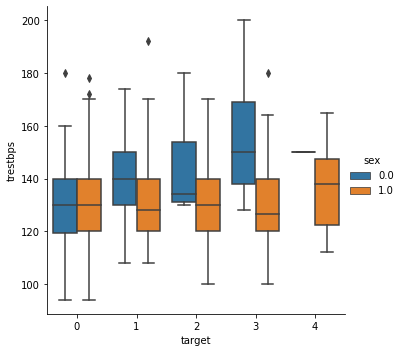

In [25]:
sns.catplot(x='target', y='trestbps', hue='sex', kind='box', data=data)

From the above we see females have higher resting blood pressure than males in all categories except at category 0 where they have similar. For males, the higher median was at class 4. However, the median of female at class 4 is still higher. There are ouliers at 3 classes, 0, 1, and 3 with more male outliers (4) than female (1). Interestingly, the higher distribution of trestbps is for female of target value 3 where the highest bound is reaching 200. Also, it seems that women have increasing trestbps as the class change from 0 to 4. However, men seems to have similar distributions accross classes from 0 to 3 with class 4 having the highest median. 

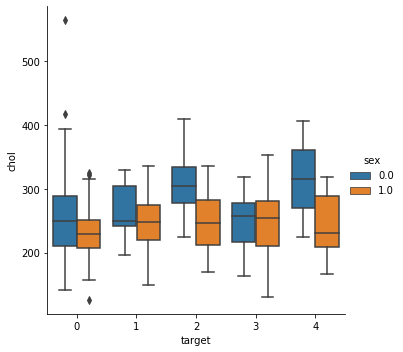

In [26]:
sns.catplot(x='target', y='chol', hue='sex', kind='box', data=data)

From above we can see that female chol value is quite higher than the male for all classes except class 3. Also, there seems to be 2 female and 2 male outliers at class 0. The female outliers at class 0 are both above 400 while the male outliers have one of value above 300 but below 400 and the other is at the lower spectrum with value below 100. 

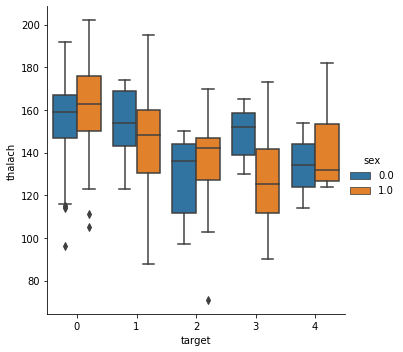

In [27]:
sns.catplot(x='target', y='thalach', hue='sex', kind='box', data=data)

From above, we can see that, there are 2 female and 2 male outliers at class 0 where the maximum heart rate achieved is below 120. Also, it seems male have higher variance of values at classes 1,2,3 and 4. In addition, there is one male outlier at class 2 with a maximum heart rate below 80!

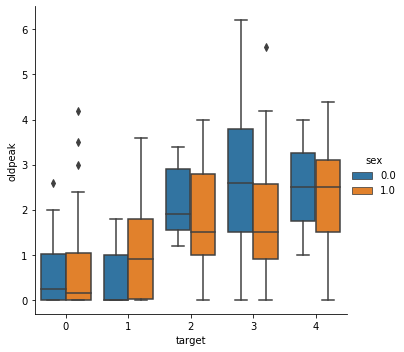

In [28]:
sns.catplot(x='target', y='oldpeak', hue='sex', kind='box', data=data)

Interestingly, there are 3 male and 1 female outliers at class 0 while male and female seems to have close distributions at this class. In addition there is an outlier male at class 3. The variance of values at class 3 for female seems to be the highest in the whole population which is opposite for the other classes since male have higher variances.

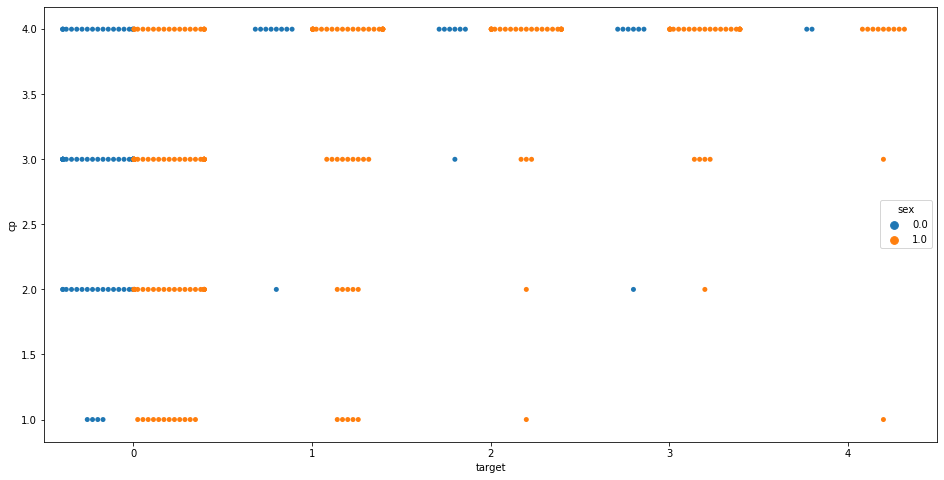

In [29]:
#the below plot will illustrate the distribution of values between 2 variables.
sns.swarmplot(x="target", y="cp", hue="sex", data=data, dodge=True)

From the above plot we can see that there are more male of chest pain 1 accross all targets than female. Also, the female seems to have greater presence at target 0 and chest pain type 4 (asymptomatic) as we saw in the previous plots, too. However, the greatest presence for female is at cp type 4. 

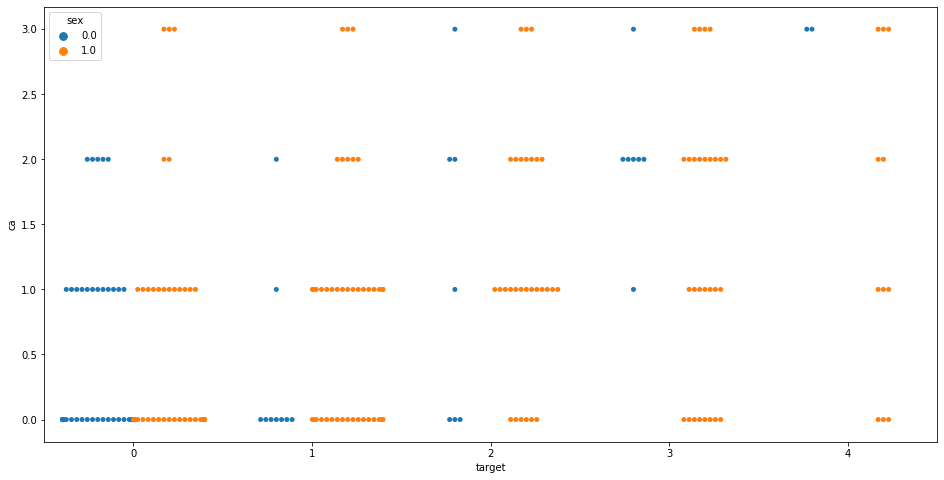

In [30]:
sns.swarmplot(x="target", y="ca", hue="sex", data=data, dodge=True)

Women with target 0 and ca (number of vesseles with calcium) 0 are the highest frequency followed by target 0 and ca 1. Also, the highest presence of women are at ca value of 2 where there are even more female than male of ca 2 and target 0. In addition, male lowest presence in the whole population was at class 0 and ca 2 and class 4 and ca 2 too. 

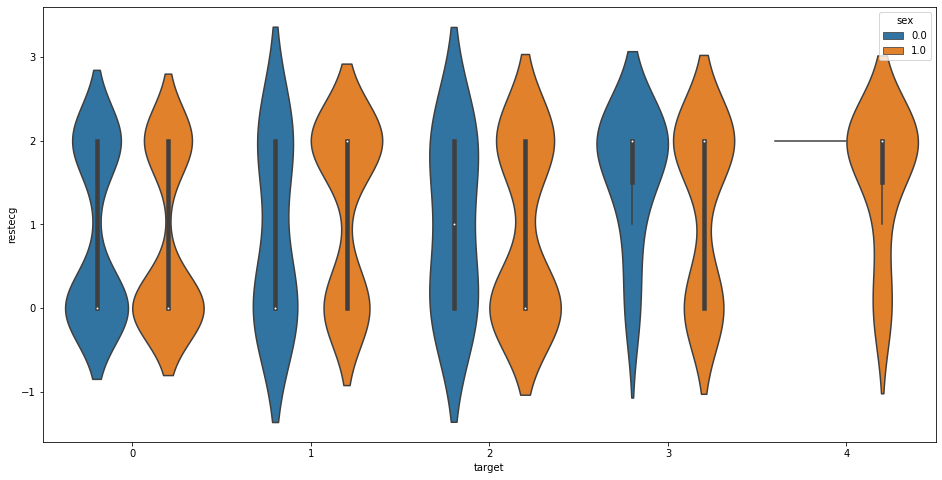

In [31]:
#this will draw a violin plot which is similar to the box plot put shows the frequency of 
#data at each value more clearly
sns.violinplot(x="target", y="restecg", hue='sex', data=data)

First the meaning of each restecg values is as below: 

* Value 0: normal
* Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria


The first look at the above plot will attract the attention twards the absence of the violin at the target value 4 for female which suggests that all the female of class 4 have a restecg (resting electrocardiographic results) of value 2. It is clear from the above that the frequency of value 1 at all targets for male is lower than that of the female and it is the lowest among all the values of restecg except at target 4 where it seems that 0 is smaller for male. 

For target 0, the female and male seems to have similar distributions. 

For target 1, the female have lower median of 0 and male have more frequency at both values of 0 and 2 or restecg.

For target 2, the female seems to have the the more stable distribution among all target values while male seem to have more frequency at restecg value 0. 

For target 3, the female resecg distribuiton is skewed twards value 2 and male have the highest frequency at value 2. 

(array([142.,   0.,   0.,   0.,   0., 140.,   0.,   0.,   0.,  21.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

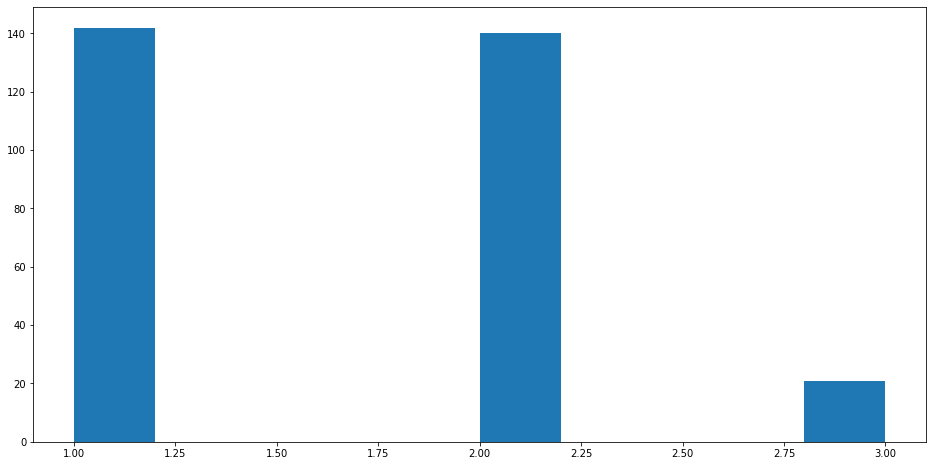

In [32]:
plt.hist(data['slope'])

First the values of slope means the following: 
1. upsloping
2. flat
3. downsloping

From the above we can see that the flat and downsloping values seem to be the equal with the majority of the population having one of these 2 values. However, the minority are having downsloping value with frequency around 20 records.

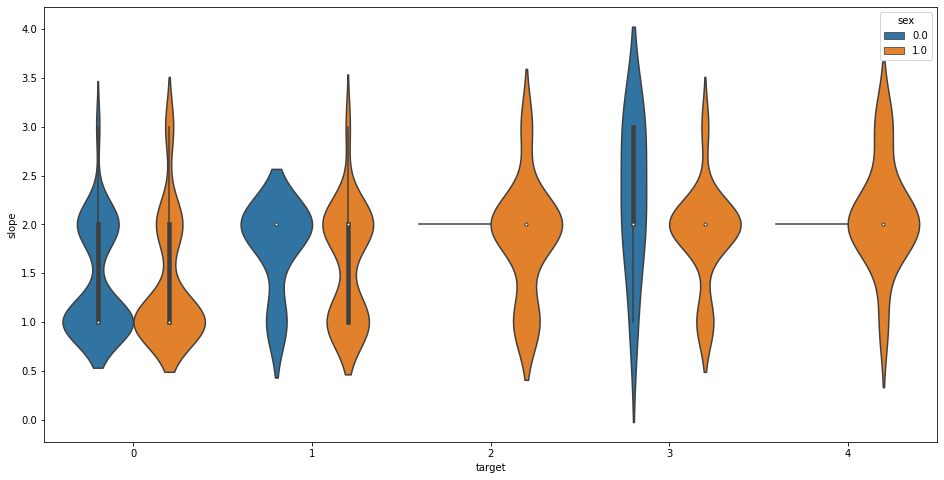

In [33]:
sns.violinplot(x="target", y="slope", hue='sex', data=data)

From the above plot of the slope against target, we can see that females and males are having similar distribution over slope with target 0 where the majority of them having slope 1 (upsloping). When target is 1, the slope of female is centered around slope 2 (flat) with no slope value of 3 (downlsloping). Also, for male with target 1 we can see the majority and the median is slope 2. It is interesting to see that females with target 2 and 4 have slope 2 only and when target is 3 they seem to have uniform distribution accross the all values of slope. However, male slope seem to have similar distribution when target is 2,3, and 4. 

/Users/abz/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


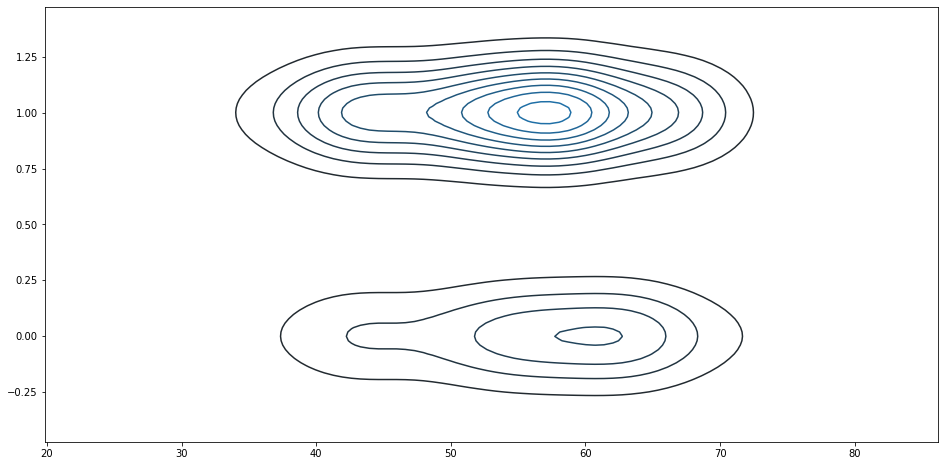

In [34]:
#the below will plot a KDE plot which is Kernel Density Estimate (KDE)
sns.kdeplot(data)

The kdeplot above shows two centers for the data which might suggest the data are categorized in two different ways. 

## Data Preparation

Now, lets convert the numerical values to dummies (0s and 1s) and create columns for them to extend our feature space. 

In [35]:
#first create dummies for sex (male and female)
sex = pd.get_dummies(data['sex'])
sex = sex.rename({0: 'female', 1: 'male'}, axis='columns')

In [36]:
#second create dummies for cp (create 4 new columns)
cp = pd.get_dummies(data['cp'])
cp = cp.rename({1: "cp_typical angina", 2: "cp_atypical angina", 3: "cp_non-anginal pain", 4: "cp_asymptomatic"}, axis='columns')

In [37]:
#fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
fbs = pd.get_dummies(data['fbs'])
fbs = fbs.rename({0: "fbs_no", 1: "fbs_yes"}, axis='columns')

In [38]:
#restecg: (0: normal, 1: ST-T wave abnormality, 
#2: left ventricular hypertrophy by Estes criteria)
restecg = pd.get_dummies(data['restecg'])
restecg = restecg.rename({0.0:"restecg_normal", 1.0:"restecg_abnormality", 2.0:"restecg_Estes"}, axis='columns')

In [39]:
#fexang: exercise induced angina (1 = yes; 0 = no)
exang = pd.get_dummies(data['exang'])
exang = exang.rename({0: 'exang_no', 1: 'exang_yes'}, axis='columns')

In [40]:
#slope:  (1: upsloping, 2: flat, 3: downsloping)
slope = pd.get_dummies(data['slope'])
slope = slope.rename({1.0: 'slope_upsloping', 2.0:'slope_flat', 3.0:'slope_downsloping'}, axis='columns')

In [41]:
#thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
thal = pd.get_dummies(data['thal'])
thal = thal.rename({3.0: "thal_normal", 6.0: "thal_fixed_def", 7.0: "thal_reversable_def"}, axis='columns')

In [42]:
#check the column before adding the newly created columns
data.columns

Index(['Age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [43]:
#concatenate the newly created columns with the existing columns
data = pd.concat([data, sex, cp, fbs, restecg, exang, slope, thal], axis=1) #comment to avoid adding them again

In [44]:
data['slope'].head()

0    3.0
1    2.0
2    2.0
3    3.0
4    1.0
Name: slope, dtype: float64

In [45]:
#check the new data with added columns
data.columns

Index(['Age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'female', 'male',
       'cp_typical angina', 'cp_atypical angina', 'cp_non-anginal pain',
       'cp_asymptomatic', 'fbs_no', 'fbs_yes', 'restecg_normal',
       'restecg_abnormality', 'restecg_Estes', 'exang_no', 'exang_yes',
       'slope_upsloping', 'slope_flat', 'slope_downsloping', 'thal_normal',
       'thal_fixed_def', 'thal_reversable_def'],
      dtype='object')

Now, after exmpanding the columns space, lets try to draw the pairplots for the data as before. 

/Users/abz/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/abz/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


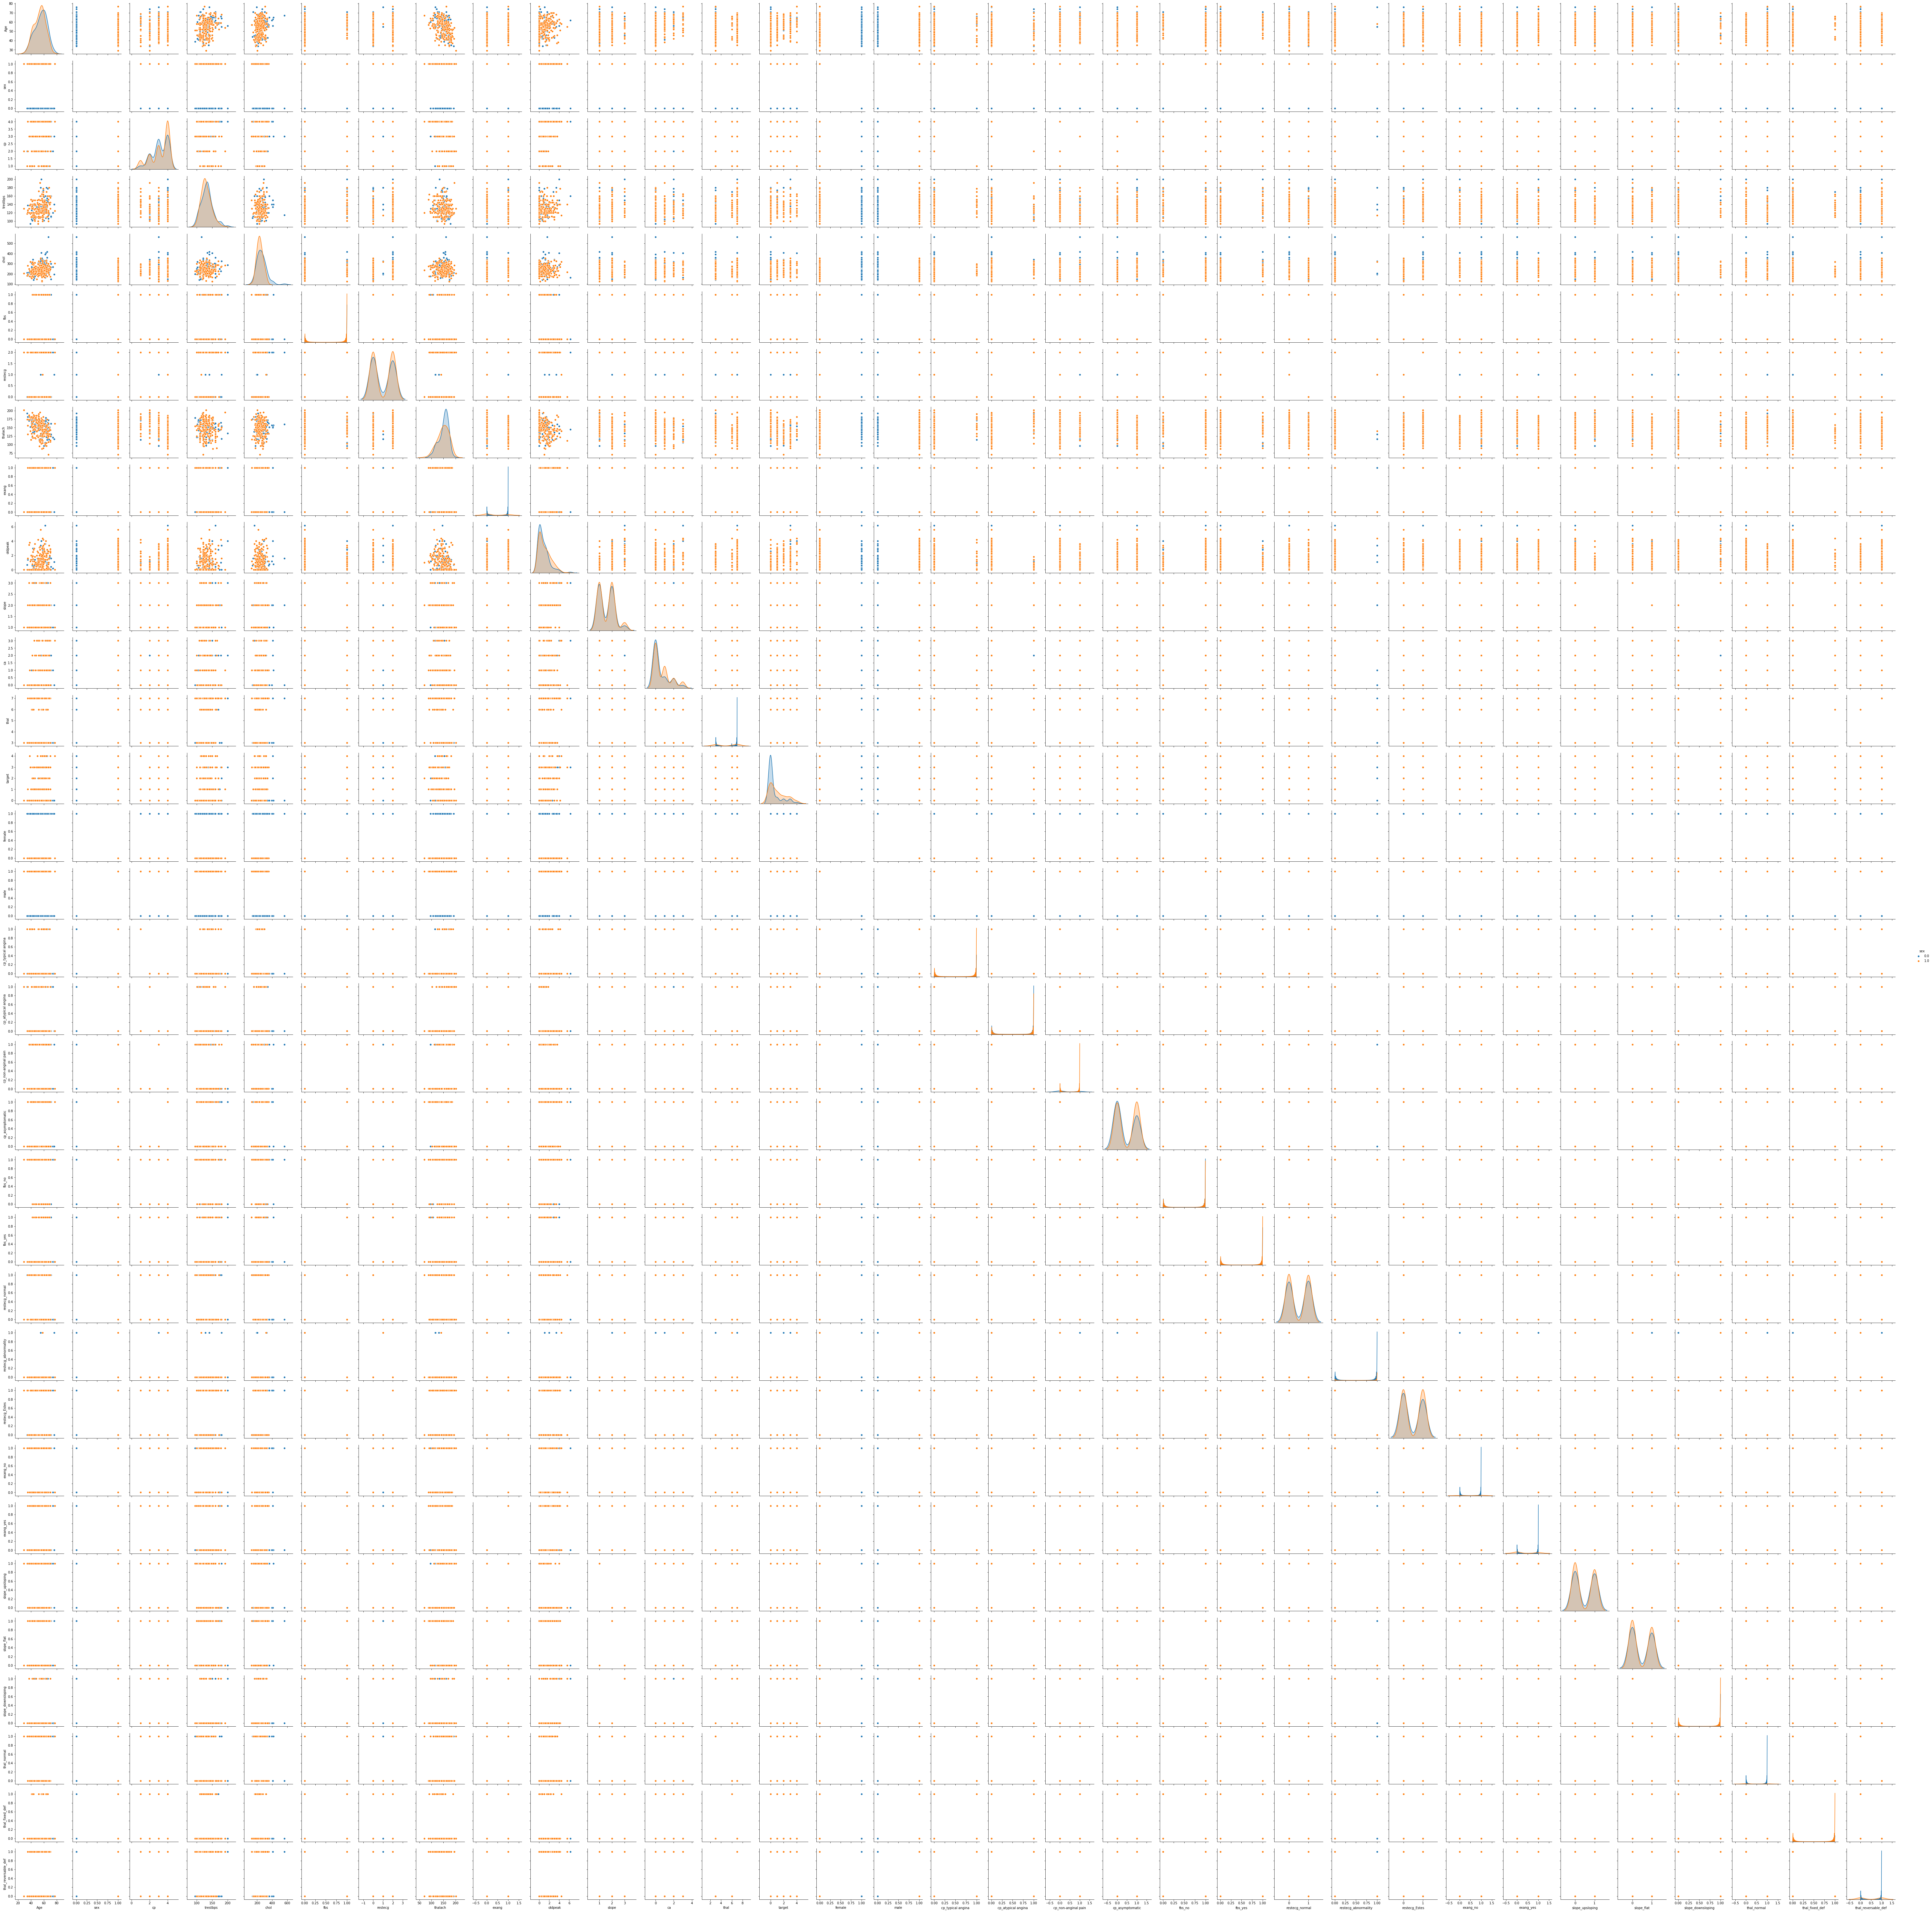

In [46]:
expanded_pair_plot = sns.pairplot(data=data, hue='sex') #male is 1 and female is 0.

In [47]:
#save the figure as a png file
#expanded_pair_plot.savefig('myfig_expanded')

From the above, we can see the new pairwise relationships between the new feature space and some new paterns can be seen within categorical variables at the diagonal of the above plot box i.e. the histogram plot in addition to other plots. 

## Supervised Learning Task

Now we have the prepared data for the supervised learning task, let's try to do the following: 
1. classify the data using three classification methods:
    * Logistic Regression
    * Random Forest Classifier
    * Deep Neural Network
2. Select the parameters for the above models using _cross validation_
3. Compare the performances of these models

### Logistic Regression

First, we start by splitting the data into input and output and then spliting it to training and testing sets in order to pass them to the logistic regressor. However, before we do so, let's get some code to visualize and evaluate the logistic regressor on predicting the training and testing sets. 

In [48]:
##############################################################################
# THE BELOW CODE IS TAKEN FROM THE CLASS EXAMPLE, USED TO EVALUATE THE MODEL #
##############################################################################
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt


def scaled_rmse(y_true, y_pred):
    """
    Rescaled RMSE
    
    Parameters
        
        y_true: vector of labels
        y_pred: vector of predictions
    """
    mse = mean_squared_error(y_true, y_pred)
    return sqrt(mse / np.mean(y_true**2))


def score_model(model, data, metric):
    """
    Score model on data according to metric
    
    Parameters
        
        model: sklearn model instance
        data: tuple of inputs and labels
        metric: callable metric function metric(y_true, y_pred)
    """
    x, y_true = data
    y_pred = model.predict(x)
    return metric.__name__, metric(y_true, y_pred)


def evaluate(model,
                       train_data,
                       test_data,
                       metrics=[r2_score, mean_squared_error, scaled_rmse]):
    """
    Evaluates the train/test performance of model
    
    Parameters
        
        model: sklearn model instance
        train_data: tuple of training inputs and labels
        test_data: tuple of testing inputs and labels
        metrics: a list of callable metrics to evaluate
    """

    # Train model
    #model.fit(*train_data)

    # Evaluate Model
    print(f'{"="*100} \n Evaluating: \n {model} \n{"="*100}')
    for m in metrics:
        m_name, m_value_train = score_model(model=model,
                                            data=train_data,
                                            metric=m)
        _, m_value_test = score_model(model=model, data=test_data, metric=m)
        print(
            f'{m_name:<20} {m_value_train:>10.2f} (train) {m_value_test:>10.2f} (test)'
        )

    # Plot data
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))
    sns.scatterplot(
        x=train_data[1],
        y=model.predict(train_data[0]),
        ax=ax[0],
        alpha=0.5,
    )
    ax[0].set_title('Train')
    sns.scatterplot(
        x=test_data[1],
        y=model.predict(test_data[0]),
        ax=ax[1],
        alpha=0.5,
    )
    ax[1].set_title('Test')

    for a in ax:
        a.set_xlabel('y_true')
        a.set_xlabel('y_pred')
        a.plot(a.get_xlim(), a.get_ylim(), ls='--', c='k')

Since we have got the required code, let's now split the data.

In [49]:
#now create the inputs and output variables to be used for the classification
#we drop the existing non dummy categorical variables
inputs = data.drop(['target', 'sex', 'cp', 'fbs','restecg', 'exang', 'slope', 'thal'], axis=1)
outputs = data['target'] #output include the targets as is (will convert to categorical)

In [50]:
#check the columns for input
inputs.columns

Index(['Age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'female', 'male',
       'cp_typical angina', 'cp_atypical angina', 'cp_non-anginal pain',
       'cp_asymptomatic', 'fbs_no', 'fbs_yes', 'restecg_normal',
       'restecg_abnormality', 'restecg_Estes', 'exang_no', 'exang_yes',
       'slope_upsloping', 'slope_flat', 'slope_downsloping', 'thal_normal',
       'thal_fixed_def', 'thal_reversable_def'],
      dtype='object')

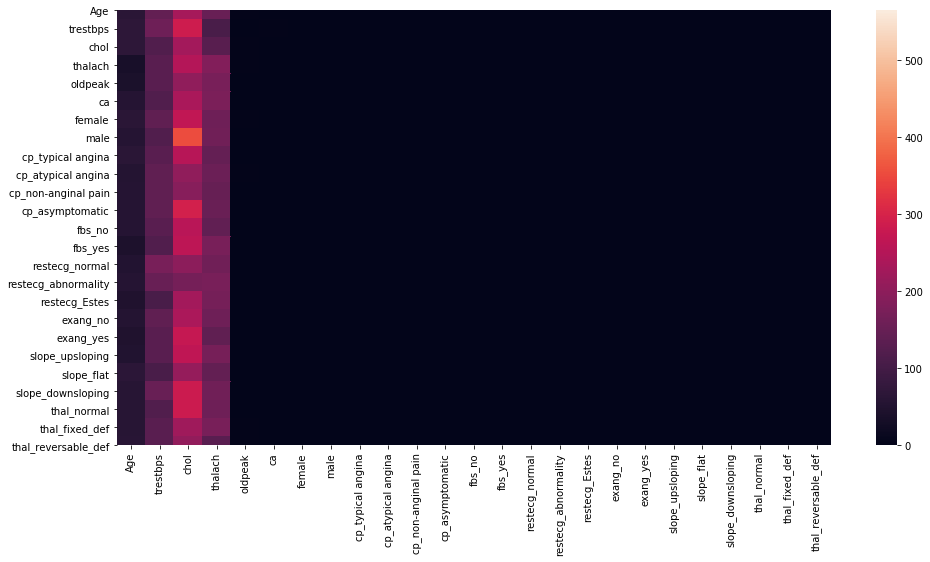

In [51]:
sns.heatmap(data=inputs, 
            xticklabels=['Age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'female', 'male',
       'cp_typical angina', 'cp_atypical angina', 'cp_non-anginal pain',
       'cp_asymptomatic', 'fbs_no', 'fbs_yes', 'restecg_normal',
       'restecg_abnormality', 'restecg_Estes', 'exang_no', 'exang_yes',
       'slope_upsloping', 'slope_flat', 'slope_downsloping', 'thal_normal',
       'thal_fixed_def', 'thal_reversable_def'], 
            yticklabels=['Age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'female', 'male',
       'cp_typical angina', 'cp_atypical angina', 'cp_non-anginal pain',
       'cp_asymptomatic', 'fbs_no', 'fbs_yes', 'restecg_normal',
       'restecg_abnormality', 'restecg_Estes', 'exang_no', 'exang_yes',
       'slope_upsloping', 'slope_flat', 'slope_downsloping', 'thal_normal',
       'thal_fixed_def', 'thal_reversable_def'])

From the above, it is interesting to see the male of chol value is the highest value among all values in the dataset. 

(array([164.,   0.,  55.,   0.,   0.,  36.,   0.,  35.,   0.,  13.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

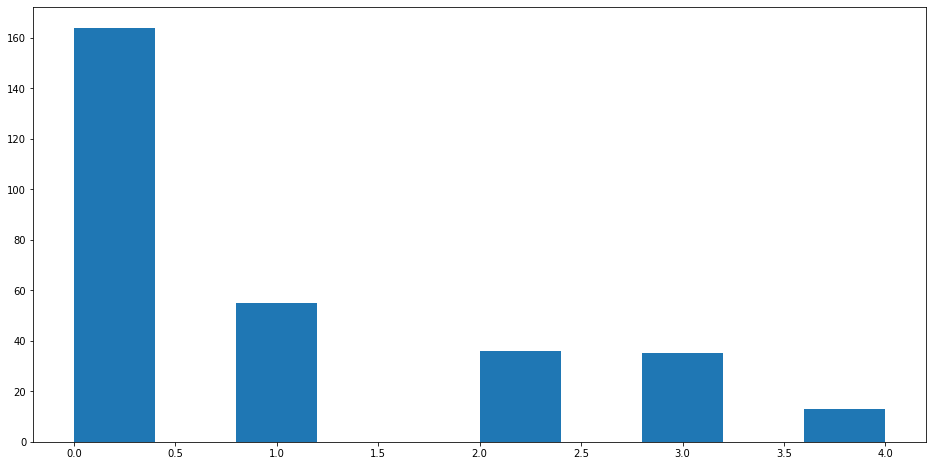

In [52]:
#check the distribution of the outputs
plt.hist(outputs)

In [53]:
#first try without transforming the data and then try with the transformation applied. 

#now split the data into training and testing using the input and output variables above
x_train, x_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.15, random_state=41)

((array([133.,   0.,  48.,   0.,   0.,  35.,   0.,  29.,   0.,  12.]),
  array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
  <a list of 10 Patch objects>),
 (array([31.,  0.,  7.,  0.,  0.,  1.,  0.,  6.,  0.,  1.]),
  array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
  <a list of 10 Patch objects>))

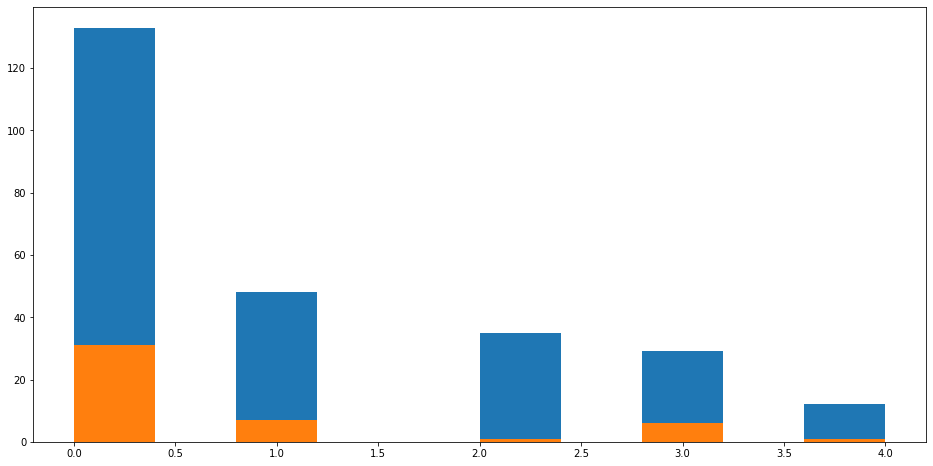

In [54]:
plt.hist(y_train),plt.hist(y_test)

As we can see above the data is already splitted into training (blue) and testing (orange)

After splitting the data, let's now create the required classifier. The classifier will be selected using gridsearch crossvalidation with 5 folds. The parameters grid is set below. 

The parameters that will be included in the gridsearch and crossvalidation selection for the logistic regression are as below: 
1. 'penalty': used to specify the norm used in the penalization [regularization] (L1, L2, elasticnet, or none). The default value is 'l2'. 
2. 'C': inverse regularization strength (smaller values specify stronger regularization). The default valueis '1.0' 
3. 'solver': the algorithm used in the optimization (netwton-cg, lbfgs, liblinear, sag, saga). The default value is 'liblinear'. Since we have multi-class we should use other than liblinear since we need to handle multinomial loses. 

In [55]:
#values to be used for the inverse regularization strength.
np.logspace(-4,4,20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [56]:
#penalty is removed since all used solvers will use l2 penalty
param_grid = [{#'penalty': ['l2','none'],
              'C': np.logspace(-4,4,20),
              'solver': ['newton-cg', 'lbfgs','sag']}]

In [57]:
#create the classifier
# NOTE: the n_jobs=-1 means use all the processors (CPUs) available. 
logreg = GridSearchCV(LogisticRegression(multi_class='multinomial'), param_grid=param_grid, cv = 5, n_jobs=-1 )

In [58]:
#now fit the classifier to the training data
logreg = logreg.fit(x_train, y_train)

/Users/abz/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/abz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [59]:
#print out the best estimator
logreg.best_estimator_

LogisticRegression(C=0.23357214690901212, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

The above are the parameters selected for the best estimater after performing the grid search

 Evaluating: 
 LogisticRegression(C=0.23357214690901212, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False) 
r2_score                   0.22 (train)       0.30 (test)
mean_squared_error         1.19 (train)       0.91 (test)
scaled_rmse                0.69 (train)       0.72 (test)


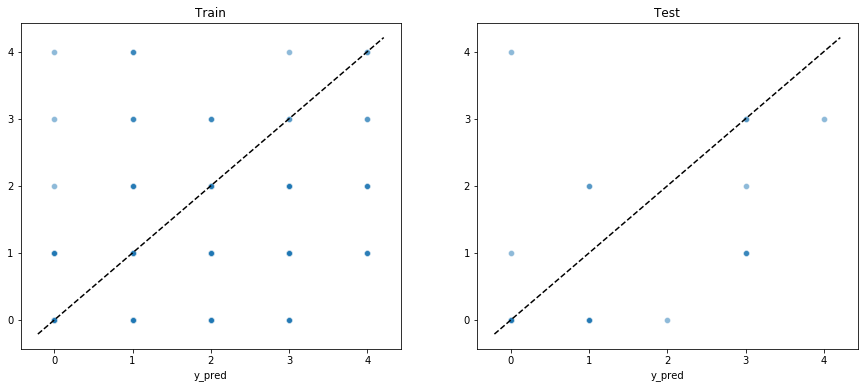

In [60]:
#use the evaluate method defined earlier to evaluate the model using the test set. 
evaluate(model=logreg.best_estimator_,
         train_data=(x_train, y_train),
         test_data=(x_test, y_test))

In [61]:
#perform prediction on the test set using the best classifier that was training using grid search and cross validation
y_hat_test = logreg.best_estimator_.predict(x_test)

In [62]:
#count the misclassified samples in the test set
count_misclassified = (y_test != y_hat_test).sum()
#print the number of missclassified samples
print('Misclassified samples: {}'.format(count_misclassified))
#calculate the accuracy
accuracy = accuracy_score(y_test.values, y_hat_test)
#print the accuracy
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 15
Accuracy: 0.67


In [63]:
#check the classification report using the predicitions against actual target values.
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        31
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         1
           3       0.67      0.33      0.44         6
           4       0.00      0.00      0.00         1

    accuracy                           0.67        46
   macro avg       0.30      0.25      0.26        46
weighted avg       0.65      0.67      0.65        46



In [64]:
#number of samples in the test set
len(y_hat_test)

46

From the above score, we can see that there were 15 misclassified samples which gave r2 score of 22 on the training data and 30 on the testing data. Looking at the accuracy, this model has an accuracy of 67% on the test set.

It is clear from the classification report that there were no predictions given for classes 1, 2 and 4.  It is important to note that, since we have a low number of samples under classes 2 and 4 with 1 sample for each class. However, class 3 has 6 classes and yet the prediction is better than class 1. Low volume of samples at these classes might be a valid reason for the model to fail to preidct them. Let's investigate what were the prediction for the classes.

In [65]:
print(y_hat_test[y_test == 1])

[0 0 2 0 0 2 0]


In [66]:
print(y_hat_test[y_test == 2])

[0]


In [125]:
print(y_hat_test[y_test == 3])

[1 3 1 1 2 3]


In [126]:
print(y_hat_test[y_test == 4])

[3]


From the above we can see that, the misclassified samples with actual class of 1 were predicted as mostly 0 with 5 misclassified samples as 0 and the other 2 samples were misclassified as class 2. Class 2 sample was predicted as class 0. Class 3 samples were misclassified as class 1 for 3 samples and class 2 for 1 sample. The only sample of class 4 was predicted as class 3. 

Below is the confusion matrix that summarize the above detailed results in addition to class 0 classifications: 

In [67]:
print(confusion_matrix(y_test, y_hat_test))

[[29  1  0  0  1]
 [ 5  0  2  0  0]
 [ 1  0  0  0  0]
 [ 0  3  1  2  0]
 [ 0  0  0  1  0]]


As we can see, 29 samples of class 0 were clasified correctly which means this model is very good in predicting class 0 as we could see above from the f1-score for class 0 which was 0.88.

To investigate if increasing the number of samples can improve the predictibility of this model, lets create additional samples of the same size as class 0 (mojority of samples are of this class). 

In [68]:
#We can do this using resample from sklearn
from sklearn.utils import resample

In [69]:
#create a subset of data for each target value other than 0.
data_with_disease_1 = data[data.target == 1]
data_with_disease_2 = data[data.target == 2]
data_with_disease_3 = data[data.target == 3]
data_with_disease_4 = data[data.target == 4]

In [70]:
#resample to match the size of class 0 for each other class other than 0.
#we are using the same random state for reproduceablity. 

data_with_disease_1_resampled = resample(data_with_disease_1,
                                       replace=True, 
                                       n_samples = len(data[data.target == 0]) - len(data[data.target == 1]), 
                                       random_state = 55)
data_with_disease_2_resampled = resample(data_with_disease_2,
                                       replace=True, 
                                       n_samples = len(data[data.target == 0]) - len(data[data.target == 2]), 
                                       random_state = 55)
data_with_disease_3_resampled = resample(data_with_disease_3,
                                       replace=True, 
                                       n_samples = len(data[data.target == 0]) - len(data[data.target == 3]), 
                                       random_state = 55)
data_with_disease_4_resampled = resample(data_with_disease_4,
                                       replace=True, 
                                       n_samples = len(data[data.target == 0]) - len(data[data.target == 4]), 
                                       random_state = 55)

In [71]:
print (len(data_with_disease_1_resampled),
      len(data_with_disease_2_resampled),
      len(data_with_disease_3_resampled),
      len(data_with_disease_4_resampled))

109 128 129 151


We see that the new subsets have different sizes since we resample the required number of sample in each class to match the number of sample in class 0 while taking into account the existing number of samples within that class. To ensure that we have the same number of samples of each class we can concatenate the data into a new set and then plot the histogram of the target value.

In [72]:
new_data = pd.concat([data, data_with_disease_1_resampled, data_with_disease_2_resampled, 
                      data_with_disease_3_resampled, data_with_disease_4_resampled])

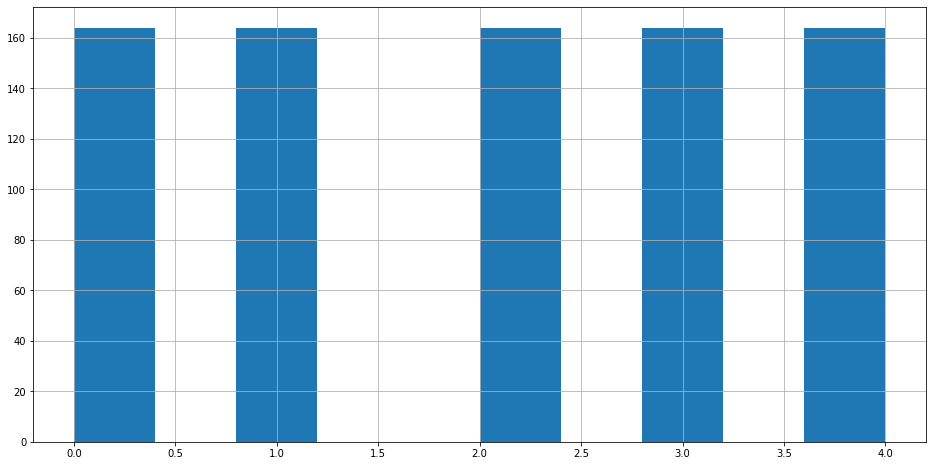

In [73]:
new_data['target'].hist()

As we see above all target values now have the same number of samples. 

In [74]:
new_data

Age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
45   58.0  1.0  3.0     112.0  230.0  0.0      2.0    165.0    0.0      2.5   
47   50.0  1.0  4.0     150.0  243.0  0.0      2.0    128.0    0.0      2.6   
211  38.0  1.0  1.0     120.0  231.0  0.0      0.0    182.0    1.0      3.8   
211  38.0  1.0  1.0     120.0  231.0  0.0      0.0    182.0    1.0      3.8   
211  38.0  1.0  1.0     120.0  231.0  0.0      0.0    182.0    1.0      3.8   

     ...  restecg_abnormality  restecg_Estes  exang_no  exang_yes  \
0    ...                    0              1         1          0   
1    ...                    0              1         0          1   
2    ...                    0              1         0          1   
3    ...                    0              0         1          0   
4    ...                    0              1         1          0   
..   ...                  ...            ...       ...        ...   
45   ...                    0              1         1          0   
47   ...                    0              1         1          0   
211  ...                    0              0         0          1   
211  ...                    0              0         0          1   
211  ...                    0              0         0          1   

     slope_upsloping  slope_flat  slope_downsloping  thal_normal  \
0                  0           0                  1            0   
1                  0           1                  0            1   
2                  0           1                  0            0   
3                  0           0                  1            1   
4                  1           0                  0            1   
..               ...         ...                ...          ...   
45                 0           1                  0            0   
47                 0           1                  0            0   
211                0           1                  0            0   
211                0           1                  0            0   
211                0           1                  0            0   

     thal_fixed_def  thal_reversable_def  
0                 1                    0  
1                 0                    0  
2                 0                    1  
3                 0                    0  
4                 0                    0  
..              ...                  ...  
45                0                    1  
47                0                    1  
211               0                    1  
211               0                    1  
211               0                    1  

[820 rows x 33 columns]

The total number of data samples is 820 samples of all classes. 

Let's try to classify using this expanded version of the dataset to test if it will improve the accuracy of the model. 

In [75]:
#now create the inputs and output variables to be used for the classification
#we drop the existing non dummy categorical variables
inputs = new_data.drop(['target', 'sex', 'cp', 'fbs','restecg', 'exang', 'slope', 'thal'], axis=1)
outputs = new_data['target'] #output include the targets as is (will convert to categorical)

In [76]:
#use same random state and test size
x_train, x_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.15, random_state=41)

/Users/abz/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


 Evaluating: 
 LogisticRegression(C=11.288378916846883, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=None, solver='newton-cg',
                   tol=0.0001, verbose=0, warm_start=False) 
r2_score                   0.51 (train)       0.11 (test)
mean_squared_error         0.99 (train)       1.51 (test)
scaled_rmse                0.42 (train)       0.44 (test)


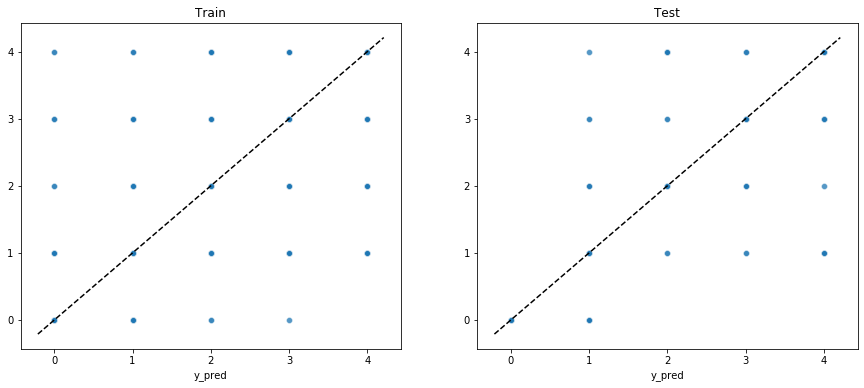

In [77]:
logreg = GridSearchCV(LogisticRegression(multi_class='multinomial'), param_grid=param_grid, cv = 5, n_jobs=-1 )
logreg.fit(x_train, y_train)
evaluate(model=logreg.best_estimator_,
         train_data=(x_train, y_train),
         test_data=(x_test, y_test))

In [78]:
#check how many samples in the test
len(y_test)

123

In [79]:
#perform prediction on the test set using the best classifier that was training using grid search and cross validation
y_hat_test = logreg.best_estimator_.predict(x_test)

#count the misclassified samples in the test set
count_misclassified = (y_test != y_hat_test).sum()
#print the number of missclassified samples
print('Misclassified samples: {}'.format(count_misclassified))
#calculate the accuracy
accuracy = accuracy_score(y_test.values, y_hat_test)
#print the accuracy
print('Accuracy: {:.2f}'.format(accuracy))

print(classification_report(y_test, y_hat_test))

Misclassified samples: 62
Accuracy: 0.50
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        10
           1       0.33      0.26      0.29        23
           2       0.46      0.38      0.42        29
           3       0.50      0.48      0.49        25
           4       0.55      0.61      0.58        36

    accuracy                           0.50       123
   macro avg       0.49      0.55      0.50       123
weighted avg       0.48      0.50      0.48       123



In addition to the above classification report, lets see the confusion matrix of this model: 

In [80]:
print(confusion_matrix(y_test, y_hat_test))

[[10  0  0  0  0]
 [ 7  6  5  3  2]
 [ 0  3 11  3 12]
 [ 0  3  6 12  4]
 [ 0  6  2  6 22]]


From the confusion matrix above, the best classified class is class 0 followed by class 4!. This is surprizing since before class 4 has 1 sample only due to the size of samples within this class, but other classes has more samples even before resampling. The least accurately classified class is class 1 with only 5 samples out of 28 classified correctly which can be seen from the lowest f1-score from the classification report. However, class 0 now appears to have the lowest number of samples compared with other classes at 10 samples only while the other classes have above 20 samples each.

From the above results, we can see that the model now is predicting the other classes which were not predicted before. Also, this comes at the cost of droping the accuracy of prediction for the model as a whole and for class 0 speciifcally. However, f1-score for the other classes imroved from the previous prediction except class 0 where it droped from 0.88 to 0.74. 

In conclusion, the resampling effort resulted in better prediction for other classes at the cost of droping the whole model prediction accuracy. The choice between the two is determined by the perference to improve the prediciton accuracy of the no-desease class (class 0) or the other classes (desease). If the previous model was used to answer the question that the pachient has heart desease or not then it is still doing good for the other classes since the predicted values has a disease class with 5 samples misclassified as class 0. 

<hr>

Finally, let's try the model with transformed data to see if the prediction accuracy would improve with the original data without resampling.

In [91]:
#now create the inputs and output variables to be used for the classification
#we drop the existing non dummy categorical variables
inputs = data.drop(['target', 'sex', 'cp', 'fbs','restecg', 'exang', 'slope', 'thal'], axis=1)
outputs = data['target'] #output include the targets as is (will convert to categorical)

In [92]:
#now split the data into training and testing using the input and output variables above
x_train, x_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.15, random_state=41)


#now transform the training and testing data using a transformer that was fit on the training set to ensure the test
#set did not influence how the data is transformed.
pt = PowerTransformer()
pt.fit(x_train)
x_train = pt.transform(x_train)
x_test = pt.transform(x_test)

/Users/abz/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


 Evaluating: 
 LogisticRegression(C=0.004832930238571752, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=None, solver='newton-cg',
                   tol=0.0001, verbose=0, warm_start=False) 
r2_score                  -0.14 (train)       0.20 (test)
mean_squared_error         1.74 (train)       1.04 (test)
scaled_rmse                0.84 (train)       0.77 (test)


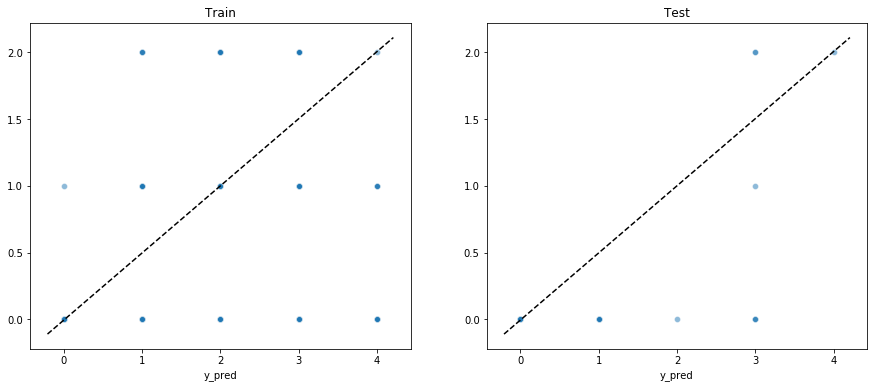

In [93]:
logreg = GridSearchCV(LogisticRegression(multi_class='multinomial'), param_grid=param_grid, cv = 5, n_jobs=-1 )
logreg.fit(x_train, y_train)
evaluate(model=logreg.best_estimator_,
         train_data=(x_train, y_train),
         test_data=(x_test, y_test))

In [94]:
#perform prediction on the test set using the best classifier that was training using grid search and cross validation
y_hat_test = logreg.best_estimator_.predict(x_test)

#count the misclassified samples in the test set
count_misclassified = (y_test != y_hat_test).sum()
#print the number of missclassified samples
print('Misclassified samples: {}'.format(count_misclassified))
#calculate the accuracy
accuracy = accuracy_score(y_test.values, y_hat_test)
#print the accuracy
print('Accuracy: {:.2f}'.format(accuracy))

print(classification_report(y_test, y_hat_test))

Misclassified samples: 15
Accuracy: 0.67
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        31
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         1

    accuracy                           0.67        46
   macro avg       0.15      0.20      0.17        46
weighted avg       0.50      0.67      0.57        46



/Users/abz/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [95]:
print(confusion_matrix(y_test, y_hat_test))

[[31  0  0  0  0]
 [ 7  0  0  0  0]
 [ 1  0  0  0  0]
 [ 3  1  2  0  0]
 [ 0  0  1  0  0]]


From the confusion matrix above, we can see that the majority of predictions using the transformation were given to class 0 except 4 predictions: the first is made for class 1 while actual class is 3, and 2 other samples were predicted class 2 while actual class is 3 and 1 sample was predicted class 2 while actual prediction class is 4. 

Therefore, the logistic regression model that is showing the best accuracy among the tried models is the one with the transformed data at accuracy of 67%. However, it is doing poorly with predicting other classes different from class 0 and for the test set it never predicted any sample of class 3 and 4 even if it is wrong. The second best performing is the first model produced using cross-validation gridsearch which achieved accuracy of 66% and could predict 2 different classes namely class 0 and class 3 and it was giving prediction for all classes except class 4. The model with resampling could predict all the classes and doing the best in predicting class 4 than the rest but its overall accuracy is the lowest at 50%. 

### Random Forest

Now let's try with the random forest model. First, we define the grid search parameters that will help us in selecting the model using cross validation.  

In [96]:
# Number of trees in random forest
n_estimators = np.arange(1,50,1)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = np.arange(2,50,2)
max_depth = np.append(max_depth, None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(grid)

{'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]), 'max_features': ['auto', 'sqrt'], 'max_depth': array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36,
       38, 40, 42, 44, 46, 48, None], dtype=object), 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


Now construct the model using the above grid search parameters

In [97]:
#now split the data into training and testing using the input and output variables
#from before.
x_train, x_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.15, 
                                                    random_state=41)

In [98]:
rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv=5, n_jobs=-1, 
                  verbose=2)

In [654]:
#rf.fit(x_train, y_train)

Fitting 5 folds for each of 44100 candidates, totalling 220500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 927 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 3047 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 5311 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 8231 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done 11791 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 16007 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 20863 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 26375 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 32527 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 39335 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 46783 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 54887 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 63631 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 73031 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=Fa...
       38, 40, 42, 44, 46, 48, None], dtype=object),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [

In [669]:
#write the gridsearch result into a file to use it later for easier re-run of the notebook
# pkl_filename = "rf.pkl"
# with open(pkl_filename, 'wb') as file:
#     pickle.dump(rf, file)

In [99]:
#read the model from the file and use it to make predictions
with open('rf.pkl', 'rb') as file:
    rf_restored_model = pickle.load(file)

In [100]:
#display the grid search restored
rf_restored_model

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=Fa...
       38, 40, 42, 44, 46, 48, None], dtype=object),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [

In [101]:
#display best estimator in the grid search 
rf_restored_model.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=8,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

From the above, we can see the selected model using gridsearch with tuned parameters and cross validation has the following parameters: 
   * n_estimators': 8 trees in the random forest.
   * 'max_features': automatically selected (the number of features to consider when looking for the best split.
   * 'max_depth': 12 is the maximum depth of the tree
   * 'min_samples_split': 5 is the minimum number of samples required to split an internal node.
   * 'min_samples_leaf': 4 is the minimum number of samples required to be at a leaf node
   * 'bootstrap': True (bootstrap samples are used when building trees)

 Evaluating: 
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=8,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 
r2_score                   0.40 (train)       0.57 (test)
mean_squared_error         0.91 (train)       0.57 (test)
scaled_rmse                0.60 (train)       0.57 (test)


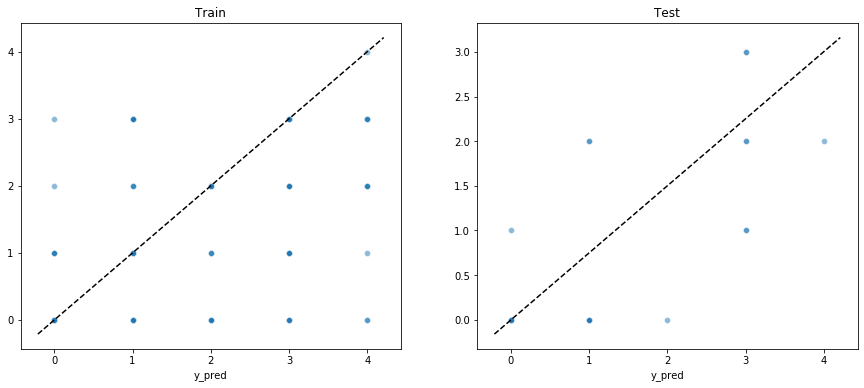

In [102]:
#evaluate the model 
evaluate(model=rf_restored_model.best_estimator_,
         train_data=(x_train, y_train),
         test_data=(x_test, y_test))

In [103]:
#perform prediction on the test set using the best classifier that was training using grid search and cross validation
y_hat_test = rf_restored_model.best_estimator_.predict(x_test)

#count the misclassified samples in the test set
count_misclassified = (y_test != y_hat_test).sum()
#print the number of missclassified samples
print('Misclassified samples: {}'.format(count_misclassified))
#calculate the accuracy
accuracy = accuracy_score(y_test.values, y_hat_test)
#print the accuracy
print('Accuracy: {:.2f}'.format(accuracy))

print(classification_report(y_test, y_hat_test))

Misclassified samples: 14
Accuracy: 0.70
              precision    recall  f1-score   support

           0       0.83      0.97      0.90        31
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         1
           3       1.00      0.33      0.50         6
           4       0.00      0.00      0.00         1

    accuracy                           0.70        46
   macro avg       0.37      0.26      0.28        46
weighted avg       0.69      0.70      0.67        46



/Users/abz/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [104]:
print(confusion_matrix(y_test, y_hat_test))

[[30  1  0  0  0]
 [ 5  0  2  0  0]
 [ 1  0  0  0  0]
 [ 0  2  2  2  0]
 [ 0  0  1  0  0]]


In [105]:
len(y_hat_test)

46

From the above we can see that, the overall accuracy of the model is 70% with 14 misclassified samples out of 46 samples. The best classified class is class 0 followed by class 3 with f1-score of 0.50 and precision of 1. The model could not predict class 1 and class 2 accurately even though some other classes were predicted as class 1 namely class 0 and class 3. However, no single sample was predicted as class 4 even mistakenly and the only sample was predicted as of class 2.

Let's try to use decision rees again with transformed data and see the performance.

In [106]:
#now create the inputs and output variables to be used for the classification
#we drop the existing non dummy categorical variables
inputs = data.drop(['target', 'sex', 'cp', 'fbs','restecg', 'exang', 'slope', 'thal'], axis=1)
outputs = data['target'] #output include the targets as is (will convert to categorical)

In [107]:
#now split the data into training and testing using the input and output variables above
x_train, x_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.15, random_state=41)


#now transform the training and testing data using a transformer that was fit on the training set to ensure the test
#set did not influence how the data is transformed.
pt = PowerTransformer()
pt.fit(x_train)
x_train = pt.transform(x_train)
x_test = pt.transform(x_test)

After transforming the data we need to fit the model to the transformed training data. I elected to do this using the same selected parameters from the gridsearch before using crossvalidation. 

In [111]:
#let's now perform a grid search utilizing the transformed data and see the best estimator
rf_transformed = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv=5, n_jobs=-1, 
                  verbose=2)

In [112]:
#now fit it the the transformed data
#rf_transformed.fit(x_train, y_train)

Fitting 5 folds for each of 44100 candidates, totalling 220500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 1630 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 3328 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 5518 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 8188 tasks      | elapsed:   57.5s
[Parallel(n_jobs=-1)]: Done 11350 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 14992 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 19126 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 23542 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 26095 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 28888 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 31927 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 35206 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 38731 t

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=Fa...
       38, 40, 42, 44, 46, 48, None], dtype=object),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [

In [113]:
#save the gridsearch results 
pkl_filename = "rf_transformed.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rf_transformed, file)

In [114]:
#read the grid search result from the file and use it to make predictions
with open('rf_transformed.pkl', 'rb') as file:
    rf_transformed_restored_model = pickle.load(file)

In [115]:
rf_transformed_restored_model

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=Fa...
       38, 40, 42, 44, 46, 48, None], dtype=object),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [

In [116]:
rf_transformed_restored_model.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=38, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=3,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

From the above, we can see the selected model using gridsearch with tuned parameters and cross validation with transformed data has the following parameters: 
   * n_estimators': 3 trees in the random forest.
   * 'max_features': automatically selected (the number of features to consider when looking for the best split.
   * 'max_depth': 38 is the maximum depth of the tree
   * 'min_samples_split': 10 is the minimum number of samples required to split an internal node.
   * 'min_samples_leaf': 4 is the minimum number of samples required to be at a leaf node
   * 'bootstrap': False (bootstrap samples are NOT used when building trees)
   

It is clear the transformation of data resulted in a different best estimator with much deeper but less trees. 

 Evaluating: 
 GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=Fa...
       38, 40, 42, 44, 46, 48, None], dtype=object),
                         'max_features': ['auto', 'sqrt'],
                         'min_s

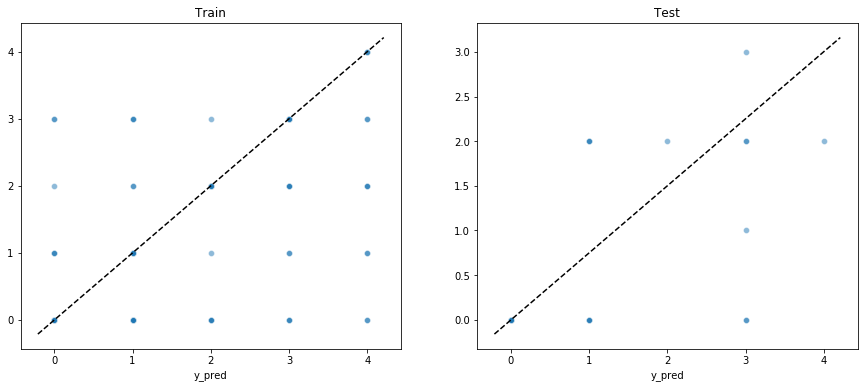

In [117]:
evaluate(model=rf_transformed_restored_model,
         train_data=(x_train, y_train),
         test_data=(x_test, y_test))

In [118]:
#perform prediction on the test set using the best classifier that was training using grid search and cross validation
y_hat_test = rf_transformed_restored_model.best_estimator_.predict(x_test)

#count the misclassified samples in the test set
count_misclassified = (y_test != y_hat_test).sum()
#print the number of missclassified samples
print('Misclassified samples: {}'.format(count_misclassified))
#calculate the accuracy
accuracy = accuracy_score(y_test.values, y_hat_test)
#print the accuracy
print('Accuracy: {:.2f}'.format(accuracy))

print(classification_report(y_test, y_hat_test))
print(confusion_matrix(y_test, y_hat_test))

Misclassified samples: 13
Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        31
           1       0.00      0.00      0.00         7
           2       0.14      1.00      0.25         1
           3       1.00      0.17      0.29         6
           4       0.00      0.00      0.00         1

    accuracy                           0.72        46
   macro avg       0.40      0.43      0.29        46
weighted avg       0.70      0.72      0.66        46

[[31  0  0  0  0]
 [ 4  0  3  0  0]
 [ 0  0  1  0  0]
 [ 2  1  2  1  0]
 [ 0  0  1  0  0]]


/Users/abz/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The above results shows that the model performance is better than the model without transformed data. As the accuracy now is 72% compared with 70% obtained earlier. In addition, this model have higher f1-score for class 0 at 0.91 but lower f1-score for class 3 at 0.29. However, the model now can predict class 2 even though we have 1 sample in the test set. Again, no single sample was predicted as class 4 here, too. 

### Deep Neural Network

Now let's try to train a neural network model to perform the classfication task. First, I will re-read the input outputs and separate the data as before. 

In [119]:
#now create the inputs and output variables to be used for the classification
#we drop the existing non dummy categorical variables
inputs = data.drop(['target', 'sex', 'cp', 'fbs','restecg', 'exang', 'slope', 'thal'], axis=1)
outputs = data['target'] #output include the targets as is (will convert to categorical)

In [120]:
#now split the data into training and testing using the input and output variables above
x_train, x_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.15, 
                                                    random_state=41)

For the NN model to perform the classfication task, we need to convert the targets into cateorgical (one-hot encoding of the classes)

In [121]:
#save the targets without transformation first
y_train_untransformed = y_train
y_test_untransformed = y_test

In [122]:
#now convert the output into different classes
y_train = to_categorical(y_train, num_classes=5)
y_test = to_categorical(y_test, num_classes=5)

In [123]:
#check training target after conversion 
y_train

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [124]:
#check the shape for training
y_train.shape

(257, 5)

In [125]:
#check the shape for testing
y_test.shape

(46, 5)

From above we can see that, there are 257 samples for training while there are 46 testing sample. They both have 5 classes as expected. 

In [203]:
# the below function will create a Neural Netowrk (NN) model 
def create_model(learn_rate=0.0015):
    # create model
    #the model is sequential
    model = Sequential()
    #add the input layer to the network with input dimention of 19 and use relu as activation function
    model.add(Dense(25, input_dim=25, activation='relu'))
    #add drop out layer to help in generalization
    model.add(Dropout(0.15))
    #add the second layer
    model.add(Dense(15, activation='relu'))
    #add the third layer
    model.add(Dense(15, activation='relu'))
    #add final (output layer) with softmax activation. 
    model.add(Dense(5, activation='softmax'))
    # Compile model
    model.compile(loss=categorical_crossentropy, #loss function (cross-entropy)
                  optimizer=keras.optimizers.RMSprop(learning_rate=learn_rate, rho=0.9), #optimization function can be SGD
                  metrics=['accuracy']) #use the accuracy metrix for evaluation
    return model

nn = create_model()


In [204]:
#dispaly a summary about the NN
nn.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 25)                650       
_________________________________________________________________
dropout_10 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 15)                390       
_________________________________________________________________
dense_39 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_40 (Dense)             (None, 5)                 80        
Total params: 1,360
Trainable params: 1,360
Non-trainable params: 0
_________________________________________________________________


As we can see above there are 1695 learning parameters based on the structure of the NN.

In [205]:
initial_weights = nn.get_weights()  # We save initial weights for later use

In [206]:
#this is the training function will use the trianing data to traina and the test data to validate
history = nn.fit(
    x=x_train,
    y=y_train,
    batch_size=5, 
    epochs=200,
    validation_data=(x_test, y_test),
    verbose=2,
)

Train on 257 samples, validate on 46 samples
Epoch 1/200
 - 0s - loss: 3.7369 - accuracy: 0.4125 - val_loss: 1.1577 - val_accuracy: 0.6522
Epoch 2/200
 - 0s - loss: 2.6060 - accuracy: 0.3852 - val_loss: 1.2532 - val_accuracy: 0.5000
Epoch 3/200
 - 0s - loss: 1.7115 - accuracy: 0.4514 - val_loss: 1.0540 - val_accuracy: 0.6304
Epoch 4/200
 - 0s - loss: 1.6937 - accuracy: 0.4786 - val_loss: 1.1077 - val_accuracy: 0.5652
Epoch 5/200
 - 0s - loss: 1.4997 - accuracy: 0.4786 - val_loss: 0.9639 - val_accuracy: 0.6739
Epoch 6/200
 - 0s - loss: 1.4428 - accuracy: 0.4903 - val_loss: 1.0485 - val_accuracy: 0.6522
Epoch 7/200
 - 0s - loss: 1.4293 - accuracy: 0.5058 - val_loss: 0.9366 - val_accuracy: 0.6739
Epoch 8/200
 - 0s - loss: 1.3996 - accuracy: 0.5019 - val_loss: 1.1121 - val_accuracy: 0.6739
Epoch 9/200
 - 0s - loss: 1.3639 - accuracy: 0.5136 - val_loss: 1.2410 - val_accuracy: 0.6739
Epoch 10/200
 - 0s - loss: 1.2916 - accuracy: 0.5058 - val_loss: 1.1795 - val_accuracy: 0.5652
Epoch 11/200
 

Epoch 87/200
 - 0s - loss: 0.9757 - accuracy: 0.5875 - val_loss: 0.6949 - val_accuracy: 0.6957
Epoch 88/200
 - 0s - loss: 0.9744 - accuracy: 0.5642 - val_loss: 0.7249 - val_accuracy: 0.6522
Epoch 89/200
 - 0s - loss: 0.9884 - accuracy: 0.5875 - val_loss: 0.6713 - val_accuracy: 0.6522
Epoch 90/200
 - 0s - loss: 0.9711 - accuracy: 0.5837 - val_loss: 0.7575 - val_accuracy: 0.6522
Epoch 91/200
 - 0s - loss: 1.0282 - accuracy: 0.5681 - val_loss: 0.6734 - val_accuracy: 0.6522
Epoch 92/200
 - 0s - loss: 0.9747 - accuracy: 0.5486 - val_loss: 0.8692 - val_accuracy: 0.6304
Epoch 93/200
 - 0s - loss: 0.9899 - accuracy: 0.5720 - val_loss: 0.7002 - val_accuracy: 0.6522
Epoch 94/200
 - 0s - loss: 0.9666 - accuracy: 0.5914 - val_loss: 0.6725 - val_accuracy: 0.6304
Epoch 95/200
 - 0s - loss: 0.9744 - accuracy: 0.5837 - val_loss: 0.7008 - val_accuracy: 0.6739
Epoch 96/200
 - 0s - loss: 0.9703 - accuracy: 0.5759 - val_loss: 0.6776 - val_accuracy: 0.6739
Epoch 97/200
 - 0s - loss: 1.0020 - accuracy: 0.54

Epoch 173/200
 - 0s - loss: 0.9381 - accuracy: 0.5759 - val_loss: 0.6438 - val_accuracy: 0.7609
Epoch 174/200
 - 0s - loss: 0.9178 - accuracy: 0.6070 - val_loss: 0.7361 - val_accuracy: 0.7391
Epoch 175/200
 - 0s - loss: 0.9529 - accuracy: 0.5720 - val_loss: 0.6043 - val_accuracy: 0.7826
Epoch 176/200
 - 0s - loss: 0.9891 - accuracy: 0.5837 - val_loss: 0.6961 - val_accuracy: 0.7609
Epoch 177/200
 - 0s - loss: 0.9212 - accuracy: 0.6070 - val_loss: 0.7558 - val_accuracy: 0.6957
Epoch 178/200
 - 0s - loss: 0.9123 - accuracy: 0.6031 - val_loss: 0.7508 - val_accuracy: 0.6957
Epoch 179/200
 - 0s - loss: 0.9326 - accuracy: 0.5953 - val_loss: 0.6712 - val_accuracy: 0.7174
Epoch 180/200
 - 0s - loss: 0.8757 - accuracy: 0.6109 - val_loss: 0.6353 - val_accuracy: 0.8043
Epoch 181/200
 - 0s - loss: 0.9620 - accuracy: 0.6109 - val_loss: 0.7474 - val_accuracy: 0.7609
Epoch 182/200
 - 0s - loss: 0.8814 - accuracy: 0.6148 - val_loss: 0.6205 - val_accuracy: 0.7826
Epoch 183/200
 - 0s - loss: 0.9250 - acc

In [207]:
#define the history dataframe to contain the history of the training
history_df = pd.DataFrame(history.history)
#add epoch column to the history dataframe
history_df['epoch'] = history.epoch
#display the head of the history dataframe
history_df.head()

val_loss  val_accuracy      loss  accuracy  epoch
0  1.157732      0.652174  3.736894  0.412451      0
1  1.253186      0.500000  2.606030  0.385214      1
2  1.053994      0.630435  1.711491  0.451362      2
3  1.107677      0.565217  1.693704  0.478599      3
4  0.963914      0.673913  1.499711  0.478599      4

In [208]:
#display maximum validation accuracy achieved during training. 
history_df.val_accuracy.max()

0.8260869383811951

In [209]:
history_df[history_df['val_accuracy'] == history_df.val_accuracy.max()]

val_loss  val_accuracy      loss  accuracy  epoch
125  0.591035      0.826087  0.931526  0.599222    125
169  0.615149      0.826087  0.981694  0.583658    169
170  0.612167      0.826087  0.936390  0.591440    170

In [210]:
history_df.accuracy.max()

0.6381322741508484

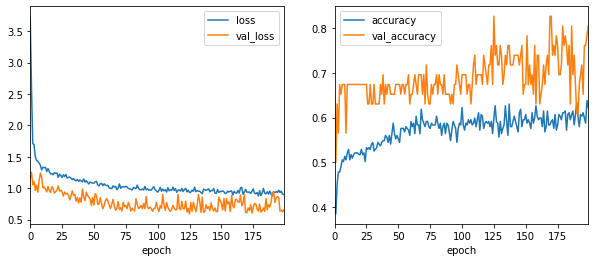

In [211]:
ig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_df.plot(x='epoch', y=['loss', 'val_loss'], ax=ax[0])
history_df.plot(x='epoch', y=['accuracy', 'val_accuracy'], ax=ax[1])

In [212]:
nn.evaluate(x=x_test, y=y_test,)

46/46 [==============================] - 0s 61us/step


[0.6548410291257112, 0.804347813129425]

The above evaluation method returns the loss and the accuracy of the test. As we can see, it is giving a loss of 0.6548 and accuracy of 80% which is consistent with the results from the training above since the validation set is the test set itself. The model history plot is interesting since the validation set is doing better than the training set which means our model is generalizing well. However, the best validation accuracy achieved is at 0.826 while the training accuracy was at best 0.658 which can be seen clearly from the graph above where the validation accuracy (orange) is always doing better than the training accuracy (blue). 

The following parameters were used to get the result: 
* Input layer of 25 input features and nodes.
* Dropout layer of 0.15 
* 2 Hidden layers with (15) nodes
* Output layer with 5 calsses. 

For the training we used the following: 
* Batch size of 5. 
* 200 Epoches

The model gives different result whenever it is re-run. However, the the best performance is around 80% of accuracy as can be seen in the graph. 

<h>

### Tuning

   
Lets try now to do a grid search to select the batch size and epoches to select the best for
our model 

In [213]:
#first import the required Keras wrapper
from keras.wrappers.scikit_learn import KerasClassifier

In [214]:
#use a list of learning rates  in teh grid search
learning_rate = np.arange(0.0001, 0.005,0.00015)
print(learning_rate)

[0.0001  0.00025 0.0004  0.00055 0.0007  0.00085 0.001   0.00115 0.0013
 0.00145 0.0016  0.00175 0.0019  0.00205 0.0022  0.00235 0.0025  0.00265
 0.0028  0.00295 0.0031  0.00325 0.0034  0.00355 0.0037  0.00385 0.004
 0.00415 0.0043  0.00445 0.0046  0.00475 0.0049 ]


In [216]:
# #search batch size from 5 to 15
# batch_size = np.arange(5,15,1)
# #search epochs space from 50 to 200 taking 20 steps at a time so 50, 70, 90, etc. 
# epochs = np.arange(50,200,20)
# #use different learning rates
# # array([0.0001 , 0.00025, 0.0004 , 0.00055, 0.0007 , 0.00085, 0.001  ,
# #        0.00115, 0.0013 , 0.00145, 0.0016 , 0.00175, 0.0019 , 0.00205,
# #        0.0022 , 0.00235, 0.0025 , 0.00265, 0.0028 , 0.00295, 0.0031 ,
# #        0.00325, 0.0034 , 0.00355, 0.0037 , 0.00385, 0.004  , 0.00415,
# #        0.0043 , 0.00445, 0.0046 , 0.00475, 0.0049 ])
# learning_rate = np.arange(0.0001, 0.005, 0.00015)
# #define the classifier
model = KerasClassifier(build_fn=create_model, verbose=0)
# #difine the parameters grid to search within
# param_grid = dict(batch_size=batch_size, epochs=epochs, learn_rate=learning_rate)
# #define the gridsearch with cross validation
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# #fit the grid search to the training data with cross validation. 
# grid_result = grid.fit(x_train, y_train)

The above code took long time to run on I9 processor. Therefore, it is better to be saved in a file and loaded. Below code saves the file and restore it in another variable to make the code more friendly when rerun on different station. 

In [217]:
#check the grid
print(grid)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fc441411ad0>,
             iid='warn', n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'solver': ['newton-cg', 'lbfgs', 'sag']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)


In [901]:
#write the grid search result in a file
# grid_file = "nn_grid_results.pkl"
# with open(grid_file, 'wb') as file:
#     pickle.dump(grid_result, file)

In [218]:
#read grid search result from the file into a new variable called grid_result_restored
with open('nn_grid_results.pkl', 'rb') as file:
    grid_result_restored = pickle.load(file)

In [219]:
#print the grid search cross validation results
grid_result_restored.cv_results_

{'mean_fit_time': array([5.18867811, 5.29184604, 5.35185552, ..., 6.39988732, 7.00225679,
        6.10592175]),
 'std_fit_time': array([0.05451391, 0.05118612, 0.02044577, ..., 0.90461527, 0.10255301,
        0.3163213 ]),
 'mean_score_time': array([0.34885597, 0.27685793, 0.22507071, ..., 0.23315732, 0.18924061,
        0.12978673]),
 'std_score_time': array([0.04079286, 0.05894604, 0.03501894, ..., 0.07802996, 0.0350874 ,
        0.00237509]),
 'param_batch_size': masked_array(data=[5, 5, 5, ..., 14, 14, 14],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_epochs': masked_array(data=[50, 50, 50, ..., 190, 190, 190],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_learn_rate': masked_array(data=[0.0001, 0.00025, 0.0004, ..., 0.004600000000000001,
                    0.004750000000000001, 0.004900000000000001],
              mas

In [220]:
#print best found model and other models. 
print("Best: %f using %s" % (grid_result_restored.best_score_, grid_result_restored.best_params_))
means = grid_result_restored.cv_results_['mean_test_score']
stds = grid_result_restored.cv_results_['std_test_score']
params = grid_result_restored.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.599222 using {'batch_size': 9, 'epochs': 110, 'learn_rate': 0.004750000000000001}
0.486381 (0.064042) with: {'batch_size': 5, 'epochs': 50, 'learn_rate': 0.0001}
0.525292 (0.059771) with: {'batch_size': 5, 'epochs': 50, 'learn_rate': 0.00025}
0.498054 (0.071824) with: {'batch_size': 5, 'epochs': 50, 'learn_rate': 0.0004}
0.517510 (0.070398) with: {'batch_size': 5, 'epochs': 50, 'learn_rate': 0.00055}
0.482490 (0.074851) with: {'batch_size': 5, 'epochs': 50, 'learn_rate': 0.0007000000000000001}
0.463035 (0.111930) with: {'batch_size': 5, 'epochs': 50, 'learn_rate': 0.0008500000000000001}
0.509728 (0.022614) with: {'batch_size': 5, 'epochs': 50, 'learn_rate': 0.001}
0.513619 (0.044439) with: {'batch_size': 5, 'epochs': 50, 'learn_rate': 0.0011500000000000002}
0.482490 (0.070217) with: {'batch_size': 5, 'epochs': 50, 'learn_rate': 0.0013000000000000002}
0.536965 (0.069366) with: {'batch_size': 5, 'epochs': 50, 'learn_rate': 0.0014500000000000001}
0.525292 (0.046492) with: {'batch_

0.521401 (0.057067) with: {'batch_size': 11, 'epochs': 70, 'learn_rate': 0.004150000000000001}
0.544747 (0.045544) with: {'batch_size': 11, 'epochs': 70, 'learn_rate': 0.004300000000000001}
0.498054 (0.040466) with: {'batch_size': 11, 'epochs': 70, 'learn_rate': 0.004450000000000001}
0.571984 (0.028366) with: {'batch_size': 11, 'epochs': 70, 'learn_rate': 0.004600000000000001}
0.544747 (0.047112) with: {'batch_size': 11, 'epochs': 70, 'learn_rate': 0.004750000000000001}
0.583658 (0.053690) with: {'batch_size': 11, 'epochs': 70, 'learn_rate': 0.004900000000000001}
0.501946 (0.083748) with: {'batch_size': 11, 'epochs': 90, 'learn_rate': 0.0001}
0.525292 (0.074349) with: {'batch_size': 11, 'epochs': 90, 'learn_rate': 0.00025}
0.529183 (0.059891) with: {'batch_size': 11, 'epochs': 90, 'learn_rate': 0.0004}
0.505837 (0.066366) with: {'batch_size': 11, 'epochs': 90, 'learn_rate': 0.00055}
0.494163 (0.040716) with: {'batch_size': 11, 'epochs': 90, 'learn_rate': 0.0007000000000000001}
0.521401

In [227]:
#display the best parameters
grid_result_restored.best_params_

{'batch_size': 9, 'epochs': 110, 'learn_rate': 0.004750000000000001}

In [221]:
grid_result_restored.best_estimator_.model.evaluate(x=x_test, y=y_test)

46/46 [==============================] - 0s 852us/step


[0.6055830678214198, 0.739130437374115]

From the above, we can see that the grid search did not do as good as our first model above since the accuracy is lower. However, the lose here is lower than the other model. It is important to note that the drope out rate used in the gridsearch was higher (0.3)

To see how well this performed with the training, we can evaluate it with the training set. 

In [243]:
grid_result_restored.best_estimator_.model.evaluate(x=x_train, y=y_train)

257/257 [==============================] - 0s 23us/step


[0.8917191789307947, 0.5875486135482788]

The performance for this model with the training data gives a lose of 0.89 with accuracy of 0.59 which is close to the previously obtained values but the pervious model is performing better. 

### Different Architectures

Let's try to use a different structure but with the same parameters as above with the test data again as the validation set. 

The first arcitecture I propose is to increase the number of nodes within hidden layers of the network so possbily we can include more features in the features space of the NN. We start by creating the model again.

In [252]:
def create_model_1(learn_rate=0.0015):
    # create model
    #the model is sequential
    model = Sequential()
    #add the input layer to the network with input dimention of 19 and use relu as activation function
    model.add(Dense(25, input_dim=25, activation='relu'))
    #add drop out layer to help in generalization
    model.add(Dropout(0.15))
    #add the second layer
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    #add final (output layer) with softmax activation. 
    model.add(Dense(5, activation='softmax'))
    # Compile model
    model.compile(loss=categorical_crossentropy, #loss function (cross-entropy)
                  optimizer=keras.optimizers.RMSprop(learning_rate=learn_rate, rho=0.9), #optimization function can be SGD
                  metrics=['accuracy']) #use the accuracy metrix for evaluation
    return model

nn = create_model_1()


In [253]:
#dispaly a summary about the NN
nn.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 25)                650       
_________________________________________________________________
dropout_15 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_70 (Dense)             (None, 50)                1300      
_________________________________________________________________
dense_71 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_72 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_73 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_74 (Dense)             (None, 5)               

As we can see above there are 9855 trainable parameters compared with less training parameters (1695) before based on the structure of the NN.

In [254]:
initial_weights = nn.get_weights()  # We save initial weights for later use

In [255]:
#this is the training function will use the trianing data to traina and the test data to validate
history = nn.fit(
    x=x_train,
    y=y_train,
    batch_size=5, 
    epochs=200,
    validation_data=(x_test, y_test),
    verbose=2,
)

Train on 257 samples, validate on 46 samples
Epoch 1/200
 - 0s - loss: 4.3811 - accuracy: 0.3191 - val_loss: 1.5936 - val_accuracy: 0.5000
Epoch 2/200
 - 0s - loss: 1.9587 - accuracy: 0.3696 - val_loss: 1.5456 - val_accuracy: 0.6739
Epoch 3/200
 - 0s - loss: 1.6823 - accuracy: 0.4280 - val_loss: 1.1555 - val_accuracy: 0.6739
Epoch 4/200
 - 0s - loss: 1.5228 - accuracy: 0.4475 - val_loss: 1.1106 - val_accuracy: 0.6087
Epoch 5/200
 - 0s - loss: 1.4384 - accuracy: 0.4436 - val_loss: 1.4894 - val_accuracy: 0.2826
Epoch 6/200
 - 0s - loss: 1.4395 - accuracy: 0.4747 - val_loss: 1.0315 - val_accuracy: 0.6739
Epoch 7/200
 - 0s - loss: 1.3664 - accuracy: 0.4786 - val_loss: 1.0436 - val_accuracy: 0.6739
Epoch 8/200
 - 0s - loss: 1.3817 - accuracy: 0.5097 - val_loss: 1.0085 - val_accuracy: 0.6739
Epoch 9/200
 - 0s - loss: 1.3867 - accuracy: 0.5097 - val_loss: 1.2386 - val_accuracy: 0.6739
Epoch 10/200
 - 0s - loss: 1.3453 - accuracy: 0.5136 - val_loss: 1.2321 - val_accuracy: 0.6304
Epoch 11/200
 

Epoch 87/200
 - 0s - loss: 0.9813 - accuracy: 0.6070 - val_loss: 0.7070 - val_accuracy: 0.7174
Epoch 88/200
 - 0s - loss: 0.9455 - accuracy: 0.5759 - val_loss: 0.7720 - val_accuracy: 0.6957
Epoch 89/200
 - 0s - loss: 0.9836 - accuracy: 0.6031 - val_loss: 0.7273 - val_accuracy: 0.6957
Epoch 90/200
 - 0s - loss: 0.9353 - accuracy: 0.6265 - val_loss: 0.8069 - val_accuracy: 0.6522
Epoch 91/200
 - 0s - loss: 0.9676 - accuracy: 0.6226 - val_loss: 0.8205 - val_accuracy: 0.7391
Epoch 92/200
 - 0s - loss: 0.9737 - accuracy: 0.5875 - val_loss: 0.7603 - val_accuracy: 0.6739
Epoch 93/200
 - 0s - loss: 0.9422 - accuracy: 0.6304 - val_loss: 0.7245 - val_accuracy: 0.7174
Epoch 94/200
 - 0s - loss: 0.9556 - accuracy: 0.5992 - val_loss: 0.7496 - val_accuracy: 0.6739
Epoch 95/200
 - 0s - loss: 0.9652 - accuracy: 0.6226 - val_loss: 0.7411 - val_accuracy: 0.7174
Epoch 96/200
 - 0s - loss: 0.9073 - accuracy: 0.6187 - val_loss: 0.8150 - val_accuracy: 0.6739
Epoch 97/200
 - 0s - loss: 0.9363 - accuracy: 0.61

Epoch 173/200
 - 0s - loss: 0.9577 - accuracy: 0.6732 - val_loss: 1.0113 - val_accuracy: 0.6087
Epoch 174/200
 - 0s - loss: 0.8120 - accuracy: 0.6615 - val_loss: 1.2020 - val_accuracy: 0.6739
Epoch 175/200
 - 0s - loss: 0.9389 - accuracy: 0.6342 - val_loss: 1.0535 - val_accuracy: 0.6957
Epoch 176/200
 - 0s - loss: 0.9149 - accuracy: 0.6459 - val_loss: 0.6643 - val_accuracy: 0.7174
Epoch 177/200
 - 0s - loss: 0.8355 - accuracy: 0.6342 - val_loss: 0.6999 - val_accuracy: 0.7391
Epoch 178/200
 - 0s - loss: 0.8924 - accuracy: 0.6498 - val_loss: 0.6628 - val_accuracy: 0.7174
Epoch 179/200
 - 0s - loss: 0.9564 - accuracy: 0.6342 - val_loss: 0.6603 - val_accuracy: 0.7391
Epoch 180/200
 - 0s - loss: 0.8691 - accuracy: 0.6615 - val_loss: 0.8563 - val_accuracy: 0.6957
Epoch 181/200
 - 0s - loss: 0.8615 - accuracy: 0.6498 - val_loss: 0.8543 - val_accuracy: 0.6087
Epoch 182/200
 - 0s - loss: 0.9163 - accuracy: 0.6109 - val_loss: 0.7285 - val_accuracy: 0.7174
Epoch 183/200
 - 0s - loss: 0.8707 - acc

In [257]:
history_df = pd.DataFrame(history.history)
history_df['epoch'] = history.epoch
history_df.head()

val_loss  val_accuracy      loss  accuracy  epoch
0  1.593600      0.500000  4.381101  0.319066      0
1  1.545624      0.673913  1.958745  0.369650      1
2  1.155540      0.673913  1.682294  0.428016      2
3  1.110561      0.608696  1.522765  0.447471      3
4  1.489434      0.282609  1.438400  0.443580      4

In [258]:
history_df.val_accuracy.max()

0.782608687877655

In [259]:
history_df[history_df['val_accuracy'] == history_df.val_accuracy.max()]

val_loss  val_accuracy      loss  accuracy  epoch
104  0.648534      0.782609  0.974589  0.587549    104
199  0.843901      0.782609  0.890110  0.653696    199

In [260]:
history_df[history_df['accuracy'] == history_df.accuracy.max()]

val_loss  val_accuracy      loss  accuracy  epoch
172  1.011318      0.608696  0.957734  0.673152    172

In [261]:
history_df.accuracy.max()

0.6731517314910889

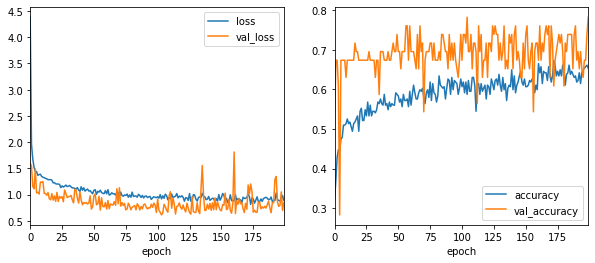

In [262]:
ig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_df.plot(x='epoch', y=['loss', 'val_loss'], ax=ax[0])
history_df.plot(x='epoch', y=['accuracy', 'val_accuracy'], ax=ax[1])

In [263]:
nn.evaluate(x=x_test, y=y_test,)

46/46 [==============================] - 0s 42us/step


[0.8439009526501531, 0.782608687877655]

From the above, we can see that the evaluation result of this NN is lower than the previous one. However, the best achieved best validation accuracy is lower than the one achived at the first model which gave 82% compared to 78% here. However, this one is giving higher accuracy for the training data at 67% compared with 63% at the first one. 

<hr>


Let's try again with different arcitecture to see if we can achieve better results. Now I will creet deeper network with consistance number of neurons in each hidden layer. 


In [266]:
def create_model_2(learn_rate=0.0015):
    # create model
    #the model is sequential
    model = Sequential()
    #add the input layer to the network with input dimention of 19 and use relu as activation function
    model.add(Dense(25, input_dim=25, activation='relu'))
    #add drop out layer to help in generalization
    model.add(Dropout(0.15))
    #add the second layer
    model.add(Dense(25, activation='relu'))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(25, activation='relu'))
    #add final (output layer) with softmax activation. 
    model.add(Dense(5, activation='softmax'))
    # Compile model
    model.compile(loss=categorical_crossentropy, #loss function (cross-entropy)
                  optimizer=keras.optimizers.RMSprop(learning_rate=learn_rate, rho=0.9), #optimization function can be SGD
                  metrics=['accuracy']) #use the accuracy metrix for evaluation
    return model

nn = create_model_2()


In [267]:
#dispaly a summary about the NN
nn.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 25)                650       
_________________________________________________________________
dropout_17 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_86 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_87 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_88 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_89 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_90 (Dense)             (None, 25)              

As we can see above there are 5980 trainable parameters compared with less training parameters (1695) before based on the structure of the NN.

In [268]:
initial_weights = nn.get_weights()  # We save initial weights for later use

In [269]:
#this is the training function will use the trianing data to traina and the test data to validate
history = nn.fit(
    x=x_train,
    y=y_train,
    batch_size=5, 
    epochs=200,
    validation_data=(x_test, y_test),
    verbose=2,
)

Train on 257 samples, validate on 46 samples
Epoch 1/200
 - 0s - loss: 1.6483 - accuracy: 0.4553 - val_loss: 1.0464 - val_accuracy: 0.6739
Epoch 2/200
 - 0s - loss: 1.3834 - accuracy: 0.5175 - val_loss: 1.0316 - val_accuracy: 0.6739
Epoch 3/200
 - 0s - loss: 1.3919 - accuracy: 0.5058 - val_loss: 1.0180 - val_accuracy: 0.6739
Epoch 4/200
 - 0s - loss: 1.3586 - accuracy: 0.5019 - val_loss: 1.1261 - val_accuracy: 0.6739
Epoch 5/200
 - 0s - loss: 1.3093 - accuracy: 0.5136 - val_loss: 1.3134 - val_accuracy: 0.5000
Epoch 6/200
 - 0s - loss: 1.2927 - accuracy: 0.5136 - val_loss: 0.9377 - val_accuracy: 0.6739
Epoch 7/200
 - 0s - loss: 1.3030 - accuracy: 0.5058 - val_loss: 0.9826 - val_accuracy: 0.6739
Epoch 8/200
 - 0s - loss: 1.3030 - accuracy: 0.5175 - val_loss: 1.0985 - val_accuracy: 0.6739
Epoch 9/200
 - 0s - loss: 1.2719 - accuracy: 0.5175 - val_loss: 1.2843 - val_accuracy: 0.6739
Epoch 10/200
 - 0s - loss: 1.3042 - accuracy: 0.5097 - val_loss: 1.0662 - val_accuracy: 0.6739
Epoch 11/200
 

Epoch 87/200
 - 0s - loss: 0.9289 - accuracy: 0.5953 - val_loss: 0.6679 - val_accuracy: 0.7174
Epoch 88/200
 - 0s - loss: 0.9770 - accuracy: 0.5992 - val_loss: 0.9574 - val_accuracy: 0.6304
Epoch 89/200
 - 0s - loss: 0.9138 - accuracy: 0.5837 - val_loss: 0.7202 - val_accuracy: 0.7174
Epoch 90/200
 - 0s - loss: 0.9534 - accuracy: 0.6031 - val_loss: 0.8165 - val_accuracy: 0.6522
Epoch 91/200
 - 0s - loss: 0.9372 - accuracy: 0.5953 - val_loss: 0.9532 - val_accuracy: 0.6304
Epoch 92/200
 - 0s - loss: 0.9026 - accuracy: 0.6148 - val_loss: 0.7971 - val_accuracy: 0.6739
Epoch 93/200
 - 0s - loss: 0.9613 - accuracy: 0.5992 - val_loss: 0.6773 - val_accuracy: 0.7174
Epoch 94/200
 - 0s - loss: 0.9232 - accuracy: 0.6109 - val_loss: 0.7853 - val_accuracy: 0.6957
Epoch 95/200
 - 0s - loss: 0.9311 - accuracy: 0.6109 - val_loss: 0.7836 - val_accuracy: 0.7174
Epoch 96/200
 - 0s - loss: 0.8996 - accuracy: 0.6226 - val_loss: 0.7610 - val_accuracy: 0.6739
Epoch 97/200
 - 0s - loss: 0.9608 - accuracy: 0.61

Epoch 173/200
 - 0s - loss: 0.8801 - accuracy: 0.6109 - val_loss: 0.7737 - val_accuracy: 0.7174
Epoch 174/200
 - 0s - loss: 0.9262 - accuracy: 0.6148 - val_loss: 0.8724 - val_accuracy: 0.6957
Epoch 175/200
 - 0s - loss: 0.9079 - accuracy: 0.5992 - val_loss: 0.7730 - val_accuracy: 0.7391
Epoch 176/200
 - 0s - loss: 0.8715 - accuracy: 0.5914 - val_loss: 0.6812 - val_accuracy: 0.6957
Epoch 177/200
 - 0s - loss: 0.9957 - accuracy: 0.6342 - val_loss: 0.6862 - val_accuracy: 0.6739
Epoch 178/200
 - 0s - loss: 0.8506 - accuracy: 0.6187 - val_loss: 0.7131 - val_accuracy: 0.7609
Epoch 179/200
 - 0s - loss: 0.9729 - accuracy: 0.5953 - val_loss: 0.6842 - val_accuracy: 0.7826
Epoch 180/200
 - 0s - loss: 0.8797 - accuracy: 0.6226 - val_loss: 0.7531 - val_accuracy: 0.6304
Epoch 181/200
 - 0s - loss: 0.9311 - accuracy: 0.6031 - val_loss: 0.6512 - val_accuracy: 0.7174
Epoch 182/200
 - 0s - loss: 0.9112 - accuracy: 0.5992 - val_loss: 0.6574 - val_accuracy: 0.6739
Epoch 183/200
 - 0s - loss: 0.8968 - acc

In [270]:
history_df = pd.DataFrame(history.history)
history_df['epoch'] = history.epoch
history_df.head()

val_loss  val_accuracy      loss  accuracy  epoch
0  1.046370      0.673913  1.648313  0.455253      0
1  1.031601      0.673913  1.383404  0.517510      1
2  1.017959      0.673913  1.391930  0.505837      2
3  1.126051      0.673913  1.358591  0.501945      3
4  1.313392      0.500000  1.309349  0.513619      4

In [271]:
history_df.val_accuracy.max()

0.804347813129425

In [272]:
history_df[history_df['val_accuracy'] == history_df.val_accuracy.max()]

val_loss  val_accuracy      loss  accuracy  epoch
100  0.637817      0.804348  0.905952  0.610895    100
170  0.763319      0.804348  0.896952  0.610895    170
188  0.735403      0.804348  0.907062  0.599222    188

In [273]:
history_df[history_df['accuracy'] == history_df.accuracy.max()]

val_loss  val_accuracy      loss  accuracy  epoch
148  0.859731       0.73913  0.874716  0.649805    148

In [274]:
history_df.accuracy.max()

0.6498054265975952

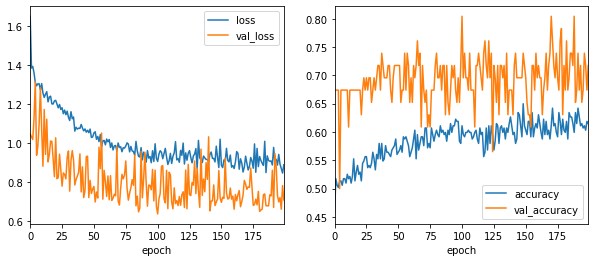

In [275]:
ig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_df.plot(x='epoch', y=['loss', 'val_loss'], ax=ax[0])
history_df.plot(x='epoch', y=['accuracy', 'val_accuracy'], ax=ax[1])

In [276]:
nn.evaluate(x=x_test, y=y_test,)

46/46 [==============================] - 0s 45us/step


[0.7090331212334011, 0.717391312122345]

From the above, we can see the performance of this architecture is near the previous ones but lower since it achieved validation accuracy of 71% as it reached 200 epoches. However, for the training accuracy it is performing better than the first archecticture but not better than the other deep arcticture which achieved 68% training accuracy. 

Above, we have seen 3 different archietectures with a trial to exploit the first architecture using grid search. So far the first model which was tuned manually seems to be pefroming the best among all achieving 80% accuracy on the validation set. However, the second architecture that is manually defined (not grid search) showed the best accuracy on training data. These accuracies might be due to the unstable initialization since some of these architecture produce different results whenever they are re-run. Also, we have shortage of data for training which might degrade the trainability of the models but still the models are generalizing well with the validation set. All models seem to share the fact that the lose on the validation is lower than the lose on the training and the validation accuracy is exceeding the training accuracy. 

### Classification Conculsion

Above we tried to classify the pacients into the targeted 5 classes for heart disease using logistic regrission, random forest classifier, and neural network. We have tried different settings for the models with transformation and resampling with the first model which is logistic regression. The best performing model is NN with the different architectures (all NN architectures performed better) then followed by random forests and finally the logistic regression. 

<hr>


<hr>

## Unsupervised Learning Task

The unspervised learning problem at hand is to reduce the data to the representitive principle components. We will do this using 2 different methods: 
1. PCA
2. Autoencoders

### Dimentional Reduction Using PCA

First, lets import the required models

In [277]:
#import PCA from sklearn decomposition
from sklearn.decomposition import PCA

We know that the data include the one-hot encoding and the original columns. Therefore, remove the dumplicates before using PCA.

In [278]:
#remove duplicates from the data first 
data_no_duplicates = data.drop(['sex', 'cp', 'fbs','restecg', 'exang', 'slope', 'thal'], axis=1)

Now, we need to declare the PCA and fit it to our data in order to get the PCAs (eigenvectors with eigenvalues). 

In [279]:
#define the required PCA with the number of components to keep. 
pca = PCA()
#fit the pca with the training data
pca.fit(data_no_duplicates)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Let's now plot the PCA explained variance to notice when the variance drops i.e. to see where the elbow is. 

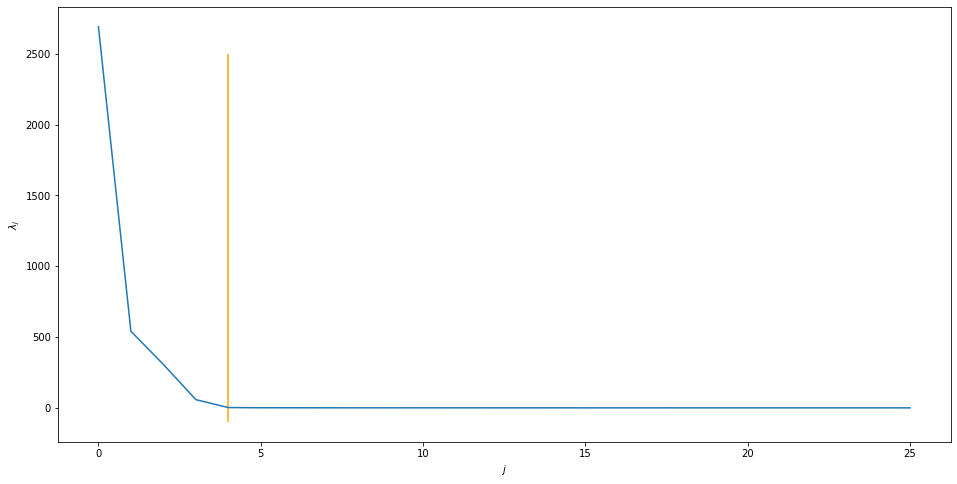

In [280]:
#plot the variance of the PCAs to see the drop in variance differen
plt.plot(pca.explained_variance_)
#x is the index of the principle component (PC) 
plt.xlabel(r'$j$')
#y is the PC's amount of explained variance
plt.ylabel(r'$\lambda_j$')
#plot a vertical line at x=4 where the elbow of the explained variance shows
plt.vlines(x=4, ymin=-100, ymax=2500, color='orange')

Also, we can plot using semilogy to notice the difference and the drop in values more clearly.

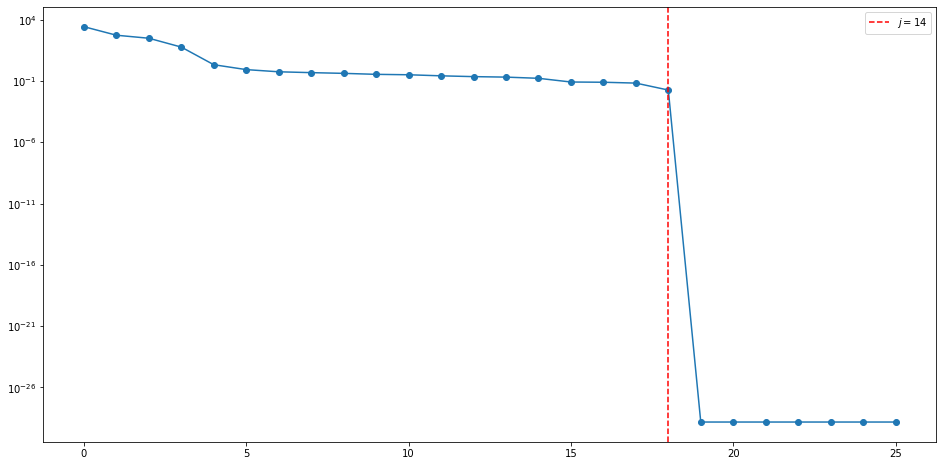

In [281]:
#plot the amlount of variance explained by each principle component but using semilogy
#semilogy uses log scaling on the y-axis.
plt.semilogy(pca.explained_variance_, '-o')
plt.axvline(x=18, c='r', ls='--', label=r'$j=14$')
plt.legend()

From the above explained variance plot using log scaling on the Y-axis, we can see that the highest drop in ratio is after the 18<sup>th</sup> component. However, the first component is the most dominant component as we can see in both plots. 

Below, we plot each PCA against the available columns to check what is dominating. 

Text(0.5, 1.0, 'Fifth Principal Component Axis')

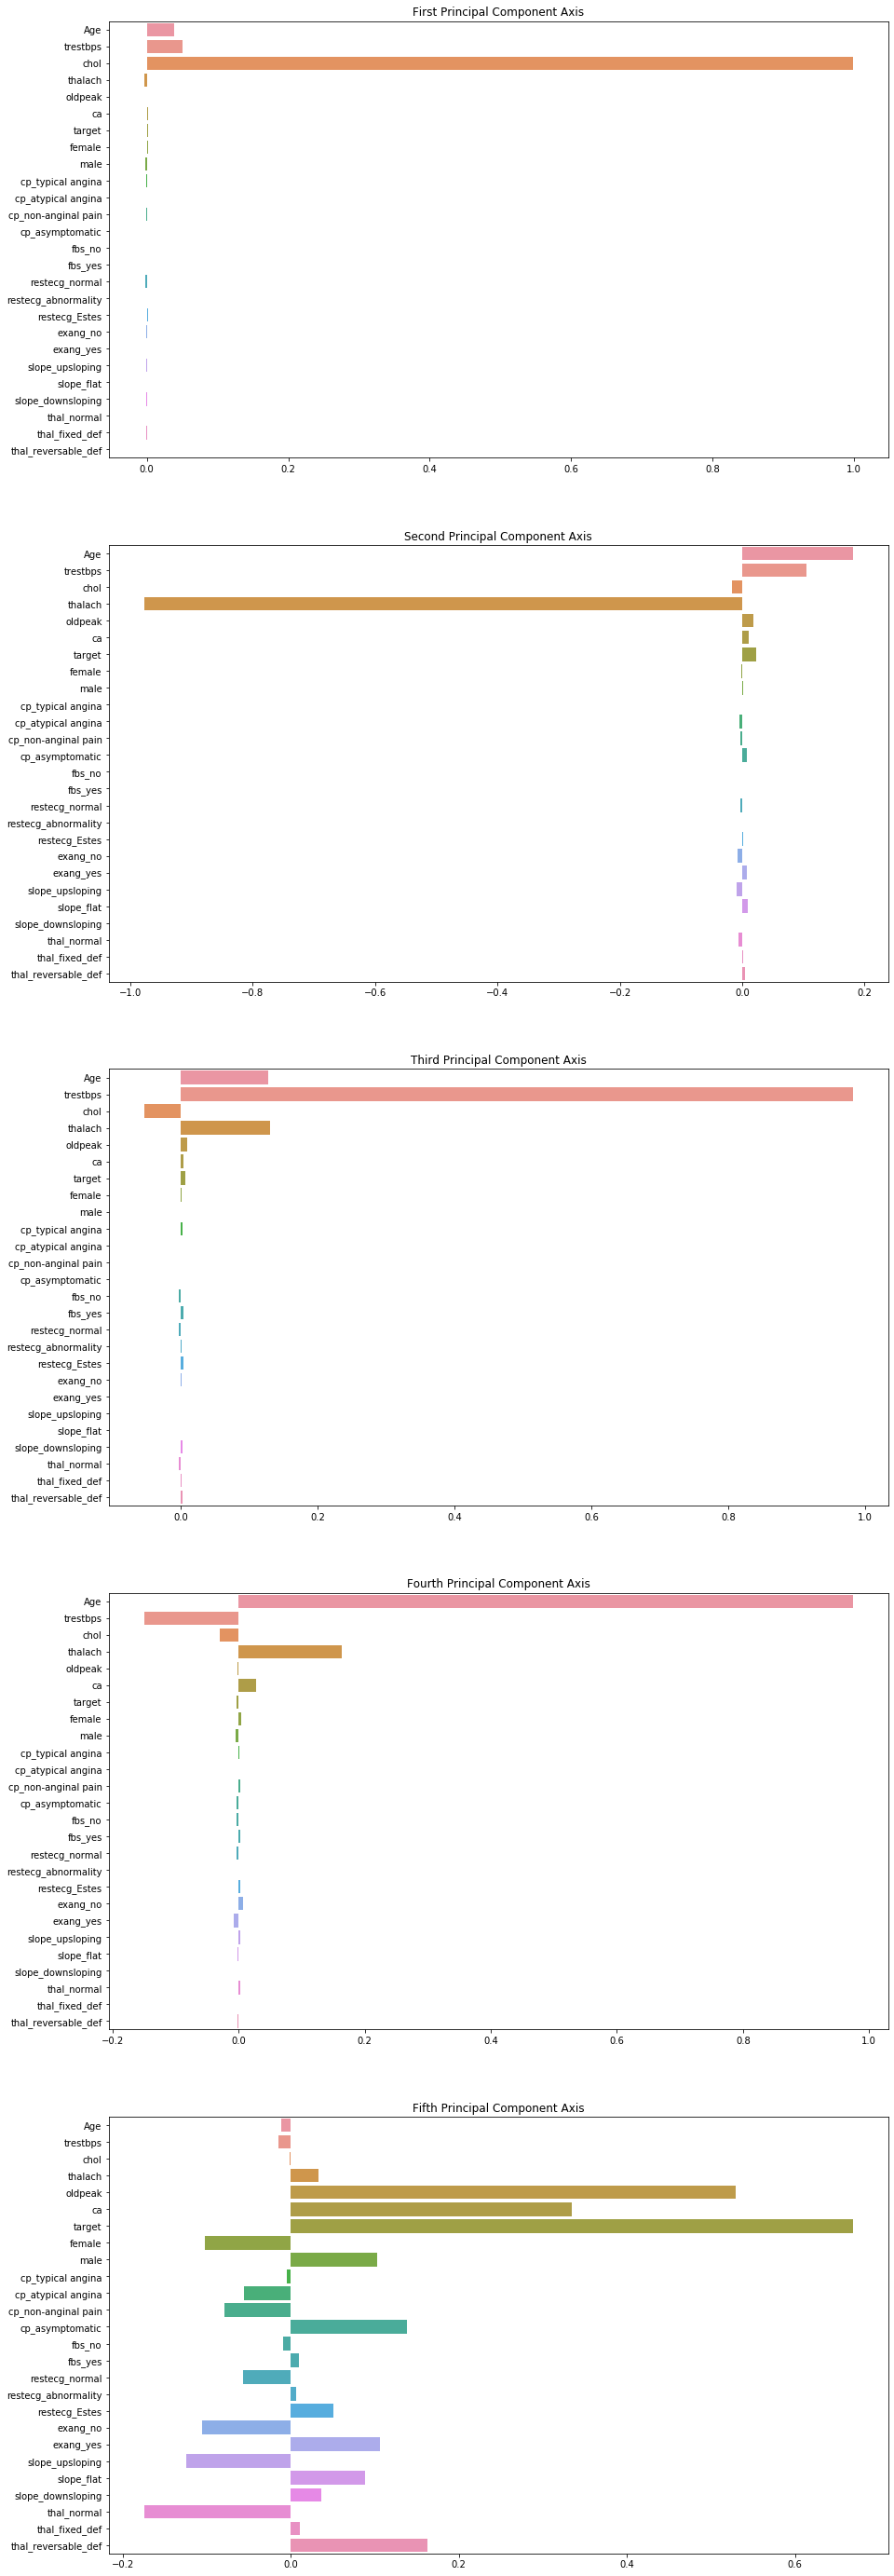

In [282]:
fig, ax = plt.subplots(5, 1, figsize=(15, 50))
sns.barplot(x=pca.components_[0], y=data_no_duplicates.columns, orient='h', ax=ax[0])
sns.barplot(x=pca.components_[1], y=data_no_duplicates.columns, orient='h', ax=ax[1])
sns.barplot(x=pca.components_[2], y=data_no_duplicates.columns, orient='h', ax=ax[2])
sns.barplot(x=pca.components_[3], y=data_no_duplicates.columns, orient='h', ax=ax[3])
sns.barplot(x=pca.components_[4], y=data_no_duplicates.columns, orient='h', ax=ax[4])

ax[0].set_title('First Principal Component Axis')
ax[1].set_title('Second Principal Component Axis')
ax[2].set_title('Third Principal Component Axis')
ax[3].set_title('Fourth Principal Component Axis')
ax[4].set_title('Fifth Principal Component Axis')

In [290]:
data_no_duplicates.describe()

Age    trestbps        chol     thalach     oldpeak          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944  131.689769  246.693069  149.607261    1.039604    0.676568   
std      9.038662   17.599748   51.776918   22.875003    1.161075    0.931963   
min     29.000000   94.000000  126.000000   71.000000    0.000000    0.000000   
25%     48.000000  120.000000  211.000000  133.500000    0.000000    0.000000   
50%     56.000000  130.000000  241.000000  153.000000    0.800000    0.000000   
75%     61.000000  140.000000  275.000000  166.000000    1.600000    1.000000   
max     77.000000  200.000000  564.000000  202.000000    6.200000    3.000000   

           target      female        male  cp_typical angina  ...  \
count  303.000000  303.000000  303.000000         303.000000  ...   
mean     0.937294    0.320132    0.679868           0.075908  ...   
std      1.228536    0.467299    0.467299           0.265288  ...   
min      0.000000    0.000000    0.000000           0.000000  ...   
25%      0.000000    0.000000    0.000000           0.000000  ...   
50%      0.000000    0.000000    1.000000           0.000000  ...   
75%      2.000000    1.000000    1.000000           0.000000  ...   
max      4.000000    1.000000    1.000000           1.000000  ...   

       restecg_abnormality  restecg_Estes    exang_no   exang_yes  \
count           303.000000     303.000000  303.000000  303.000000   
mean              0.013201       0.488449    0.673267    0.326733   
std               0.114325       0.500693    0.469794    0.469794   
min               0.000000       0.000000    0.000000    0.000000   
25%               0.000000       0.000000    0.000000    0.000000   
50%               0.000000       0.000000    1.000000    0.000000   
75%               0.000000       1.000000    1.000000    1.000000   
max               1.000000       1.000000    1.000000    1.000000   

       slope_upsloping  slope_flat  slope_downsloping  thal_normal  \
count       303.000000  303.000000         303.000000   303.000000   
mean          0.468647    0.462046           0.069307     0.554455   
std           0.499842    0.499382           0.254395     0.497848   
min           0.000000    0.000000           0.000000     0.000000   
25%           0.000000    0.000000           0.000000     0.000000   
50%           0.000000    0.000000           0.000000     1.000000   
75%           1.000000    1.000000           0.000000     1.000000   
max           1.000000    1.000000           1.000000     1.000000   

       thal_fixed_def  thal_reversable_def  
count      303.000000           303.000000  
mean         0.059406             0.386139  
std          0.236774             0.487668  
min          0.000000             0.000000  
25%          0.000000             0.000000  
50%          0.000000             0.000000  
75%          0.000000             1.000000  
max          1.000000             1.000000  

[8 rows x 26 columns]

From the above plots of PCAs, it appeared that the data is dominated by the those values which are greater than the other values such: 
* Age with mean of 54
* trestbps with mean of 131
* chol with mean of 246
* thalach with mean of 149

Thereofere, it would be better to perform some kind of transformation/normalization as done before in order to see the relationships more clearly. 

In [291]:
#perform normalization on the data using the minimum maximum normalization method
data_normalized = (data_no_duplicates - data_no_duplicates.min())/(data_no_duplicates.max() - data_no_duplicates.min())

After normalizing the data, let's refit the PCA model using the normalized dataset.

In [292]:
pca.fit(data_normalized)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

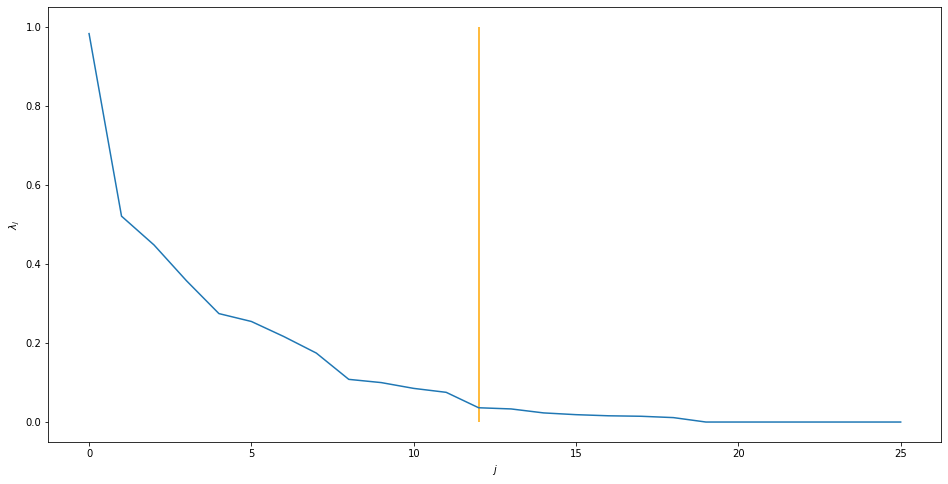

In [293]:
#plot the explained variance again 
plt.plot(pca.explained_variance_)
plt.xlabel(r'$j$')
plt.ylabel(r'$\lambda_j$')
#plot elbow at x=12
plt.vlines(x=12, ymin=0, ymax=1, color='orange') #possible elbow location

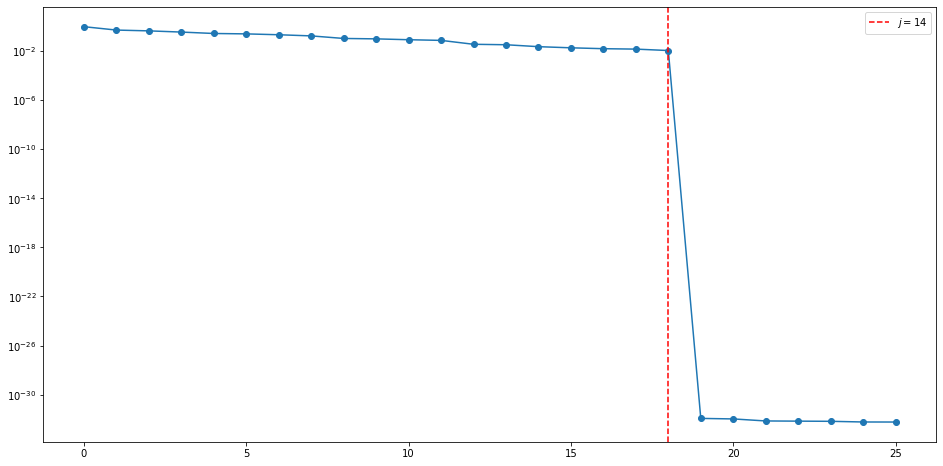

In [294]:
#plot again with log scale
plt.semilogy(pca.explained_variance_, '-o')
plt.axvline(x=18, c='r', ls='--', label=r'$j=14$')
plt.legend()

Again, even after transformation the variance drops significantly after the 18th princible as seen above in both plots.  

Let's plot the first five PC against the columns to see the contributing variables now after the normalization of the data. 

Text(0.5, 1.0, 'Fifth Principal Component Axis')

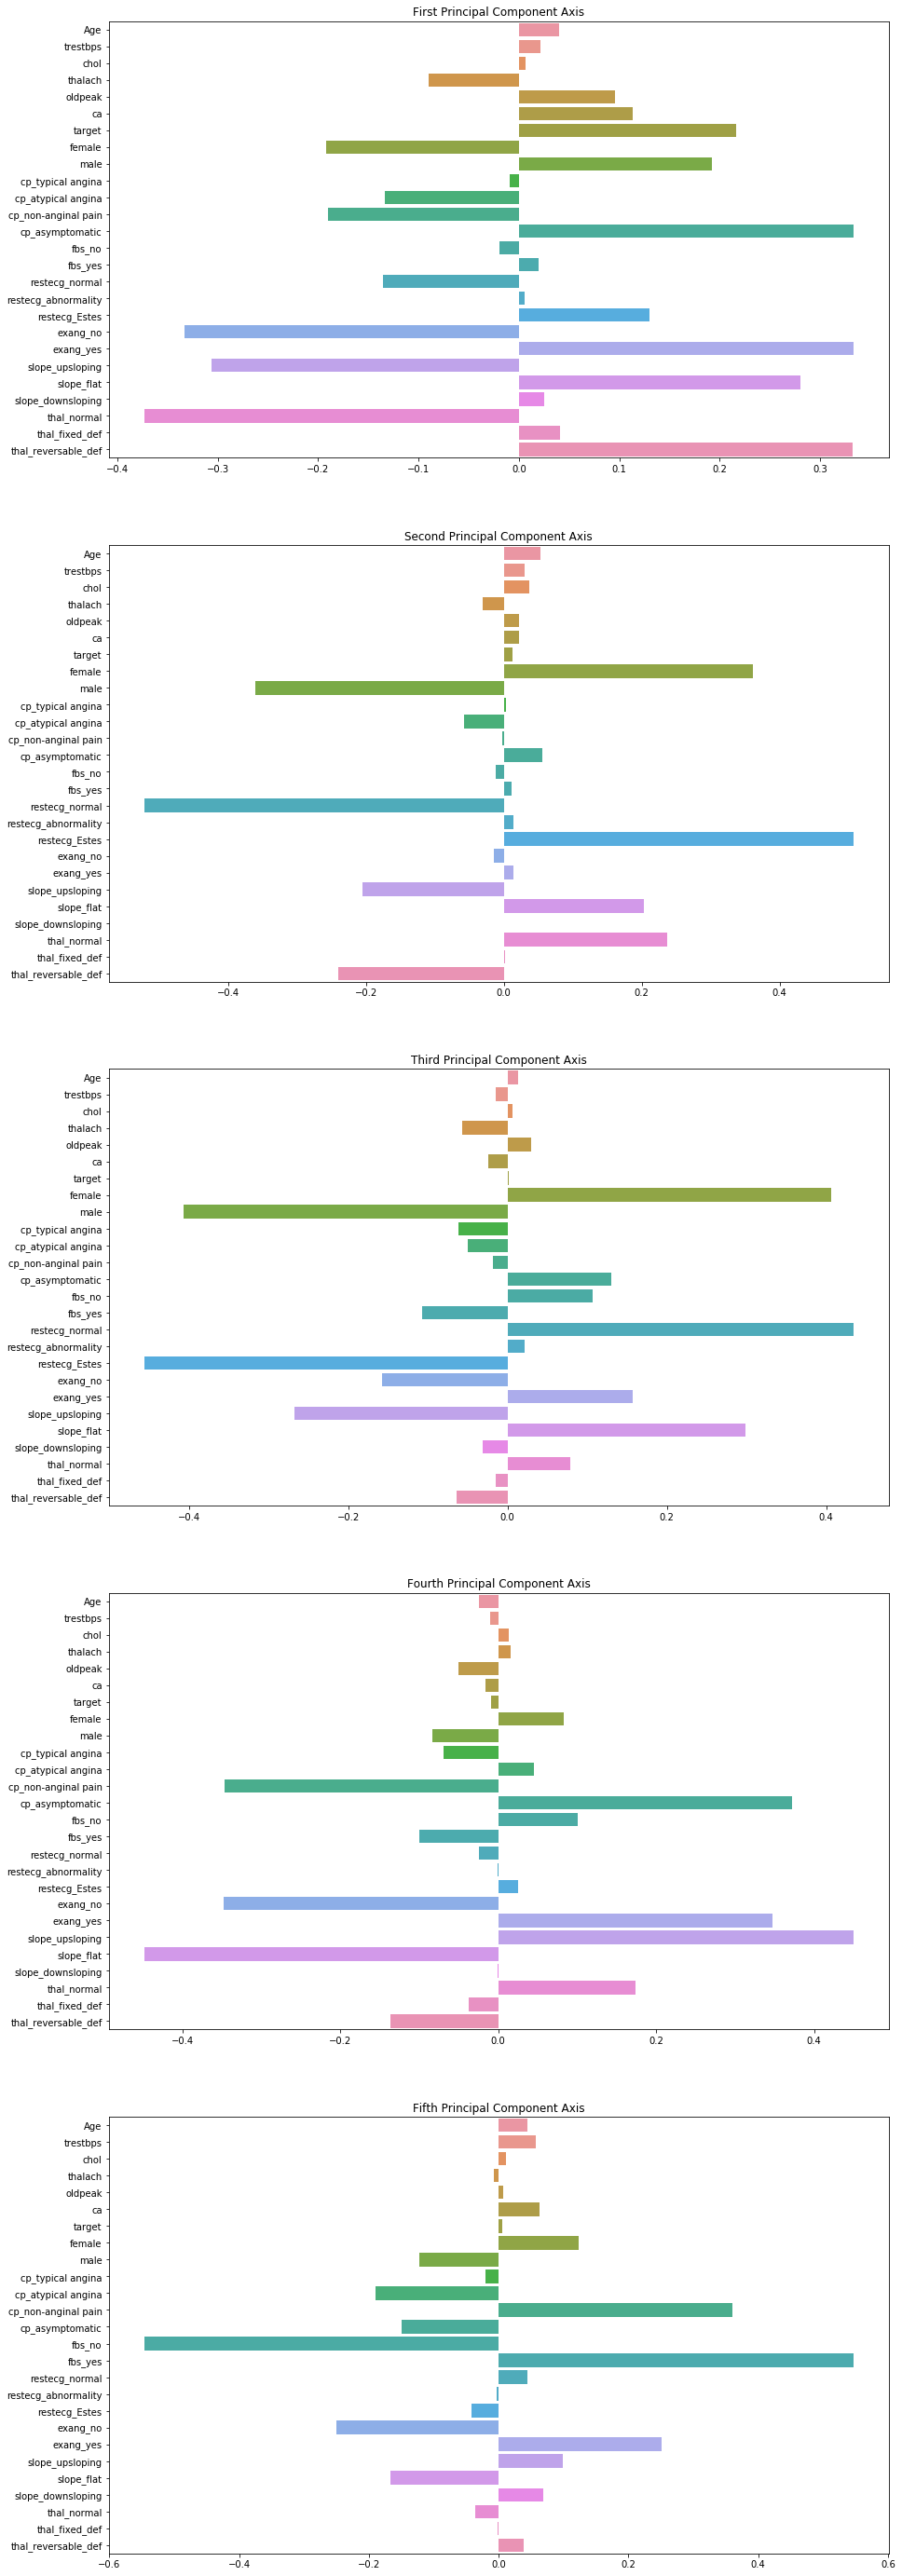

In [295]:
fig, ax = plt.subplots(5, 1, figsize=(15, 50))
sns.barplot(x=pca.components_[0], y=data_normalized.columns, orient='h', ax=ax[0])
sns.barplot(x=pca.components_[1], y=data_normalized.columns, orient='h', ax=ax[1])
sns.barplot(x=pca.components_[2], y=data_normalized.columns, orient='h', ax=ax[2])
sns.barplot(x=pca.components_[3], y=data_normalized.columns, orient='h', ax=ax[3])
sns.barplot(x=pca.components_[4], y=data_normalized.columns, orient='h', ax=ax[4])

ax[0].set_title('First Principal Component Axis')
ax[1].set_title('Second Principal Component Axis')
ax[2].set_title('Third Principal Component Axis')
ax[3].set_title('Fourth Principal Component Axis')
ax[4].set_title('Fifth Principal Component Axis')

Each plot above is considering a PC starting by first up to the fifth princible component of the data. Each plot highlight the importance of each feature in representing the data. Below we discuss insights derived from the plots regarding the feature contribution. 

The first plot gives an important insight about what features are less significant in describing the data. Age, trestbps, chol, and thalach are not as significantly contributing in the first PCA as they were before the normalization of the data. Also, typical anagina is not contributing as the other types of chest pain. Furthermore, restecg abnormality is the least contributing among restecg categories. Also, downsloping is the lest contributing category among slope categories. Finally, thal fixed deformation is the least contributor for thal cateogries. 

For the second plot we see that restecg, followed by gender, slope and thal are dominating the features. 

For the third plot, it is interesting to see the cp_typical angina is the highest contributor among cp categories. Also, exang is being significant here. 

For the fourth plot, interestingly, exang is gaining more importance and slope is the dominating feature. 

For the fifth plot, it is dominated by fbs which was margenally contributing in the earlier plots. 



In conclusion, after normalizing the data it can be repersented significantly using 12 to 18 PCs and normalizing lead to reducing the significance of the dominant variables before normalization. Also, we have seen good insights from analyzing first five PCs in realtion with our features space. To minimize the loss to the minimum (0) 18 PC must be used. Using less components will contribute in some loss. However, allowing for such loss or not depending on the application and what the reduced dimention data will be used and weather that loss will affect the application to an acceptable level or not. 

<hr>

### Dimintional Reduction Using Autoencoders

Now we will use autoencoders to perform the dimentional reduction:

Let's try with the data that is not normalized and measure the lose and then we normalize the data and apply it to see if there is any improvement over the lose. 

Before we fit the model, we need to split the data into training and validation sets in order to get the best fitted autoencoder. However, here we do not have target variable since our target is the data itself. 

In [309]:
#now split the data into training and vaidation including the target. 
x_train, x_val= train_test_split(data_no_duplicates,test_size=0.15, 
                                                    random_state=41)

Now, set the encoding dimention i.e. the dimention to reduce the data to. Our data has 26 dimentions currently (including the target), let's reduce it to 12 dimention and notice the loss. 

In [310]:
encoding_dim = 12 #more than 50% reduction in dimention. 

In [311]:
#define the input dataframe (has 26 dimentions)
input_df = Input(shape=(26,))
#define the encoding dense using activation relu and has the input dataframe as an input. 
encoded = Dense(encoding_dim, activation='relu')(input_df)
#define the deconding dense using activation signomid and has the encoded dense as its input
decoded = Dense(26, activation='sigmoid')(encoded)

# define the autoencoder model.
autoencoder = Model(input_df, decoded)

# intermediate result
encoder = Model(input_df, encoded)

#compile the autoencoder
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

In [312]:
#now fit the autoencoder of training data as its input and target.
autoencoder.fit(x_train, x_train,
                epochs=300,
                batch_size=20,
                shuffle=True,
                validation_data=(x_val, x_val))

Train on 257 samples, validate on 46 samples
Epoch 1/300
257/257 [==============================] - 0s 336us/step - loss: 4146.6580 - val_loss: 3867.7173
Epoch 2/300
257/257 [==============================] - 0s 54us/step - loss: 4144.4986 - val_loss: 3867.4409
Epoch 3/300
257/257 [==============================] - 0s 54us/step - loss: 4144.3985 - val_loss: 3867.4299
Epoch 4/300
257/257 [==============================] - 0s 51us/step - loss: 4144.3141 - val_loss: 3867.3957
Epoch 5/300
257/257 [==============================] - 0s 56us/step - loss: 4144.2504 - val_loss: 3867.3498
Epoch 6/300
257/257 [==============================] - 0s 61us/step - loss: 4144.2421 - val_loss: 3867.2996
Epoch 7/300
257/257 [==============================] - 0s 58us/step - loss: 4144.2389 - val_loss: 3867.2388
Epoch 8/300
257/257 [==============================] - 0s 57us/step - loss: 4144.2367 - val_loss: 3867.1923
Epoch 9/300
257/257 [==============================] - 0s 56us/step - loss: 4144.2357 - va

Epoch 76/300
257/257 [==============================] - 0s 58us/step - loss: 4144.0798 - val_loss: 3866.8789
Epoch 77/300
257/257 [==============================] - 0s 54us/step - loss: 4144.0802 - val_loss: 3866.8773
Epoch 78/300
257/257 [==============================] - 0s 57us/step - loss: 4144.0799 - val_loss: 3866.8843
Epoch 79/300
257/257 [==============================] - 0s 56us/step - loss: 4144.0791 - val_loss: 3866.8808
Epoch 80/300
257/257 [==============================] - 0s 56us/step - loss: 4144.0775 - val_loss: 3866.8786
Epoch 81/300
257/257 [==============================] - 0s 55us/step - loss: 4144.0808 - val_loss: 3866.8825
Epoch 82/300
257/257 [==============================] - 0s 57us/step - loss: 4144.0783 - val_loss: 3866.8784
Epoch 83/300
257/257 [==============================] - 0s 57us/step - loss: 4144.0779 - val_loss: 3866.8800
Epoch 84/300
257/257 [==============================] - 0s 55us/step - loss: 4144.0793 - val_loss: 3866.8865
Epoch 85/300
257/25

257/257 [==============================] - 0s 55us/step - loss: 4144.0679 - val_loss: 3866.8718
Epoch 151/300
257/257 [==============================] - 0s 55us/step - loss: 4144.0683 - val_loss: 3866.8741
Epoch 152/300
257/257 [==============================] - 0s 57us/step - loss: 4144.0699 - val_loss: 3866.8712
Epoch 153/300
257/257 [==============================] - 0s 54us/step - loss: 4144.0687 - val_loss: 3866.8726
Epoch 154/300
257/257 [==============================] - 0s 56us/step - loss: 4144.0688 - val_loss: 3866.8753
Epoch 155/300
257/257 [==============================] - 0s 57us/step - loss: 4144.0676 - val_loss: 3866.8715
Epoch 156/300
257/257 [==============================] - 0s 56us/step - loss: 4144.0676 - val_loss: 3866.8730
Epoch 157/300
257/257 [==============================] - 0s 56us/step - loss: 4144.0683 - val_loss: 3866.8710
Epoch 158/300
257/257 [==============================] - 0s 53us/step - loss: 4144.0689 - val_loss: 3866.8733
Epoch 159/300
257/257 [=

257/257 [==============================] - 0s 62us/step - loss: 4144.0219 - val_loss: 3866.8415
Epoch 225/300
257/257 [==============================] - 0s 58us/step - loss: 4144.0173 - val_loss: 3866.8319
Epoch 226/300
257/257 [==============================] - 0s 53us/step - loss: 4144.0160 - val_loss: 3866.8383
Epoch 227/300
257/257 [==============================] - 0s 54us/step - loss: 4144.0154 - val_loss: 3866.8281
Epoch 228/300
257/257 [==============================] - 0s 55us/step - loss: 4144.0100 - val_loss: 3866.8327
Epoch 229/300
257/257 [==============================] - 0s 58us/step - loss: 4144.0105 - val_loss: 3866.8264
Epoch 230/300
257/257 [==============================] - 0s 59us/step - loss: 4144.0093 - val_loss: 3866.8212
Epoch 231/300
257/257 [==============================] - 0s 58us/step - loss: 4144.0085 - val_loss: 3866.8301
Epoch 232/300
257/257 [==============================] - 0s 60us/step - loss: 4144.0083 - val_loss: 3866.8219
Epoch 233/300
257/257 [=

257/257 [==============================] - 0s 53us/step - loss: 4143.9957 - val_loss: 3866.8112
Epoch 299/300
257/257 [==============================] - 0s 53us/step - loss: 4143.9959 - val_loss: 3866.8136
Epoch 300/300
257/257 [==============================] - 0s 54us/step - loss: 4143.9954 - val_loss: 3866.8106


As we can see above, the lose is significant for both training and validation datasets. This might be the case since the data is not normalized. Therefore, we should normalize the data and try again to test this hypothesis.

Let's use the normalized data from before in the to perform exactly same split as before.

In [315]:
#now split the data into training and vaidation including the target. 
x_train, x_val= train_test_split(data_normalized,test_size=0.15, 
                                                    random_state=41)

Now let's fit the model to the normalized data and check the lose. 

In [316]:
#define the input dataframe (has 26 dimentions)
input_df = Input(shape=(26,))
#define the encoding dense using activation relu and has the input dataframe as an input. 
encoded = Dense(encoding_dim, activation='relu')(input_df)
#define the deconding dense using activation signomid and has the encoded dense as its input
decoded = Dense(26, activation='sigmoid')(encoded)

# define the autoencoder model.
autoencoder = Model(input_df, decoded)

# intermediate result
encoder = Model(input_df, encoded)

#compile the autoencoder
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

In [317]:
#now fit the autoencoder of training data as its input and target.
autoencoder.fit(x_train, x_train,
                epochs=300,
                batch_size=20,
                shuffle=True,
                validation_data=(x_val, x_val))

Train on 257 samples, validate on 46 samples
Epoch 1/300
257/257 [==============================] - 0s 323us/step - loss: 0.2073 - val_loss: 0.2042
Epoch 2/300
257/257 [==============================] - 0s 50us/step - loss: 0.1965 - val_loss: 0.1942
Epoch 3/300
257/257 [==============================] - 0s 50us/step - loss: 0.1860 - val_loss: 0.1836
Epoch 4/300
257/257 [==============================] - 0s 53us/step - loss: 0.1749 - val_loss: 0.1721
Epoch 5/300
257/257 [==============================] - 0s 65us/step - loss: 0.1629 - val_loss: 0.1609
Epoch 6/300
257/257 [==============================] - 0s 61us/step - loss: 0.1512 - val_loss: 0.1510
Epoch 7/300
257/257 [==============================] - 0s 58us/step - loss: 0.1414 - val_loss: 0.1435
Epoch 8/300
257/257 [==============================] - 0s 55us/step - loss: 0.1339 - val_loss: 0.1381
Epoch 9/300
257/257 [==============================] - 0s 52us/step - loss: 0.1282 - val_loss: 0.1341
Epoch 10/300
257/257 [==============

257/257 [==============================] - 0s 56us/step - loss: 0.0305 - val_loss: 0.0428
Epoch 81/300
257/257 [==============================] - 0s 58us/step - loss: 0.0301 - val_loss: 0.0424
Epoch 82/300
257/257 [==============================] - 0s 57us/step - loss: 0.0296 - val_loss: 0.0420
Epoch 83/300
257/257 [==============================] - 0s 56us/step - loss: 0.0293 - val_loss: 0.0415
Epoch 84/300
257/257 [==============================] - 0s 53us/step - loss: 0.0289 - val_loss: 0.0411
Epoch 85/300
257/257 [==============================] - 0s 60us/step - loss: 0.0285 - val_loss: 0.0407
Epoch 86/300
257/257 [==============================] - 0s 62us/step - loss: 0.0282 - val_loss: 0.0404
Epoch 87/300
257/257 [==============================] - 0s 55us/step - loss: 0.0278 - val_loss: 0.0400
Epoch 88/300
257/257 [==============================] - 0s 61us/step - loss: 0.0275 - val_loss: 0.0396
Epoch 89/300
257/257 [==============================] - 0s 65us/step - loss: 0.0272 - 

257/257 [==============================] - 0s 54us/step - loss: 0.0152 - val_loss: 0.0248
Epoch 160/300
257/257 [==============================] - 0s 55us/step - loss: 0.0151 - val_loss: 0.0247
Epoch 161/300
257/257 [==============================] - 0s 54us/step - loss: 0.0150 - val_loss: 0.0246
Epoch 162/300
257/257 [==============================] - 0s 54us/step - loss: 0.0149 - val_loss: 0.0245
Epoch 163/300
257/257 [==============================] - 0s 57us/step - loss: 0.0149 - val_loss: 0.0244
Epoch 164/300
257/257 [==============================] - 0s 53us/step - loss: 0.0148 - val_loss: 0.0243
Epoch 165/300
257/257 [==============================] - 0s 50us/step - loss: 0.0147 - val_loss: 0.0242
Epoch 166/300
257/257 [==============================] - 0s 53us/step - loss: 0.0146 - val_loss: 0.0241
Epoch 167/300
257/257 [==============================] - 0s 54us/step - loss: 0.0145 - val_loss: 0.0241
Epoch 168/300
257/257 [==============================] - 0s 52us/step - loss: 

Epoch 238/300
257/257 [==============================] - 0s 49us/step - loss: 0.0108 - val_loss: 0.0198
Epoch 239/300
257/257 [==============================] - 0s 47us/step - loss: 0.0108 - val_loss: 0.0197
Epoch 240/300
257/257 [==============================] - 0s 52us/step - loss: 0.0108 - val_loss: 0.0197
Epoch 241/300
257/257 [==============================] - 0s 52us/step - loss: 0.0107 - val_loss: 0.0197
Epoch 242/300
257/257 [==============================] - 0s 56us/step - loss: 0.0107 - val_loss: 0.0196
Epoch 243/300
257/257 [==============================] - 0s 55us/step - loss: 0.0107 - val_loss: 0.0196
Epoch 244/300
257/257 [==============================] - 0s 50us/step - loss: 0.0106 - val_loss: 0.0196
Epoch 245/300
257/257 [==============================] - 0s 56us/step - loss: 0.0106 - val_loss: 0.0195
Epoch 246/300
257/257 [==============================] - 0s 57us/step - loss: 0.0105 - val_loss: 0.0195
Epoch 247/300
257/257 [==============================] - 0s 53us

As seen above the lose is 0.0091 for the training nd 0.0177 for the validation set. This is a good reusult. However, let's try to do it again but to reduce the dimention to 15 and see if the lose improve. 

In [320]:
#reset the encoding dimention. 
encoding_dim = 15
#define the input dataframe (has 26 dimentions)
input_df = Input(shape=(26,))
#define the encoding dense using activation relu and has the input dataframe as an input. 
encoded = Dense(encoding_dim, activation='relu')(input_df)
#define the deconding dense using activation signomid and has the encoded dense as its input
decoded = Dense(26, activation='sigmoid')(encoded)

# define the autoencoder model.
autoencoder = Model(input_df, decoded)

# intermediate result
encoder = Model(input_df, encoded)

#compile the autoencoder
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

Let's now test if the reduction using the reudced features data can results in close classification when applying a classification to the reduced (encoded) dataset. 

In [321]:
#now fit the autoencoder of training data as its input and target.
autoencoder.fit(x_train, x_train,
                epochs=300,
                batch_size=20,
                shuffle=True,
                validation_data=(x_val, x_val))

Train on 257 samples, validate on 46 samples
Epoch 1/300
257/257 [==============================] - 0s 435us/step - loss: 0.2020 - val_loss: 0.2029
Epoch 2/300
257/257 [==============================] - 0s 56us/step - loss: 0.1907 - val_loss: 0.1930
Epoch 3/300
257/257 [==============================] - 0s 54us/step - loss: 0.1797 - val_loss: 0.1831
Epoch 4/300
257/257 [==============================] - 0s 53us/step - loss: 0.1687 - val_loss: 0.1733
Epoch 5/300
257/257 [==============================] - 0s 53us/step - loss: 0.1584 - val_loss: 0.1639
Epoch 6/300
257/257 [==============================] - 0s 66us/step - loss: 0.1493 - val_loss: 0.1556
Epoch 7/300
257/257 [==============================] - 0s 57us/step - loss: 0.1416 - val_loss: 0.1488
Epoch 8/300
257/257 [==============================] - 0s 54us/step - loss: 0.1353 - val_loss: 0.1430
Epoch 9/300
257/257 [==============================] - 0s 49us/step - loss: 0.1300 - val_loss: 0.1382
Epoch 10/300
257/257 [==============

257/257 [==============================] - 0s 54us/step - loss: 0.0233 - val_loss: 0.0340
Epoch 81/300
257/257 [==============================] - 0s 53us/step - loss: 0.0230 - val_loss: 0.0337
Epoch 82/300
257/257 [==============================] - 0s 58us/step - loss: 0.0227 - val_loss: 0.0333
Epoch 83/300
257/257 [==============================] - 0s 55us/step - loss: 0.0224 - val_loss: 0.0330
Epoch 84/300
257/257 [==============================] - 0s 58us/step - loss: 0.0221 - val_loss: 0.0327
Epoch 85/300
257/257 [==============================] - 0s 55us/step - loss: 0.0219 - val_loss: 0.0323
Epoch 86/300
257/257 [==============================] - 0s 53us/step - loss: 0.0216 - val_loss: 0.0320
Epoch 87/300
257/257 [==============================] - 0s 53us/step - loss: 0.0213 - val_loss: 0.0317
Epoch 88/300
257/257 [==============================] - 0s 56us/step - loss: 0.0211 - val_loss: 0.0314
Epoch 89/300
257/257 [==============================] - 0s 54us/step - loss: 0.0208 - 

257/257 [==============================] - 0s 52us/step - loss: 0.0121 - val_loss: 0.0205
Epoch 160/300
257/257 [==============================] - 0s 56us/step - loss: 0.0121 - val_loss: 0.0204
Epoch 161/300
257/257 [==============================] - 0s 57us/step - loss: 0.0120 - val_loss: 0.0203
Epoch 162/300
257/257 [==============================] - 0s 53us/step - loss: 0.0119 - val_loss: 0.0202
Epoch 163/300
257/257 [==============================] - 0s 52us/step - loss: 0.0118 - val_loss: 0.0201
Epoch 164/300
257/257 [==============================] - 0s 55us/step - loss: 0.0118 - val_loss: 0.0201
Epoch 165/300
257/257 [==============================] - 0s 54us/step - loss: 0.0117 - val_loss: 0.0200
Epoch 166/300
257/257 [==============================] - 0s 58us/step - loss: 0.0116 - val_loss: 0.0198
Epoch 167/300
257/257 [==============================] - 0s 54us/step - loss: 0.0116 - val_loss: 0.0198
Epoch 168/300
257/257 [==============================] - 0s 54us/step - loss: 

Epoch 238/300
257/257 [==============================] - 0s 54us/step - loss: 0.0079 - val_loss: 0.0147
Epoch 239/300
257/257 [==============================] - 0s 53us/step - loss: 0.0078 - val_loss: 0.0147
Epoch 240/300
257/257 [==============================] - 0s 53us/step - loss: 0.0078 - val_loss: 0.0146
Epoch 241/300
257/257 [==============================] - 0s 53us/step - loss: 0.0078 - val_loss: 0.0146
Epoch 242/300
257/257 [==============================] - 0s 54us/step - loss: 0.0077 - val_loss: 0.0146
Epoch 243/300
257/257 [==============================] - 0s 53us/step - loss: 0.0077 - val_loss: 0.0145
Epoch 244/300
257/257 [==============================] - 0s 58us/step - loss: 0.0077 - val_loss: 0.0144
Epoch 245/300
257/257 [==============================] - 0s 54us/step - loss: 0.0077 - val_loss: 0.0144
Epoch 246/300
257/257 [==============================] - 0s 55us/step - loss: 0.0076 - val_loss: 0.0143
Epoch 247/300
257/257 [==============================] - 0s 56us

As we can see autoencoder with 15 dimentions is doing better than the autoencoder that was using 12 dimentions. However, reducing it to 12 dimentions from 26 dimentions in the original data which is more than 50% reduction and the autencoder is giving minimal lose of near 1 percent for both training and validation sets when using 300 epoches. 

Let's try to refit the model again using 1000 epoches and see the improvement in the lose. 

In [326]:
encoding_dim = 15
#define the input dataframe (has 26 dimentions)
input_df = Input(shape=(26,))
#define the encoding dense using activation relu and has the input dataframe as an input. 
encoded = Dense(encoding_dim, activation='relu')(input_df)
#define the deconding dense using activation signomid and has the encoded dense as its input
decoded = Dense(26, activation='sigmoid')(encoded)

# define the autoencoder model.
autoencoder = Model(input_df, decoded)

# intermediate result
encoder = Model(input_df, encoded)

#compile the autoencoder
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

In [327]:
#now fit the autoencoder of training data as its input and target.
autoencoder.fit(x_train, x_train,
                epochs=1000,
                batch_size=20,
                shuffle=True,
                validation_data=(x_val, x_val))

Train on 257 samples, validate on 46 samples
Epoch 1/1000
257/257 [==============================] - 0s 329us/step - loss: 0.2139 - val_loss: 0.2096
Epoch 2/1000
257/257 [==============================] - 0s 50us/step - loss: 0.1993 - val_loss: 0.1967
Epoch 3/1000
257/257 [==============================] - 0s 50us/step - loss: 0.1850 - val_loss: 0.1830
Epoch 4/1000
257/257 [==============================] - 0s 54us/step - loss: 0.1702 - val_loss: 0.1691
Epoch 5/1000
257/257 [==============================] - 0s 61us/step - loss: 0.1561 - val_loss: 0.1565
Epoch 6/1000
257/257 [==============================] - 0s 58us/step - loss: 0.1440 - val_loss: 0.1463
Epoch 7/1000
257/257 [==============================] - 0s 54us/step - loss: 0.1347 - val_loss: 0.1386
Epoch 8/1000
257/257 [==============================] - 0s 54us/step - loss: 0.1275 - val_loss: 0.1326
Epoch 9/1000
257/257 [==============================] - 0s 52us/step - loss: 0.1218 - val_loss: 0.1277
Epoch 10/1000
257/257 [====

257/257 [==============================] - 0s 53us/step - loss: 0.0217 - val_loss: 0.0309
Epoch 80/1000
257/257 [==============================] - 0s 56us/step - loss: 0.0214 - val_loss: 0.0306
Epoch 81/1000
257/257 [==============================] - 0s 54us/step - loss: 0.0211 - val_loss: 0.0303
Epoch 82/1000
257/257 [==============================] - 0s 57us/step - loss: 0.0208 - val_loss: 0.0300
Epoch 83/1000
257/257 [==============================] - 0s 55us/step - loss: 0.0205 - val_loss: 0.0297
Epoch 84/1000
257/257 [==============================] - 0s 56us/step - loss: 0.0202 - val_loss: 0.0294
Epoch 85/1000
257/257 [==============================] - 0s 54us/step - loss: 0.0199 - val_loss: 0.0291
Epoch 86/1000
257/257 [==============================] - 0s 55us/step - loss: 0.0197 - val_loss: 0.0288
Epoch 87/1000
257/257 [==============================] - 0s 53us/step - loss: 0.0194 - val_loss: 0.0286
Epoch 88/1000
257/257 [==============================] - 0s 57us/step - loss: 

257/257 [==============================] - 0s 53us/step - loss: 0.0103 - val_loss: 0.0180
Epoch 158/1000
257/257 [==============================] - 0s 54us/step - loss: 0.0102 - val_loss: 0.0179
Epoch 159/1000
257/257 [==============================] - 0s 52us/step - loss: 0.0101 - val_loss: 0.0178
Epoch 160/1000
257/257 [==============================] - 0s 53us/step - loss: 0.0101 - val_loss: 0.0177
Epoch 161/1000
257/257 [==============================] - 0s 52us/step - loss: 0.0100 - val_loss: 0.0176
Epoch 162/1000
257/257 [==============================] - 0s 53us/step - loss: 0.0099 - val_loss: 0.0176
Epoch 163/1000
257/257 [==============================] - 0s 56us/step - loss: 0.0099 - val_loss: 0.0175
Epoch 164/1000
257/257 [==============================] - 0s 52us/step - loss: 0.0098 - val_loss: 0.0174
Epoch 165/1000
257/257 [==============================] - 0s 53us/step - loss: 0.0097 - val_loss: 0.0173
Epoch 166/1000
257/257 [==============================] - 0s 84us/step

257/257 [==============================] - 0s 78us/step - loss: 0.0067 - val_loss: 0.0133
Epoch 236/1000
257/257 [==============================] - 0s 58us/step - loss: 0.0067 - val_loss: 0.0132
Epoch 237/1000
257/257 [==============================] - 0s 61us/step - loss: 0.0067 - val_loss: 0.0131
Epoch 238/1000
257/257 [==============================] - 0s 58us/step - loss: 0.0066 - val_loss: 0.0132
Epoch 239/1000
257/257 [==============================] - 0s 62us/step - loss: 0.0066 - val_loss: 0.0131
Epoch 240/1000
257/257 [==============================] - 0s 55us/step - loss: 0.0066 - val_loss: 0.0130
Epoch 241/1000
257/257 [==============================] - 0s 63us/step - loss: 0.0066 - val_loss: 0.0130
Epoch 242/1000
257/257 [==============================] - 0s 56us/step - loss: 0.0065 - val_loss: 0.0130
Epoch 243/1000
257/257 [==============================] - 0s 53us/step - loss: 0.0065 - val_loss: 0.0129
Epoch 244/1000
257/257 [==============================] - 0s 54us/step

257/257 [==============================] - 0s 55us/step - loss: 0.0052 - val_loss: 0.0107
Epoch 314/1000
257/257 [==============================] - 0s 56us/step - loss: 0.0052 - val_loss: 0.0107
Epoch 315/1000
257/257 [==============================] - 0s 54us/step - loss: 0.0052 - val_loss: 0.0107
Epoch 316/1000
257/257 [==============================] - 0s 55us/step - loss: 0.0052 - val_loss: 0.0107
Epoch 317/1000
257/257 [==============================] - 0s 54us/step - loss: 0.0051 - val_loss: 0.0107
Epoch 318/1000
257/257 [==============================] - 0s 56us/step - loss: 0.0051 - val_loss: 0.0106
Epoch 319/1000
257/257 [==============================] - 0s 55us/step - loss: 0.0051 - val_loss: 0.0106
Epoch 320/1000
257/257 [==============================] - 0s 54us/step - loss: 0.0051 - val_loss: 0.0105
Epoch 321/1000
257/257 [==============================] - 0s 56us/step - loss: 0.0051 - val_loss: 0.0105
Epoch 322/1000
257/257 [==============================] - 0s 54us/step

257/257 [==============================] - 0s 50us/step - loss: 0.0043 - val_loss: 0.0090
Epoch 392/1000
257/257 [==============================] - 0s 52us/step - loss: 0.0043 - val_loss: 0.0090
Epoch 393/1000
257/257 [==============================] - 0s 52us/step - loss: 0.0043 - val_loss: 0.0089
Epoch 394/1000
257/257 [==============================] - 0s 50us/step - loss: 0.0042 - val_loss: 0.0089
Epoch 395/1000
257/257 [==============================] - 0s 51us/step - loss: 0.0042 - val_loss: 0.0089
Epoch 396/1000
257/257 [==============================] - 0s 55us/step - loss: 0.0042 - val_loss: 0.0089
Epoch 397/1000
257/257 [==============================] - 0s 56us/step - loss: 0.0042 - val_loss: 0.0088
Epoch 398/1000
257/257 [==============================] - 0s 53us/step - loss: 0.0042 - val_loss: 0.0088
Epoch 399/1000
257/257 [==============================] - 0s 53us/step - loss: 0.0042 - val_loss: 0.0088
Epoch 400/1000
257/257 [==============================] - 0s 51us/step

257/257 [==============================] - 0s 53us/step - loss: 0.0036 - val_loss: 0.0078
Epoch 470/1000
257/257 [==============================] - 0s 52us/step - loss: 0.0036 - val_loss: 0.0078
Epoch 471/1000
257/257 [==============================] - 0s 52us/step - loss: 0.0036 - val_loss: 0.0078
Epoch 472/1000
257/257 [==============================] - 0s 53us/step - loss: 0.0036 - val_loss: 0.0077
Epoch 473/1000
257/257 [==============================] - 0s 50us/step - loss: 0.0036 - val_loss: 0.0077
Epoch 474/1000
257/257 [==============================] - 0s 49us/step - loss: 0.0036 - val_loss: 0.0077
Epoch 475/1000
257/257 [==============================] - 0s 52us/step - loss: 0.0036 - val_loss: 0.0077
Epoch 476/1000
257/257 [==============================] - 0s 57us/step - loss: 0.0036 - val_loss: 0.0077
Epoch 477/1000
257/257 [==============================] - 0s 54us/step - loss: 0.0036 - val_loss: 0.0077
Epoch 478/1000
257/257 [==============================] - 0s 57us/step

257/257 [==============================] - 0s 53us/step - loss: 0.0032 - val_loss: 0.0071
Epoch 548/1000
257/257 [==============================] - 0s 53us/step - loss: 0.0032 - val_loss: 0.0071
Epoch 549/1000
257/257 [==============================] - 0s 53us/step - loss: 0.0032 - val_loss: 0.0071
Epoch 550/1000
257/257 [==============================] - 0s 57us/step - loss: 0.0032 - val_loss: 0.0071
Epoch 551/1000
257/257 [==============================] - 0s 52us/step - loss: 0.0032 - val_loss: 0.0071
Epoch 552/1000
257/257 [==============================] - 0s 55us/step - loss: 0.0032 - val_loss: 0.0071
Epoch 553/1000
257/257 [==============================] - 0s 52us/step - loss: 0.0031 - val_loss: 0.0071
Epoch 554/1000
257/257 [==============================] - 0s 53us/step - loss: 0.0032 - val_loss: 0.0071
Epoch 555/1000
257/257 [==============================] - 0s 54us/step - loss: 0.0032 - val_loss: 0.0071
Epoch 556/1000
257/257 [==============================] - 0s 53us/step

257/257 [==============================] - 0s 52us/step - loss: 0.0029 - val_loss: 0.0067
Epoch 626/1000
257/257 [==============================] - 0s 52us/step - loss: 0.0028 - val_loss: 0.0067
Epoch 627/1000
257/257 [==============================] - 0s 53us/step - loss: 0.0028 - val_loss: 0.0067
Epoch 628/1000
257/257 [==============================] - 0s 55us/step - loss: 0.0028 - val_loss: 0.0067
Epoch 629/1000
257/257 [==============================] - 0s 55us/step - loss: 0.0028 - val_loss: 0.0067
Epoch 630/1000
257/257 [==============================] - 0s 54us/step - loss: 0.0028 - val_loss: 0.0067
Epoch 631/1000
257/257 [==============================] - 0s 51us/step - loss: 0.0028 - val_loss: 0.0067
Epoch 632/1000
257/257 [==============================] - 0s 54us/step - loss: 0.0028 - val_loss: 0.0067
Epoch 633/1000
257/257 [==============================] - 0s 53us/step - loss: 0.0028 - val_loss: 0.0067
Epoch 634/1000
257/257 [==============================] - 0s 55us/step

257/257 [==============================] - 0s 54us/step - loss: 0.0026 - val_loss: 0.0064
Epoch 704/1000
257/257 [==============================] - 0s 56us/step - loss: 0.0026 - val_loss: 0.0065
Epoch 705/1000
257/257 [==============================] - 0s 61us/step - loss: 0.0026 - val_loss: 0.0065
Epoch 706/1000
257/257 [==============================] - 0s 54us/step - loss: 0.0026 - val_loss: 0.0065
Epoch 707/1000
257/257 [==============================] - 0s 54us/step - loss: 0.0026 - val_loss: 0.0064
Epoch 708/1000
257/257 [==============================] - 0s 56us/step - loss: 0.0026 - val_loss: 0.0064
Epoch 709/1000
257/257 [==============================] - 0s 59us/step - loss: 0.0026 - val_loss: 0.0064
Epoch 710/1000
257/257 [==============================] - 0s 54us/step - loss: 0.0026 - val_loss: 0.0064
Epoch 711/1000
257/257 [==============================] - 0s 53us/step - loss: 0.0026 - val_loss: 0.0064
Epoch 712/1000
257/257 [==============================] - 0s 56us/step

257/257 [==============================] - 0s 53us/step - loss: 0.0024 - val_loss: 0.0062
Epoch 782/1000
257/257 [==============================] - 0s 55us/step - loss: 0.0024 - val_loss: 0.0063
Epoch 783/1000
257/257 [==============================] - 0s 53us/step - loss: 0.0024 - val_loss: 0.0063
Epoch 784/1000
257/257 [==============================] - 0s 53us/step - loss: 0.0024 - val_loss: 0.0063
Epoch 785/1000
257/257 [==============================] - 0s 51us/step - loss: 0.0024 - val_loss: 0.0062
Epoch 786/1000
257/257 [==============================] - 0s 56us/step - loss: 0.0024 - val_loss: 0.0062
Epoch 787/1000
257/257 [==============================] - 0s 76us/step - loss: 0.0024 - val_loss: 0.0062
Epoch 788/1000
257/257 [==============================] - 0s 52us/step - loss: 0.0024 - val_loss: 0.0062
Epoch 789/1000
257/257 [==============================] - 0s 58us/step - loss: 0.0024 - val_loss: 0.0062
Epoch 790/1000
257/257 [==============================] - 0s 56us/step

257/257 [==============================] - 0s 56us/step - loss: 0.0022 - val_loss: 0.0061
Epoch 860/1000
257/257 [==============================] - 0s 52us/step - loss: 0.0022 - val_loss: 0.0061
Epoch 861/1000
257/257 [==============================] - 0s 53us/step - loss: 0.0022 - val_loss: 0.0061
Epoch 862/1000
257/257 [==============================] - 0s 50us/step - loss: 0.0022 - val_loss: 0.0061
Epoch 863/1000
257/257 [==============================] - 0s 56us/step - loss: 0.0022 - val_loss: 0.0061
Epoch 864/1000
257/257 [==============================] - 0s 53us/step - loss: 0.0022 - val_loss: 0.0061
Epoch 865/1000
257/257 [==============================] - 0s 57us/step - loss: 0.0022 - val_loss: 0.0061
Epoch 866/1000
257/257 [==============================] - 0s 54us/step - loss: 0.0022 - val_loss: 0.0061
Epoch 867/1000
257/257 [==============================] - 0s 51us/step - loss: 0.0022 - val_loss: 0.0061
Epoch 868/1000
257/257 [==============================] - 0s 57us/step

257/257 [==============================] - 0s 52us/step - loss: 0.0021 - val_loss: 0.0059
Epoch 938/1000
257/257 [==============================] - 0s 54us/step - loss: 0.0021 - val_loss: 0.0059
Epoch 939/1000
257/257 [==============================] - 0s 54us/step - loss: 0.0021 - val_loss: 0.0059
Epoch 940/1000
257/257 [==============================] - 0s 55us/step - loss: 0.0021 - val_loss: 0.0060
Epoch 941/1000
257/257 [==============================] - 0s 54us/step - loss: 0.0021 - val_loss: 0.0060
Epoch 942/1000
257/257 [==============================] - 0s 55us/step - loss: 0.0021 - val_loss: 0.0059
Epoch 943/1000
257/257 [==============================] - 0s 56us/step - loss: 0.0021 - val_loss: 0.0060
Epoch 944/1000
257/257 [==============================] - 0s 59us/step - loss: 0.0021 - val_loss: 0.0059
Epoch 945/1000
257/257 [==============================] - 0s 58us/step - loss: 0.0021 - val_loss: 0.0059
Epoch 946/1000
257/257 [==============================] - 0s 53us/step

From the above, using 15 dimentions and 1000 epoches resulted in less than 0.2% of lose for the training set and less than 1% (0.58%) for the validation set. Terefore, increasing the number of epoches imroved both the training and validation of the autoencoder.

### Unspervised Learning Conclusion

We have used PCA and Autoencodeds to perform dimentional reduction on the heart disease data and showed that the normalized data can show better the contributing dimentions to the PCs and how they can affect each PC. This was analysed by performing a visualizion on the first 5 Principle Components. Also, the we used autoencoder to perfrom the dimentional reduction and tried different number of reduced dimentions and different number of epoches to fit the autoencoder which gave 0.2% lose for training set and 0.6% lose for the validation set using 15 dimention using 1000 epoches. 